In [ ]:
from tensorflow.keras.datasets import fashion_mnist

### 회귀
- loss: MES(평균제곱오차)
- 출력층의 뉴런 개수 : 1
- 출력층의 활성화함수 : inear(항등함수)

### 분류
- 이진분류
    - loss : binary_crossentropy
    - 출력층의 뉴런 개수 : 1
    - 출력층의 활성화함수 : sigmoid
- 다중분류
    - loss : categorical_crossentroy
    - 출력층의 뉴런 개수 : 클래스 개수
    - 출력층의 함수 : softmax
    

In [ ]:
fashion_data = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
(X_train,y_train),(X_test,y_test)= fashion_data

In [ ]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

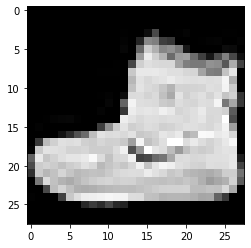

In [ ]:
plt.imshow(X_train[0],cmap='gray')

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense,Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
to_categorical(y_train[:10])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
# 1. 모델 구조 설계
mnist_model = Sequential() #모델 뼈대
mnist_model.add(InputLayer(input_shape=(28,28)))
mnist_model.add(Flatten())   # 입력된 데이터를 1차원으로 평평하게 만들어주는 층
mnist_model.add(Dense(units=32,activation='sigmoid'))   # 퍼셉트론(units)
mnist_model.add(Dense(units=64,activation='sigmoid'))
mnist_model.add(Dense(units=32,activation='sigmoid'))
mnist_model.add(Dense(units=64,activation='sigmoid'))
mnist_model.add(Dense(units=32,activation='sigmoid'))
mnist_model.add(Dense(units=64,activation='sigmoid'))
mnist_model.add(Dense(units=10,activation='softmax'))
#다중분류의출력층 units =클래스의수,활성화 함수 ='softmax'

In [ ]:
#평가방법설정
mnist_model.compile(loss='sparse_categorical_crossentropy',   #sparse_categorical:원핫을 안해도됨
              optimizer='Adam',
              metrics=['accuracy']
              )

In [ ]:
mnist_su = mnist_model.fit(X_train,y_train,validation_split=0.3,
                                epochs=100)

Epoch 1/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.6578 - accuracy: 0.2879 - val_loss: 1.3654 - val_accuracy: 0.3501
Epoch 2/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.2640 - accuracy: 0.4141 - val_loss: 1.1622 - val_accuracy: 0.4871
Epoch 3/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.1521 - accuracy: 0.4796 - val_loss: 1.0971 - val_accuracy: 0.5144
Epoch 4/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.0834 - accuracy: 0.5214 - val_loss: 1.0426 - val_accuracy: 0.5464
Epoch 5/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.1248 - accuracy: 0.5057 - val_loss: 1.1448 - val_accuracy: 0.5141
Epoch 6/100
1313/1313 [==============================] - 5s 4ms/step - loss: 1.0955 - accuracy: 0.5354 - val_loss: 0.9910 - val_accuracy: 0.5738
Epoch 7/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.0433 - accuracy: 0.5607 - val_loss: 1.0644 - val_ac

<function matplotlib.pyplot.show(*args, **kw)>

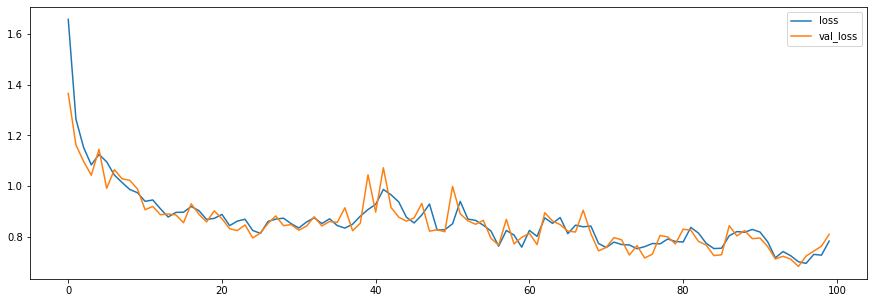

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(mnist_su.history['loss'],label='loss')
plt.plot(mnist_su.history['val_loss'],label='val_loss')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

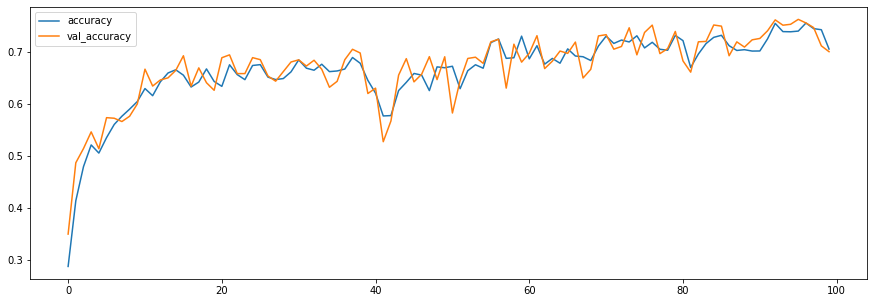

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(mnist_su.history['accuracy'],label='accuracy')
plt.plot(mnist_su.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show

In [ ]:
# 4. 모델 평가
mnist_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8134 - accuracy: 0.7001


[0.8134415149688721, 0.7001000046730042]

In [ ]:
mnist_model.predict(X_test[1:3])

1/1 [==============================] - 0s 55ms/step


array([[1.3010048e-02, 4.4219652e-03, 3.3010358e-01, 9.0745119e-03,
        3.4598255e-01, 1.9395390e-03, 2.6301989e-01, 6.3176896e-07,
        3.0891983e-02, 1.5552941e-03],
       [7.9036169e-03, 8.9265317e-01, 1.9776780e-04, 8.5615687e-02,
        9.7734248e-03, 5.2719468e-08, 3.5621589e-03, 3.0492806e-10,
        2.9398320e-04, 1.3804527e-07]], dtype=float32)

In [ ]:
X_test[1:3]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [ ]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 64)                2

In [ ]:
# 모델저장
mnist_model.save('my_fashion_mnist_model.h5')  #h5  : 확장자

In [ ]:
!ls

 data					        ex04_의류데이터분류.ipynb
'ex01_Keras맛보기(시간성적데이터,회귀).ipynb'   model
'ex02_유방암데이터 분류(이진분류).ipynb'        my_fashion_mnist_model.h5
'ex03_손글씨 분류 실습(다중분류).ipynb'


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model=load_model('my_fashion_mnist_model.h5')

In [ ]:
model

In [ ]:
model.predict(X_test[30:32])

1/1 [==============================] - 0s 84ms/step


array([[5.6387796e-03, 6.9597561e-05, 2.2018631e-03, 4.7080417e-04,
        2.5469207e-03, 1.6164461e-02, 6.4925202e-03, 1.7226302e-03,
        9.6437663e-01, 3.1583136e-04],
       [5.6387796e-03, 6.9597561e-05, 2.2018631e-03, 4.7080417e-04,
        2.5469207e-03, 1.6164461e-02, 6.4925202e-03, 1.7226302e-03,
        9.6437663e-01, 3.1583136e-04]], dtype=float32)

### 베스트 모델 만들기

In [ ]:
# 1. 모델 구조 설계
mnist_model = Sequential() #모델 뼈대
mnist_model.add(InputLayer(input_shape=(28,28)))
mnist_model.add(Flatten())   # 입력된 데이터를 1차원으로 평평하게 만들어주는 층
mnist_model.add(Dense(units=32,activation='sigmoid'))   # 퍼셉트론(units)
mnist_model.add(Dense(units=64,activation='sigmoid'))
mnist_model.add(Dense(units=32,activation='sigmoid'))
mnist_model.add(Dense(units=10,activation='softmax'))
#다중분류의출력층 units =클래스의수,활성화 함수 ='softmax'

In [ ]:
mnist_model.compile(loss='sparse_categorical_crossentropy',   #sparse_categorical:원핫을 안해도됨
              optimizer='Adam',
              metrics=['accuracy']
              )

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model_dir = './model/'

In [ ]:
# 모델이 저장될 조건
modelpath=model_dir + '{epoch:02d}-{val_loss:.4f}.hdf5'

# monitor=val_loss :모니터링할 값 설정(저장 기준)(val_loss:테스트 오차,val_acc:테스트정확도,loss:훈련오차)
# verbose : 진행 내용 출력 여부 (1:출력 , 0:표시없이 바로 저장)
# save_best_only=True :이전에 저장한 모델보다 성능이 개선된 경우에만 저장
checkpointer=ModelCheckpoint(filepath = modelpath,  #모델 저장 경로
                monitor='val_loss',verbose=1,save_best_only=True)

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.33,epochs=1000,
                    callbacks=[checkpointer])

Epoch 1/1000
1255/1257 [============================>.] - ETA: 0s - loss: 0.4814 - accuracy: 0.8277
Epoch 1: val_loss did not improve from 0.49310
1257/1257 [==============================] - 6s 4ms/step - loss: 0.4817 - accuracy: 0.8276 - val_loss: 0.5167 - val_accuracy: 0.8289
Epoch 2/1000
1241/1257 [============================>.] - ETA: 0s - loss: 0.5095 - accuracy: 0.8245
Epoch 2: val_loss did not improve from 0.49310
1257/1257 [==============================] - 5s 4ms/step - loss: 0.5090 - accuracy: 0.8248 - val_loss: 0.5418 - val_accuracy: 0.8157
Epoch 3/1000
1256/1257 [============================>.] - ETA: 0s - loss: 0.5085 - accuracy: 0.8196
Epoch 3: val_loss did not improve from 0.49310
1257/1257 [==============================] - 5s 4ms/step - loss: 0.5085 - accuracy: 0.8197 - val_loss: 0.5309 - val_accuracy: 0.8137
Epoch 4/1000
1252/1257 [============================>.] - ETA: 0s - loss: 0.5024 - accuracy: 0.8244
Epoch 4: val_loss did not improve from 0.49310
1257/1257 [==

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np

In [ ]:
model_path = model_dir + '262-0.5612.hdf5'
l_model = load_model(model_path)

In [ ]:
l_model.predict(X_test[1:3])

1/1 [==============================] - 0s 94ms/step


array([[2.2231830e-02, 1.9575119e-02, 7.2233307e-01, 5.8121462e-03,
        4.5337666e-02, 1.2148919e-04, 1.6221221e-01, 4.0947068e-12,
        2.1867597e-02, 5.0877640e-04],
       [4.5335779e-04, 9.9097180e-01, 5.2734808e-09, 7.8706909e-03,
        1.8307383e-04, 9.6694053e-19, 5.2102294e-04, 1.1372793e-20,
        1.5042962e-08, 3.5506282e-11]], dtype=float32)

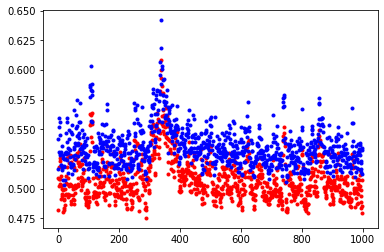

In [ ]:
# 그래프 그리기
y_loss = history.history['loss']
y_vloss= history.history['val_loss']

x_len=np.arange(len(y_vloss))

plt.plot(x_len,y_loss,'o',c='red',markersize=3)
plt.plot(x_len,y_vloss,'o',c='blue',markersize=3)
plt.show()



In [ ]:
(len(y_vloss))

1000

### 자동 학습 중단 (EarlyStopping)
- test셋의 오차가 줄어들지 않으면 학습을 멈추는 기능

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=50)

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.33,epochs=1000, batch_size=500,
                    callbacks=[early_stopping_callback])

Epoch 1/1000
81/81 [==============================] - 2s 25ms/step - loss: 0.5250 - accuracy: 0.8260 - val_loss: 0.5488 - val_accuracy: 0.8223
Epoch 2/1000
81/81 [==============================] - 2s 25ms/step - loss: 0.5234 - accuracy: 0.8270 - val_loss: 0.5498 - val_accuracy: 0.8221
Epoch 3/1000
81/81 [==============================] - 2s 25ms/step - loss: 0.5306 - accuracy: 0.8240 - val_loss: 0.5559 - val_accuracy: 0.8184
Epoch 4/1000
81/81 [==============================] - 2s 20ms/step - loss: 0.5291 - accuracy: 0.8241 - val_loss: 0.5520 - val_accuracy: 0.8185
Epoch 5/1000
81/81 [==============================] - 2s 25ms/step - loss: 0.5249 - accuracy: 0.8258 - val_loss: 0.5462 - val_accuracy: 0.8205
Epoch 6/1000
81/81 [==============================] - 2s 20ms/step - loss: 0.5205 - accuracy: 0.8281 - val_loss: 0.5434 - val_accuracy: 0.8212
Epoch 7/1000
81/81 [==============================] - 2s 25ms/step - loss: 0.5185 - accuracy: 0.8296 - val_loss: 0.5441 - val_accuracy: 0.8210

### ModelCheckpoint+EarlyStopping

In [ ]:
checkpointer=ModelCheckpoint(filepath = modelpath,  #모델 저장 경로
                monitor='val_loss',verbose=1,save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_caauracy',patience=100)

history = model.fit(X_train,y_train,validation_split=0.33,epochs=1000, batch_size=500,
                    callbacks=[checkpointer,early_stopping_callback])

Epoch 1/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5189 - accuracy: 0.8131
Epoch 1: val_loss improved from inf to 0.54229, saving model to ./model/01-0.5423.hdf5


81/81 [==============================] - 2s 25ms/step - loss: 0.5185 - accuracy: 0.8132 - val_loss: 0.5423 - val_accuracy: 0.8099
Epoch 2/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5183 - accuracy: 0.8145
Epoch 2: val_loss did not improve from 0.54229


81/81 [==============================] - 1s 14ms/step - loss: 0.5177 - accuracy: 0.8144 - val_loss: 0.5431 - val_accuracy: 0.8091
Epoch 3/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5167 - accuracy: 0.8171
Epoch 3: val_loss improved from 0.54229 to 0.53592, saving model to ./model/03-0.5359.hdf5


81/81 [==============================] - 1s 12ms/step - loss: 0.5161 - accuracy: 0.8172 - val_loss: 0.5359 - val_accuracy: 0.8151
Epoch 4/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5126 - accuracy: 0.8186
Epoch 4: val_loss did not improve from 0.53592


81/81 [==============================] - 1s 12ms/step - loss: 0.5126 - accuracy: 0.8188 - val_loss: 0.5361 - val_accuracy: 0.8154
Epoch 5/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5124 - accuracy: 0.8209
Epoch 5: val_loss improved from 0.53592 to 0.53506, saving model to ./model/05-0.5351.hdf5


81/81 [==============================] - 1s 13ms/step - loss: 0.5128 - accuracy: 0.8210 - val_loss: 0.5351 - val_accuracy: 0.8176
Epoch 6/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5172 - accuracy: 0.8205
Epoch 6: val_loss did not improve from 0.53506


81/81 [==============================] - 1s 12ms/step - loss: 0.5186 - accuracy: 0.8202 - val_loss: 0.5403 - val_accuracy: 0.8162
Epoch 7/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5199 - accuracy: 0.8194
Epoch 7: val_loss did not improve from 0.53506


81/81 [==============================] - 1s 10ms/step - loss: 0.5195 - accuracy: 0.8197 - val_loss: 0.5374 - val_accuracy: 0.8166
Epoch 8/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5195 - accuracy: 0.8195
Epoch 8: val_loss did not improve from 0.53506


81/81 [==============================] - 1s 12ms/step - loss: 0.5200 - accuracy: 0.8196 - val_loss: 0.5412 - val_accuracy: 0.8167
Epoch 9/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5221 - accuracy: 0.8196
Epoch 9: val_loss did not improve from 0.53506


81/81 [==============================] - 1s 11ms/step - loss: 0.5208 - accuracy: 0.8199 - val_loss: 0.5413 - val_accuracy: 0.8158
Epoch 10/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5183 - accuracy: 0.8204
Epoch 10: val_loss did not improve from 0.53506


81/81 [==============================] - 1s 10ms/step - loss: 0.5175 - accuracy: 0.8204 - val_loss: 0.5383 - val_accuracy: 0.8181
Epoch 11/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5148 - accuracy: 0.8240
Epoch 11: val_loss did not improve from 0.53506


81/81 [==============================] - 1s 11ms/step - loss: 0.5146 - accuracy: 0.8242 - val_loss: 0.5361 - val_accuracy: 0.8204
Epoch 12/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5171 - accuracy: 0.8270
Epoch 12: val_loss did not improve from 0.53506


81/81 [==============================] - 1s 13ms/step - loss: 0.5175 - accuracy: 0.8268 - val_loss: 0.5394 - val_accuracy: 0.8237
Epoch 13/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5147 - accuracy: 0.8291
Epoch 13: val_loss did not improve from 0.53506


81/81 [==============================] - 1s 11ms/step - loss: 0.5155 - accuracy: 0.8288 - val_loss: 0.5386 - val_accuracy: 0.8250
Epoch 14/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5118 - accuracy: 0.8305
Epoch 14: val_loss did not improve from 0.53506


81/81 [==============================] - 1s 13ms/step - loss: 0.5120 - accuracy: 0.8305 - val_loss: 0.5395 - val_accuracy: 0.8259
Epoch 15/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5101 - accuracy: 0.8313
Epoch 15: val_loss did not improve from 0.53506


81/81 [==============================] - 1s 11ms/step - loss: 0.5121 - accuracy: 0.8307 - val_loss: 0.5403 - val_accuracy: 0.8223
Epoch 16/1000
81/81 [==============================] - ETA: 0s - loss: 0.5146 - accuracy: 0.8292
Epoch 16: val_loss did not improve from 0.53506


81/81 [==============================] - 1s 11ms/step - loss: 0.5146 - accuracy: 0.8292 - val_loss: 0.5379 - val_accuracy: 0.8220
Epoch 17/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5084 - accuracy: 0.8315
Epoch 17: val_loss improved from 0.53506 to 0.53207, saving model to ./model/17-0.5321.hdf5


81/81 [==============================] - 1s 13ms/step - loss: 0.5079 - accuracy: 0.8317 - val_loss: 0.5321 - val_accuracy: 0.8239
Epoch 18/1000
74/81 [==========================>...] - ETA: 0s - loss: 0.5119 - accuracy: 0.8305
Epoch 18: val_loss did not improve from 0.53207


81/81 [==============================] - 1s 9ms/step - loss: 0.5112 - accuracy: 0.8303 - val_loss: 0.5394 - val_accuracy: 0.8201
Epoch 19/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.5227 - accuracy: 0.8183
Epoch 19: val_loss did not improve from 0.53207


81/81 [==============================] - 1s 12ms/step - loss: 0.5243 - accuracy: 0.8170 - val_loss: 0.5530 - val_accuracy: 0.7996
Epoch 20/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.5300 - accuracy: 0.8110
Epoch 20: val_loss did not improve from 0.53207


81/81 [==============================] - 1s 12ms/step - loss: 0.5308 - accuracy: 0.8108 - val_loss: 0.5536 - val_accuracy: 0.8054
Epoch 21/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5345 - accuracy: 0.8088
Epoch 21: val_loss did not improve from 0.53207


81/81 [==============================] - 1s 12ms/step - loss: 0.5326 - accuracy: 0.8094 - val_loss: 0.5559 - val_accuracy: 0.8031
Epoch 22/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.5285 - accuracy: 0.8115
Epoch 22: val_loss did not improve from 0.53207


81/81 [==============================] - 1s 10ms/step - loss: 0.5266 - accuracy: 0.8123 - val_loss: 0.5455 - val_accuracy: 0.8077
Epoch 23/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5199 - accuracy: 0.8147
Epoch 23: val_loss did not improve from 0.53207


81/81 [==============================] - 1s 10ms/step - loss: 0.5190 - accuracy: 0.8156 - val_loss: 0.5423 - val_accuracy: 0.8108
Epoch 24/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5171 - accuracy: 0.8168
Epoch 24: val_loss did not improve from 0.53207


81/81 [==============================] - 1s 10ms/step - loss: 0.5177 - accuracy: 0.8165 - val_loss: 0.5473 - val_accuracy: 0.8079
Epoch 25/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5161 - accuracy: 0.8173
Epoch 25: val_loss did not improve from 0.53207


81/81 [==============================] - 1s 10ms/step - loss: 0.5160 - accuracy: 0.8174 - val_loss: 0.5463 - val_accuracy: 0.8116
Epoch 26/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5196 - accuracy: 0.8159
Epoch 26: val_loss did not improve from 0.53207


81/81 [==============================] - 1s 15ms/step - loss: 0.5198 - accuracy: 0.8158 - val_loss: 0.5398 - val_accuracy: 0.8096
Epoch 27/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5151 - accuracy: 0.8153
Epoch 27: val_loss did not improve from 0.53207


81/81 [==============================] - 1s 12ms/step - loss: 0.5171 - accuracy: 0.8145 - val_loss: 0.5409 - val_accuracy: 0.8088
Epoch 28/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5118 - accuracy: 0.8173
Epoch 28: val_loss did not improve from 0.53207


81/81 [==============================] - 1s 12ms/step - loss: 0.5114 - accuracy: 0.8177 - val_loss: 0.5362 - val_accuracy: 0.8178
Epoch 29/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5061 - accuracy: 0.8219
Epoch 29: val_loss did not improve from 0.53207


81/81 [==============================] - 1s 12ms/step - loss: 0.5064 - accuracy: 0.8219 - val_loss: 0.5372 - val_accuracy: 0.8160
Epoch 30/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5088 - accuracy: 0.8225
Epoch 30: val_loss did not improve from 0.53207


81/81 [==============================] - 1s 10ms/step - loss: 0.5080 - accuracy: 0.8228 - val_loss: 0.5373 - val_accuracy: 0.8176
Epoch 31/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5052 - accuracy: 0.8248
Epoch 31: val_loss did not improve from 0.53207


81/81 [==============================] - 1s 10ms/step - loss: 0.5061 - accuracy: 0.8241 - val_loss: 0.5356 - val_accuracy: 0.8175
Epoch 32/1000
74/81 [==========================>...] - ETA: 0s - loss: 0.5055 - accuracy: 0.8231
Epoch 32: val_loss did not improve from 0.53207


81/81 [==============================] - 1s 12ms/step - loss: 0.5068 - accuracy: 0.8228 - val_loss: 0.5394 - val_accuracy: 0.8157
Epoch 33/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5098 - accuracy: 0.8220
Epoch 33: val_loss did not improve from 0.53207


81/81 [==============================] - 1s 10ms/step - loss: 0.5101 - accuracy: 0.8217 - val_loss: 0.5358 - val_accuracy: 0.8187
Epoch 34/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5083 - accuracy: 0.8228
Epoch 34: val_loss did not improve from 0.53207


81/81 [==============================] - 1s 10ms/step - loss: 0.5068 - accuracy: 0.8234 - val_loss: 0.5348 - val_accuracy: 0.8167
Epoch 35/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5030 - accuracy: 0.8242
Epoch 35: val_loss improved from 0.53207 to 0.52699, saving model to ./model/35-0.5270.hdf5


81/81 [==============================] - 1s 14ms/step - loss: 0.5032 - accuracy: 0.8243 - val_loss: 0.5270 - val_accuracy: 0.8182
Epoch 36/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.4989 - accuracy: 0.8264
Epoch 36: val_loss improved from 0.52699 to 0.52423, saving model to ./model/36-0.5242.hdf5


81/81 [==============================] - 1s 13ms/step - loss: 0.5000 - accuracy: 0.8262 - val_loss: 0.5242 - val_accuracy: 0.8203
Epoch 37/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4953 - accuracy: 0.8302
Epoch 37: val_loss improved from 0.52423 to 0.52065, saving model to ./model/37-0.5207.hdf5


81/81 [==============================] - 1s 13ms/step - loss: 0.4949 - accuracy: 0.8304 - val_loss: 0.5207 - val_accuracy: 0.8263
Epoch 38/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4948 - accuracy: 0.8310
Epoch 38: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 10ms/step - loss: 0.4946 - accuracy: 0.8311 - val_loss: 0.5256 - val_accuracy: 0.8245
Epoch 39/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4993 - accuracy: 0.8273
Epoch 39: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 12ms/step - loss: 0.4986 - accuracy: 0.8278 - val_loss: 0.5257 - val_accuracy: 0.8250
Epoch 40/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5009 - accuracy: 0.8312
Epoch 40: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 12ms/step - loss: 0.5009 - accuracy: 0.8312 - val_loss: 0.5300 - val_accuracy: 0.8234
Epoch 41/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5029 - accuracy: 0.8308
Epoch 41: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.5022 - accuracy: 0.8306 - val_loss: 0.5243 - val_accuracy: 0.8245
Epoch 42/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5034 - accuracy: 0.8302
Epoch 42: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.5028 - accuracy: 0.8305 - val_loss: 0.5252 - val_accuracy: 0.8240
Epoch 43/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5034 - accuracy: 0.8302
Epoch 43: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 12ms/step - loss: 0.5039 - accuracy: 0.8300 - val_loss: 0.5288 - val_accuracy: 0.8245
Epoch 44/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5079 - accuracy: 0.8280
Epoch 44: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5075 - accuracy: 0.8278 - val_loss: 0.5366 - val_accuracy: 0.8204
Epoch 45/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5142 - accuracy: 0.8238
Epoch 45: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5129 - accuracy: 0.8244 - val_loss: 0.5367 - val_accuracy: 0.8205
Epoch 46/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5084 - accuracy: 0.8272
Epoch 46: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 12ms/step - loss: 0.5092 - accuracy: 0.8269 - val_loss: 0.5386 - val_accuracy: 0.8210
Epoch 47/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.5105 - accuracy: 0.8259
Epoch 47: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5103 - accuracy: 0.8264 - val_loss: 0.5322 - val_accuracy: 0.8240
Epoch 48/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.5142 - accuracy: 0.8251
Epoch 48: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5143 - accuracy: 0.8246 - val_loss: 0.5435 - val_accuracy: 0.8179
Epoch 49/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5203 - accuracy: 0.8223
Epoch 49: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.5201 - accuracy: 0.8222 - val_loss: 0.5484 - val_accuracy: 0.8147
Epoch 50/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5194 - accuracy: 0.8200
Epoch 50: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 12ms/step - loss: 0.5189 - accuracy: 0.8203 - val_loss: 0.5408 - val_accuracy: 0.8165
Epoch 51/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5166 - accuracy: 0.8215
Epoch 51: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 12ms/step - loss: 0.5167 - accuracy: 0.8214 - val_loss: 0.5333 - val_accuracy: 0.8199
Epoch 52/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5130 - accuracy: 0.8259
Epoch 52: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5115 - accuracy: 0.8263 - val_loss: 0.5382 - val_accuracy: 0.8225
Epoch 53/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5078 - accuracy: 0.8299
Epoch 53: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 16ms/step - loss: 0.5079 - accuracy: 0.8299 - val_loss: 0.5293 - val_accuracy: 0.8265
Epoch 54/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4993 - accuracy: 0.8326
Epoch 54: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 17ms/step - loss: 0.5002 - accuracy: 0.8324 - val_loss: 0.5293 - val_accuracy: 0.8225
Epoch 55/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5052 - accuracy: 0.8278
Epoch 55: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 18ms/step - loss: 0.5050 - accuracy: 0.8279 - val_loss: 0.5277 - val_accuracy: 0.8231
Epoch 56/1000
81/81 [==============================] - ETA: 0s - loss: 0.5018 - accuracy: 0.8290
Epoch 56: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 16ms/step - loss: 0.5018 - accuracy: 0.8290 - val_loss: 0.5281 - val_accuracy: 0.8241
Epoch 57/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5000 - accuracy: 0.8286
Epoch 57: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 10ms/step - loss: 0.5010 - accuracy: 0.8281 - val_loss: 0.5267 - val_accuracy: 0.8233
Epoch 58/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5001 - accuracy: 0.8285
Epoch 58: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5001 - accuracy: 0.8283 - val_loss: 0.5280 - val_accuracy: 0.8234
Epoch 59/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5007 - accuracy: 0.8293
Epoch 59: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5008 - accuracy: 0.8291 - val_loss: 0.5269 - val_accuracy: 0.8239
Epoch 60/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4995 - accuracy: 0.8305
Epoch 60: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.4991 - accuracy: 0.8303 - val_loss: 0.5290 - val_accuracy: 0.8244
Epoch 61/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4974 - accuracy: 0.8321
Epoch 61: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 12ms/step - loss: 0.4970 - accuracy: 0.8323 - val_loss: 0.5264 - val_accuracy: 0.8276
Epoch 62/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4962 - accuracy: 0.8337
Epoch 62: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.4957 - accuracy: 0.8338 - val_loss: 0.5307 - val_accuracy: 0.8265
Epoch 63/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4982 - accuracy: 0.8328
Epoch 63: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 12ms/step - loss: 0.4999 - accuracy: 0.8324 - val_loss: 0.5304 - val_accuracy: 0.8255
Epoch 64/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4965 - accuracy: 0.8362
Epoch 64: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 12ms/step - loss: 0.4964 - accuracy: 0.8361 - val_loss: 0.5287 - val_accuracy: 0.8295
Epoch 65/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4962 - accuracy: 0.8367
Epoch 65: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.4960 - accuracy: 0.8365 - val_loss: 0.5313 - val_accuracy: 0.8266
Epoch 66/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4980 - accuracy: 0.8342
Epoch 66: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 12ms/step - loss: 0.4976 - accuracy: 0.8343 - val_loss: 0.5304 - val_accuracy: 0.8253
Epoch 67/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4933 - accuracy: 0.8339
Epoch 67: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.4946 - accuracy: 0.8335 - val_loss: 0.5254 - val_accuracy: 0.8247
Epoch 68/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4965 - accuracy: 0.8316
Epoch 68: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.4950 - accuracy: 0.8323 - val_loss: 0.5284 - val_accuracy: 0.8233
Epoch 69/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4970 - accuracy: 0.8337
Epoch 69: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.4972 - accuracy: 0.8337 - val_loss: 0.5274 - val_accuracy: 0.8257
Epoch 70/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5006 - accuracy: 0.8324
Epoch 70: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.4997 - accuracy: 0.8324 - val_loss: 0.5309 - val_accuracy: 0.8208
Epoch 71/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5050 - accuracy: 0.8256
Epoch 71: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5049 - accuracy: 0.8256 - val_loss: 0.5364 - val_accuracy: 0.8183
Epoch 72/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.5077 - accuracy: 0.8260
Epoch 72: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5067 - accuracy: 0.8259 - val_loss: 0.5322 - val_accuracy: 0.8196
Epoch 73/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5067 - accuracy: 0.8236
Epoch 73: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.5071 - accuracy: 0.8239 - val_loss: 0.5343 - val_accuracy: 0.8182
Epoch 74/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5079 - accuracy: 0.8243
Epoch 74: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5075 - accuracy: 0.8244 - val_loss: 0.5341 - val_accuracy: 0.8186
Epoch 75/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5065 - accuracy: 0.8274
Epoch 75: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.5069 - accuracy: 0.8271 - val_loss: 0.5352 - val_accuracy: 0.8197
Epoch 76/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5040 - accuracy: 0.8279
Epoch 76: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5041 - accuracy: 0.8279 - val_loss: 0.5345 - val_accuracy: 0.8208
Epoch 77/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.5031 - accuracy: 0.8277
Epoch 77: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.5045 - accuracy: 0.8271 - val_loss: 0.5379 - val_accuracy: 0.8180
Epoch 78/1000
81/81 [==============================] - ETA: 0s - loss: 0.5157 - accuracy: 0.8188
Epoch 78: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 12ms/step - loss: 0.5157 - accuracy: 0.8188 - val_loss: 0.5411 - val_accuracy: 0.8160
Epoch 79/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5182 - accuracy: 0.8194
Epoch 79: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.5189 - accuracy: 0.8190 - val_loss: 0.5445 - val_accuracy: 0.8117
Epoch 80/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5172 - accuracy: 0.8206
Epoch 80: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 12ms/step - loss: 0.5173 - accuracy: 0.8206 - val_loss: 0.5401 - val_accuracy: 0.8113
Epoch 81/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5160 - accuracy: 0.8156
Epoch 81: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.5157 - accuracy: 0.8154 - val_loss: 0.5422 - val_accuracy: 0.8107
Epoch 82/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5127 - accuracy: 0.8163
Epoch 82: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.5137 - accuracy: 0.8165 - val_loss: 0.5405 - val_accuracy: 0.8129
Epoch 83/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5057 - accuracy: 0.8204
Epoch 83: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5056 - accuracy: 0.8205 - val_loss: 0.5383 - val_accuracy: 0.8145
Epoch 84/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5087 - accuracy: 0.8192
Epoch 84: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.5091 - accuracy: 0.8190 - val_loss: 0.5418 - val_accuracy: 0.8128
Epoch 85/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5091 - accuracy: 0.8186
Epoch 85: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5103 - accuracy: 0.8182 - val_loss: 0.5451 - val_accuracy: 0.8127
Epoch 86/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5136 - accuracy: 0.8191
Epoch 86: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.5140 - accuracy: 0.8191 - val_loss: 0.5428 - val_accuracy: 0.8144
Epoch 87/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5060 - accuracy: 0.8209
Epoch 87: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.5069 - accuracy: 0.8203 - val_loss: 0.5443 - val_accuracy: 0.8119
Epoch 88/1000
81/81 [==============================] - ETA: 0s - loss: 0.5111 - accuracy: 0.8194
Epoch 88: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5111 - accuracy: 0.8194 - val_loss: 0.5413 - val_accuracy: 0.8155
Epoch 89/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5072 - accuracy: 0.8234
Epoch 89: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.5080 - accuracy: 0.8230 - val_loss: 0.5420 - val_accuracy: 0.8139
Epoch 90/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.5050 - accuracy: 0.8230
Epoch 90: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.5049 - accuracy: 0.8232 - val_loss: 0.5370 - val_accuracy: 0.8176
Epoch 91/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5035 - accuracy: 0.8259
Epoch 91: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5038 - accuracy: 0.8258 - val_loss: 0.5314 - val_accuracy: 0.8193
Epoch 92/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5068 - accuracy: 0.8251
Epoch 92: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5068 - accuracy: 0.8252 - val_loss: 0.5370 - val_accuracy: 0.8161
Epoch 93/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5085 - accuracy: 0.8214
Epoch 93: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 12ms/step - loss: 0.5090 - accuracy: 0.8214 - val_loss: 0.5364 - val_accuracy: 0.8161
Epoch 94/1000
81/81 [==============================] - ETA: 0s - loss: 0.5051 - accuracy: 0.8223
Epoch 94: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.5051 - accuracy: 0.8223 - val_loss: 0.5340 - val_accuracy: 0.8175
Epoch 95/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5046 - accuracy: 0.8224
Epoch 95: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 12ms/step - loss: 0.5041 - accuracy: 0.8225 - val_loss: 0.5353 - val_accuracy: 0.8163
Epoch 96/1000
81/81 [==============================] - ETA: 0s - loss: 0.5031 - accuracy: 0.8233
Epoch 96: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 12ms/step - loss: 0.5031 - accuracy: 0.8233 - val_loss: 0.5329 - val_accuracy: 0.8176
Epoch 97/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5010 - accuracy: 0.8235
Epoch 97: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.5009 - accuracy: 0.8235 - val_loss: 0.5340 - val_accuracy: 0.8183
Epoch 98/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5002 - accuracy: 0.8239
Epoch 98: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.5002 - accuracy: 0.8240 - val_loss: 0.5290 - val_accuracy: 0.8188
Epoch 99/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5032 - accuracy: 0.8269
Epoch 99: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5036 - accuracy: 0.8270 - val_loss: 0.5357 - val_accuracy: 0.8202
Epoch 100/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5024 - accuracy: 0.8272
Epoch 100: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5042 - accuracy: 0.8260 - val_loss: 0.5347 - val_accuracy: 0.8182
Epoch 101/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4986 - accuracy: 0.8259
Epoch 101: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5004 - accuracy: 0.8253 - val_loss: 0.5313 - val_accuracy: 0.8181
Epoch 102/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5002 - accuracy: 0.8235
Epoch 102: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 16ms/step - loss: 0.5002 - accuracy: 0.8234 - val_loss: 0.5306 - val_accuracy: 0.8184
Epoch 103/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5005 - accuracy: 0.8215
Epoch 103: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 17ms/step - loss: 0.5006 - accuracy: 0.8213 - val_loss: 0.5346 - val_accuracy: 0.8125
Epoch 104/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5026 - accuracy: 0.8183
Epoch 104: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5029 - accuracy: 0.8181 - val_loss: 0.5266 - val_accuracy: 0.8189
Epoch 105/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4967 - accuracy: 0.8221
Epoch 105: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.4949 - accuracy: 0.8229 - val_loss: 0.5211 - val_accuracy: 0.8215
Epoch 106/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4937 - accuracy: 0.8281
Epoch 106: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.4939 - accuracy: 0.8280 - val_loss: 0.5233 - val_accuracy: 0.8225
Epoch 107/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4986 - accuracy: 0.8259
Epoch 107: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.4986 - accuracy: 0.8262 - val_loss: 0.5264 - val_accuracy: 0.8208
Epoch 108/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.5010 - accuracy: 0.8271
Epoch 108: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 11ms/step - loss: 0.5005 - accuracy: 0.8269 - val_loss: 0.5301 - val_accuracy: 0.8220
Epoch 109/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5001 - accuracy: 0.8298
Epoch 109: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 16ms/step - loss: 0.4994 - accuracy: 0.8300 - val_loss: 0.5254 - val_accuracy: 0.8256
Epoch 110/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4983 - accuracy: 0.8329
Epoch 110: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 18ms/step - loss: 0.4985 - accuracy: 0.8327 - val_loss: 0.5238 - val_accuracy: 0.8281
Epoch 111/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4952 - accuracy: 0.8338
Epoch 111: val_loss did not improve from 0.52065


81/81 [==============================] - 1s 13ms/step - loss: 0.4958 - accuracy: 0.8334 - val_loss: 0.5228 - val_accuracy: 0.8282
Epoch 112/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4912 - accuracy: 0.8338
Epoch 112: val_loss improved from 0.52065 to 0.52031, saving model to ./model/112-0.5203.hdf5


81/81 [==============================] - 1s 12ms/step - loss: 0.4915 - accuracy: 0.8337 - val_loss: 0.5203 - val_accuracy: 0.8266
Epoch 113/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4915 - accuracy: 0.8311
Epoch 113: val_loss did not improve from 0.52031


81/81 [==============================] - 1s 13ms/step - loss: 0.4914 - accuracy: 0.8312 - val_loss: 0.5247 - val_accuracy: 0.8256
Epoch 114/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4900 - accuracy: 0.8320
Epoch 114: val_loss did not improve from 0.52031


81/81 [==============================] - 1s 13ms/step - loss: 0.4903 - accuracy: 0.8319 - val_loss: 0.5210 - val_accuracy: 0.8288
Epoch 115/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4915 - accuracy: 0.8352
Epoch 115: val_loss did not improve from 0.52031


81/81 [==============================] - 1s 13ms/step - loss: 0.4910 - accuracy: 0.8355 - val_loss: 0.5220 - val_accuracy: 0.8291
Epoch 116/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.4900 - accuracy: 0.8376
Epoch 116: val_loss did not improve from 0.52031


81/81 [==============================] - 1s 11ms/step - loss: 0.4906 - accuracy: 0.8372 - val_loss: 0.5209 - val_accuracy: 0.8308
Epoch 117/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4876 - accuracy: 0.8376
Epoch 117: val_loss did not improve from 0.52031


81/81 [==============================] - 1s 11ms/step - loss: 0.4896 - accuracy: 0.8367 - val_loss: 0.5231 - val_accuracy: 0.8288
Epoch 118/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4885 - accuracy: 0.8354
Epoch 118: val_loss improved from 0.52031 to 0.51986, saving model to ./model/118-0.5199.hdf5


81/81 [==============================] - 1s 13ms/step - loss: 0.4884 - accuracy: 0.8354 - val_loss: 0.5199 - val_accuracy: 0.8295
Epoch 119/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4881 - accuracy: 0.8378
Epoch 119: val_loss did not improve from 0.51986


81/81 [==============================] - 1s 11ms/step - loss: 0.4868 - accuracy: 0.8380 - val_loss: 0.5231 - val_accuracy: 0.8293
Epoch 120/1000
81/81 [==============================] - ETA: 0s - loss: 0.4867 - accuracy: 0.8380
Epoch 120: val_loss did not improve from 0.51986


81/81 [==============================] - 1s 13ms/step - loss: 0.4867 - accuracy: 0.8380 - val_loss: 0.5217 - val_accuracy: 0.8299
Epoch 121/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.4865 - accuracy: 0.8378
Epoch 121: val_loss improved from 0.51986 to 0.51865, saving model to ./model/121-0.5187.hdf5


81/81 [==============================] - 1s 12ms/step - loss: 0.4864 - accuracy: 0.8377 - val_loss: 0.5187 - val_accuracy: 0.8307
Epoch 122/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4882 - accuracy: 0.8385
Epoch 122: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.4882 - accuracy: 0.8382 - val_loss: 0.5213 - val_accuracy: 0.8312
Epoch 123/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4885 - accuracy: 0.8379
Epoch 123: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.4892 - accuracy: 0.8377 - val_loss: 0.5197 - val_accuracy: 0.8316
Epoch 124/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4923 - accuracy: 0.8372
Epoch 124: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.4926 - accuracy: 0.8371 - val_loss: 0.5272 - val_accuracy: 0.8297
Epoch 125/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4887 - accuracy: 0.8372
Epoch 125: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.4910 - accuracy: 0.8360 - val_loss: 0.5218 - val_accuracy: 0.8292
Epoch 126/1000
81/81 [==============================] - ETA: 0s - loss: 0.4878 - accuracy: 0.8363
Epoch 126: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.4878 - accuracy: 0.8363 - val_loss: 0.5212 - val_accuracy: 0.8275
Epoch 127/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4896 - accuracy: 0.8321
Epoch 127: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.4897 - accuracy: 0.8321 - val_loss: 0.5246 - val_accuracy: 0.8242
Epoch 128/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4899 - accuracy: 0.8320
Epoch 128: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.4897 - accuracy: 0.8321 - val_loss: 0.5232 - val_accuracy: 0.8271
Epoch 129/1000
81/81 [==============================] - ETA: 0s - loss: 0.4881 - accuracy: 0.8349
Epoch 129: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.4881 - accuracy: 0.8349 - val_loss: 0.5224 - val_accuracy: 0.8279
Epoch 130/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4932 - accuracy: 0.8313
Epoch 130: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.4929 - accuracy: 0.8316 - val_loss: 0.5261 - val_accuracy: 0.8252
Epoch 131/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.4967 - accuracy: 0.8277
Epoch 131: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.4958 - accuracy: 0.8278 - val_loss: 0.5227 - val_accuracy: 0.8211
Epoch 132/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4953 - accuracy: 0.8255
Epoch 132: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.4944 - accuracy: 0.8261 - val_loss: 0.5230 - val_accuracy: 0.8209
Epoch 133/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4923 - accuracy: 0.8274
Epoch 133: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.4938 - accuracy: 0.8270 - val_loss: 0.5208 - val_accuracy: 0.8237
Epoch 134/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4955 - accuracy: 0.8285
Epoch 134: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.4948 - accuracy: 0.8283 - val_loss: 0.5250 - val_accuracy: 0.8223
Epoch 135/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5015 - accuracy: 0.8229
Epoch 135: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.5021 - accuracy: 0.8229 - val_loss: 0.5287 - val_accuracy: 0.8158
Epoch 136/1000
81/81 [==============================] - ETA: 0s - loss: 0.5021 - accuracy: 0.8179
Epoch 136: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.5021 - accuracy: 0.8179 - val_loss: 0.5252 - val_accuracy: 0.8193
Epoch 137/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4987 - accuracy: 0.8207
Epoch 137: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.4989 - accuracy: 0.8209 - val_loss: 0.5251 - val_accuracy: 0.8209
Epoch 138/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4917 - accuracy: 0.8268
Epoch 138: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 12ms/step - loss: 0.4916 - accuracy: 0.8270 - val_loss: 0.5248 - val_accuracy: 0.8227
Epoch 139/1000
81/81 [==============================] - ETA: 0s - loss: 0.4944 - accuracy: 0.8269
Epoch 139: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.4944 - accuracy: 0.8269 - val_loss: 0.5257 - val_accuracy: 0.8225
Epoch 140/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4974 - accuracy: 0.8278
Epoch 140: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.4970 - accuracy: 0.8279 - val_loss: 0.5274 - val_accuracy: 0.8213
Epoch 141/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4952 - accuracy: 0.8295
Epoch 141: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.4963 - accuracy: 0.8288 - val_loss: 0.5249 - val_accuracy: 0.8241
Epoch 142/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4934 - accuracy: 0.8325
Epoch 142: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.4938 - accuracy: 0.8324 - val_loss: 0.5236 - val_accuracy: 0.8227
Epoch 143/1000
81/81 [==============================] - ETA: 0s - loss: 0.4916 - accuracy: 0.8310
Epoch 143: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.4916 - accuracy: 0.8310 - val_loss: 0.5197 - val_accuracy: 0.8258
Epoch 144/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4882 - accuracy: 0.8333
Epoch 144: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.4891 - accuracy: 0.8328 - val_loss: 0.5223 - val_accuracy: 0.8261
Epoch 145/1000
81/81 [==============================] - ETA: 0s - loss: 0.4890 - accuracy: 0.8344
Epoch 145: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.4890 - accuracy: 0.8344 - val_loss: 0.5209 - val_accuracy: 0.8269
Epoch 146/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4897 - accuracy: 0.8347
Epoch 146: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.4897 - accuracy: 0.8350 - val_loss: 0.5202 - val_accuracy: 0.8273
Epoch 147/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4894 - accuracy: 0.8359
Epoch 147: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.4875 - accuracy: 0.8366 - val_loss: 0.5193 - val_accuracy: 0.8294
Epoch 148/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4874 - accuracy: 0.8370
Epoch 148: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.4870 - accuracy: 0.8370 - val_loss: 0.5206 - val_accuracy: 0.8304
Epoch 149/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4881 - accuracy: 0.8387
Epoch 149: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.4911 - accuracy: 0.8375 - val_loss: 0.5246 - val_accuracy: 0.8292
Epoch 150/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5044 - accuracy: 0.8328
Epoch 150: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.5038 - accuracy: 0.8330 - val_loss: 0.5309 - val_accuracy: 0.8259
Epoch 151/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4987 - accuracy: 0.8325
Epoch 151: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.4981 - accuracy: 0.8326 - val_loss: 0.5280 - val_accuracy: 0.8258
Epoch 152/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4954 - accuracy: 0.8330
Epoch 152: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.4959 - accuracy: 0.8327 - val_loss: 0.5342 - val_accuracy: 0.8230
Epoch 153/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.5046 - accuracy: 0.8297
Epoch 153: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.5019 - accuracy: 0.8306 - val_loss: 0.5319 - val_accuracy: 0.8283
Epoch 154/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5048 - accuracy: 0.8298
Epoch 154: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.5058 - accuracy: 0.8298 - val_loss: 0.5330 - val_accuracy: 0.8253
Epoch 155/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5052 - accuracy: 0.8299
Epoch 155: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.5057 - accuracy: 0.8296 - val_loss: 0.5310 - val_accuracy: 0.8286
Epoch 156/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5030 - accuracy: 0.8337
Epoch 156: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.5026 - accuracy: 0.8336 - val_loss: 0.5326 - val_accuracy: 0.8294
Epoch 157/1000
81/81 [==============================] - ETA: 0s - loss: 0.5079 - accuracy: 0.8306
Epoch 157: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.5079 - accuracy: 0.8306 - val_loss: 0.5339 - val_accuracy: 0.8240
Epoch 158/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5126 - accuracy: 0.8285
Epoch 158: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.5126 - accuracy: 0.8286 - val_loss: 0.5361 - val_accuracy: 0.8227
Epoch 159/1000
81/81 [==============================] - ETA: 0s - loss: 0.5136 - accuracy: 0.8272
Epoch 159: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.5136 - accuracy: 0.8272 - val_loss: 0.5399 - val_accuracy: 0.8183
Epoch 160/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5153 - accuracy: 0.8228
Epoch 160: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.5156 - accuracy: 0.8229 - val_loss: 0.5342 - val_accuracy: 0.8202
Epoch 161/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5097 - accuracy: 0.8269
Epoch 161: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.5097 - accuracy: 0.8271 - val_loss: 0.5311 - val_accuracy: 0.8203
Epoch 162/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5074 - accuracy: 0.8265
Epoch 162: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.5060 - accuracy: 0.8270 - val_loss: 0.5293 - val_accuracy: 0.8231
Epoch 163/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5081 - accuracy: 0.8285
Epoch 163: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.5079 - accuracy: 0.8287 - val_loss: 0.5299 - val_accuracy: 0.8228
Epoch 164/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5054 - accuracy: 0.8284
Epoch 164: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.5065 - accuracy: 0.8281 - val_loss: 0.5283 - val_accuracy: 0.8230
Epoch 165/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.5065 - accuracy: 0.8277
Epoch 165: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.5043 - accuracy: 0.8288 - val_loss: 0.5308 - val_accuracy: 0.8226
Epoch 166/1000
81/81 [==============================] - ETA: 0s - loss: 0.5070 - accuracy: 0.8272
Epoch 166: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.5070 - accuracy: 0.8272 - val_loss: 0.5381 - val_accuracy: 0.8200
Epoch 167/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5082 - accuracy: 0.8258
Epoch 167: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.5089 - accuracy: 0.8256 - val_loss: 0.5300 - val_accuracy: 0.8249
Epoch 168/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4991 - accuracy: 0.8305
Epoch 168: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.4998 - accuracy: 0.8303 - val_loss: 0.5244 - val_accuracy: 0.8268
Epoch 169/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4943 - accuracy: 0.8321
Epoch 169: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.4955 - accuracy: 0.8316 - val_loss: 0.5266 - val_accuracy: 0.8250
Epoch 170/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4968 - accuracy: 0.8319
Epoch 170: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.4969 - accuracy: 0.8319 - val_loss: 0.5260 - val_accuracy: 0.8281
Epoch 171/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5012 - accuracy: 0.8317
Epoch 171: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 12ms/step - loss: 0.5008 - accuracy: 0.8318 - val_loss: 0.5260 - val_accuracy: 0.8276
Epoch 172/1000
81/81 [==============================] - ETA: 0s - loss: 0.5058 - accuracy: 0.8306
Epoch 172: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.5058 - accuracy: 0.8306 - val_loss: 0.5332 - val_accuracy: 0.8260
Epoch 173/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5048 - accuracy: 0.8306
Epoch 173: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.5057 - accuracy: 0.8303 - val_loss: 0.5302 - val_accuracy: 0.8255
Epoch 174/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5066 - accuracy: 0.8286
Epoch 174: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.5063 - accuracy: 0.8288 - val_loss: 0.5299 - val_accuracy: 0.8244
Epoch 175/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.4982 - accuracy: 0.8313
Epoch 175: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.5009 - accuracy: 0.8306 - val_loss: 0.5312 - val_accuracy: 0.8238
Epoch 176/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5037 - accuracy: 0.8271
Epoch 176: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.5040 - accuracy: 0.8272 - val_loss: 0.5284 - val_accuracy: 0.8244
Epoch 177/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.5033 - accuracy: 0.8292
Epoch 177: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.5036 - accuracy: 0.8290 - val_loss: 0.5304 - val_accuracy: 0.8266
Epoch 178/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4982 - accuracy: 0.8318
Epoch 178: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.4987 - accuracy: 0.8315 - val_loss: 0.5265 - val_accuracy: 0.8279
Epoch 179/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.4945 - accuracy: 0.8330
Epoch 179: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.4970 - accuracy: 0.8321 - val_loss: 0.5260 - val_accuracy: 0.8269
Epoch 180/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5013 - accuracy: 0.8292
Epoch 180: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.5011 - accuracy: 0.8293 - val_loss: 0.5305 - val_accuracy: 0.8249
Epoch 181/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5023 - accuracy: 0.8288
Epoch 181: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 13ms/step - loss: 0.5031 - accuracy: 0.8286 - val_loss: 0.5325 - val_accuracy: 0.8207
Epoch 182/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.5041 - accuracy: 0.8281
Epoch 182: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 12ms/step - loss: 0.5043 - accuracy: 0.8281 - val_loss: 0.5274 - val_accuracy: 0.8245
Epoch 183/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5015 - accuracy: 0.8308
Epoch 183: val_loss did not improve from 0.51865


81/81 [==============================] - 1s 11ms/step - loss: 0.5007 - accuracy: 0.8310 - val_loss: 0.5333 - val_accuracy: 0.8233
Epoch 184/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4961 - accuracy: 0.8322
Epoch 184: val_loss improved from 0.51865 to 0.51775, saving model to ./model/184-0.5177.hdf5


81/81 [==============================] - 1s 12ms/step - loss: 0.4967 - accuracy: 0.8319 - val_loss: 0.5177 - val_accuracy: 0.8306
Epoch 185/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.4952 - accuracy: 0.8281
Epoch 185: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 11ms/step - loss: 0.4969 - accuracy: 0.8273 - val_loss: 0.5273 - val_accuracy: 0.8188
Epoch 186/1000
81/81 [==============================] - ETA: 0s - loss: 0.4992 - accuracy: 0.8262
Epoch 186: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 11ms/step - loss: 0.4992 - accuracy: 0.8262 - val_loss: 0.5222 - val_accuracy: 0.8260
Epoch 187/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4950 - accuracy: 0.8294
Epoch 187: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 11ms/step - loss: 0.4944 - accuracy: 0.8295 - val_loss: 0.5216 - val_accuracy: 0.8237
Epoch 188/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4917 - accuracy: 0.8296
Epoch 188: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.4924 - accuracy: 0.8293 - val_loss: 0.5236 - val_accuracy: 0.8234
Epoch 189/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4938 - accuracy: 0.8284
Epoch 189: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.4941 - accuracy: 0.8283 - val_loss: 0.5198 - val_accuracy: 0.8251
Epoch 190/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4933 - accuracy: 0.8301
Epoch 190: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.4929 - accuracy: 0.8304 - val_loss: 0.5224 - val_accuracy: 0.8240
Epoch 191/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4906 - accuracy: 0.8317
Epoch 191: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 11ms/step - loss: 0.4917 - accuracy: 0.8311 - val_loss: 0.5208 - val_accuracy: 0.8249
Epoch 192/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.4925 - accuracy: 0.8321
Epoch 192: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.4917 - accuracy: 0.8320 - val_loss: 0.5194 - val_accuracy: 0.8259
Epoch 193/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4901 - accuracy: 0.8305
Epoch 193: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 11ms/step - loss: 0.4912 - accuracy: 0.8299 - val_loss: 0.5189 - val_accuracy: 0.8249
Epoch 194/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4935 - accuracy: 0.8297
Epoch 194: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 11ms/step - loss: 0.4926 - accuracy: 0.8302 - val_loss: 0.5241 - val_accuracy: 0.8239
Epoch 195/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4953 - accuracy: 0.8283
Epoch 195: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 14ms/step - loss: 0.4960 - accuracy: 0.8282 - val_loss: 0.5284 - val_accuracy: 0.8200
Epoch 196/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4996 - accuracy: 0.8227
Epoch 196: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 11ms/step - loss: 0.4988 - accuracy: 0.8229 - val_loss: 0.5268 - val_accuracy: 0.8166
Epoch 197/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4943 - accuracy: 0.8250
Epoch 197: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 12ms/step - loss: 0.4943 - accuracy: 0.8250 - val_loss: 0.5297 - val_accuracy: 0.8208
Epoch 198/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4937 - accuracy: 0.8305
Epoch 198: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 12ms/step - loss: 0.4942 - accuracy: 0.8304 - val_loss: 0.5251 - val_accuracy: 0.8271
Epoch 199/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4944 - accuracy: 0.8342
Epoch 199: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.4952 - accuracy: 0.8341 - val_loss: 0.5258 - val_accuracy: 0.8283
Epoch 200/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4959 - accuracy: 0.8343
Epoch 200: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.4968 - accuracy: 0.8339 - val_loss: 0.5295 - val_accuracy: 0.8275
Epoch 201/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.5001 - accuracy: 0.8310
Epoch 201: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 11ms/step - loss: 0.5004 - accuracy: 0.8308 - val_loss: 0.5354 - val_accuracy: 0.8215
Epoch 202/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5046 - accuracy: 0.8270
Epoch 202: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.5045 - accuracy: 0.8273 - val_loss: 0.5367 - val_accuracy: 0.8206
Epoch 203/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.5059 - accuracy: 0.8283
Epoch 203: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 11ms/step - loss: 0.5059 - accuracy: 0.8286 - val_loss: 0.5323 - val_accuracy: 0.8226
Epoch 204/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5028 - accuracy: 0.8287
Epoch 204: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.5023 - accuracy: 0.8290 - val_loss: 0.5322 - val_accuracy: 0.8233
Epoch 205/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5036 - accuracy: 0.8286
Epoch 205: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.5036 - accuracy: 0.8288 - val_loss: 0.5340 - val_accuracy: 0.8235
Epoch 206/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5048 - accuracy: 0.8282
Epoch 206: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.5055 - accuracy: 0.8279 - val_loss: 0.5326 - val_accuracy: 0.8183
Epoch 207/1000
81/81 [==============================] - ETA: 0s - loss: 0.5076 - accuracy: 0.8235
Epoch 207: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 18ms/step - loss: 0.5076 - accuracy: 0.8235 - val_loss: 0.5303 - val_accuracy: 0.8201
Epoch 208/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5039 - accuracy: 0.8267
Epoch 208: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 18ms/step - loss: 0.5039 - accuracy: 0.8266 - val_loss: 0.5303 - val_accuracy: 0.8202
Epoch 209/1000
81/81 [==============================] - ETA: 0s - loss: 0.5027 - accuracy: 0.8282
Epoch 209: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 18ms/step - loss: 0.5027 - accuracy: 0.8282 - val_loss: 0.5314 - val_accuracy: 0.8211
Epoch 210/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5003 - accuracy: 0.8292
Epoch 210: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 16ms/step - loss: 0.5005 - accuracy: 0.8291 - val_loss: 0.5273 - val_accuracy: 0.8236
Epoch 211/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5031 - accuracy: 0.8265
Epoch 211: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.5032 - accuracy: 0.8265 - val_loss: 0.5294 - val_accuracy: 0.8225
Epoch 212/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5015 - accuracy: 0.8274
Epoch 212: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.5016 - accuracy: 0.8273 - val_loss: 0.5272 - val_accuracy: 0.8255
Epoch 213/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4998 - accuracy: 0.8311
Epoch 213: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 11ms/step - loss: 0.5001 - accuracy: 0.8309 - val_loss: 0.5290 - val_accuracy: 0.8258
Epoch 214/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5024 - accuracy: 0.8305
Epoch 214: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.5021 - accuracy: 0.8306 - val_loss: 0.5282 - val_accuracy: 0.8265
Epoch 215/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5004 - accuracy: 0.8329
Epoch 215: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.5008 - accuracy: 0.8326 - val_loss: 0.5258 - val_accuracy: 0.8283
Epoch 216/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5085 - accuracy: 0.8291
Epoch 216: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 12ms/step - loss: 0.5082 - accuracy: 0.8291 - val_loss: 0.5363 - val_accuracy: 0.8199
Epoch 217/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5178 - accuracy: 0.8223
Epoch 217: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.5174 - accuracy: 0.8224 - val_loss: 0.5376 - val_accuracy: 0.8199
Epoch 218/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5134 - accuracy: 0.8269
Epoch 218: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.5139 - accuracy: 0.8269 - val_loss: 0.5313 - val_accuracy: 0.8267
Epoch 219/1000
81/81 [==============================] - ETA: 0s - loss: 0.5090 - accuracy: 0.8296
Epoch 219: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 14ms/step - loss: 0.5090 - accuracy: 0.8296 - val_loss: 0.5290 - val_accuracy: 0.8272
Epoch 220/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5080 - accuracy: 0.8296
Epoch 220: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 12ms/step - loss: 0.5089 - accuracy: 0.8293 - val_loss: 0.5274 - val_accuracy: 0.8277
Epoch 221/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5060 - accuracy: 0.8305
Epoch 221: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 11ms/step - loss: 0.5054 - accuracy: 0.8308 - val_loss: 0.5278 - val_accuracy: 0.8272
Epoch 222/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5064 - accuracy: 0.8314
Epoch 222: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.5074 - accuracy: 0.8307 - val_loss: 0.5288 - val_accuracy: 0.8240
Epoch 223/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5077 - accuracy: 0.8297
Epoch 223: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 12ms/step - loss: 0.5053 - accuracy: 0.8305 - val_loss: 0.5252 - val_accuracy: 0.8267
Epoch 224/1000
81/81 [==============================] - ETA: 0s - loss: 0.5023 - accuracy: 0.8322
Epoch 224: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 12ms/step - loss: 0.5023 - accuracy: 0.8322 - val_loss: 0.5213 - val_accuracy: 0.8289
Epoch 225/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5044 - accuracy: 0.8312
Epoch 225: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.5032 - accuracy: 0.8316 - val_loss: 0.5240 - val_accuracy: 0.8287
Epoch 226/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5022 - accuracy: 0.8306
Epoch 226: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 11ms/step - loss: 0.5023 - accuracy: 0.8304 - val_loss: 0.5260 - val_accuracy: 0.8257
Epoch 227/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5048 - accuracy: 0.8300
Epoch 227: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.5050 - accuracy: 0.8300 - val_loss: 0.5264 - val_accuracy: 0.8255
Epoch 228/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5039 - accuracy: 0.8297
Epoch 228: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 11ms/step - loss: 0.5028 - accuracy: 0.8300 - val_loss: 0.5268 - val_accuracy: 0.8256
Epoch 229/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5038 - accuracy: 0.8296
Epoch 229: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 11ms/step - loss: 0.5043 - accuracy: 0.8294 - val_loss: 0.5329 - val_accuracy: 0.8246
Epoch 230/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5143 - accuracy: 0.8251
Epoch 230: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 11ms/step - loss: 0.5129 - accuracy: 0.8254 - val_loss: 0.5343 - val_accuracy: 0.8222
Epoch 231/1000
81/81 [==============================] - ETA: 0s - loss: 0.5144 - accuracy: 0.8254
Epoch 231: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 14ms/step - loss: 0.5144 - accuracy: 0.8254 - val_loss: 0.5346 - val_accuracy: 0.8241
Epoch 232/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5100 - accuracy: 0.8280
Epoch 232: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.5088 - accuracy: 0.8283 - val_loss: 0.5236 - val_accuracy: 0.8272
Epoch 233/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5072 - accuracy: 0.8291
Epoch 233: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 11ms/step - loss: 0.5081 - accuracy: 0.8290 - val_loss: 0.5299 - val_accuracy: 0.8263
Epoch 234/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5017 - accuracy: 0.8336
Epoch 234: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 14ms/step - loss: 0.5022 - accuracy: 0.8334 - val_loss: 0.5244 - val_accuracy: 0.8299
Epoch 235/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4989 - accuracy: 0.8351
Epoch 235: val_loss did not improve from 0.51775


81/81 [==============================] - 1s 13ms/step - loss: 0.4990 - accuracy: 0.8351 - val_loss: 0.5205 - val_accuracy: 0.8308
Epoch 236/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4934 - accuracy: 0.8355
Epoch 236: val_loss improved from 0.51775 to 0.51345, saving model to ./model/236-0.5135.hdf5


81/81 [==============================] - 1s 15ms/step - loss: 0.4930 - accuracy: 0.8357 - val_loss: 0.5135 - val_accuracy: 0.8317
Epoch 237/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4972 - accuracy: 0.8336
Epoch 237: val_loss did not improve from 0.51345


81/81 [==============================] - 1s 12ms/step - loss: 0.4967 - accuracy: 0.8337 - val_loss: 0.5214 - val_accuracy: 0.8274
Epoch 238/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4996 - accuracy: 0.8323
Epoch 238: val_loss did not improve from 0.51345


81/81 [==============================] - 1s 14ms/step - loss: 0.4995 - accuracy: 0.8323 - val_loss: 0.5225 - val_accuracy: 0.8271
Epoch 239/1000
81/81 [==============================] - ETA: 0s - loss: 0.5031 - accuracy: 0.8313
Epoch 239: val_loss did not improve from 0.51345


81/81 [==============================] - 1s 12ms/step - loss: 0.5031 - accuracy: 0.8313 - val_loss: 0.5254 - val_accuracy: 0.8263
Epoch 240/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4972 - accuracy: 0.8351
Epoch 240: val_loss did not improve from 0.51345


81/81 [==============================] - 1s 14ms/step - loss: 0.4972 - accuracy: 0.8352 - val_loss: 0.5181 - val_accuracy: 0.8303
Epoch 241/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4954 - accuracy: 0.8374
Epoch 241: val_loss did not improve from 0.51345


81/81 [==============================] - 1s 14ms/step - loss: 0.4950 - accuracy: 0.8373 - val_loss: 0.5180 - val_accuracy: 0.8307
Epoch 242/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4935 - accuracy: 0.8383
Epoch 242: val_loss did not improve from 0.51345


81/81 [==============================] - 1s 13ms/step - loss: 0.4937 - accuracy: 0.8383 - val_loss: 0.5174 - val_accuracy: 0.8322
Epoch 243/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4944 - accuracy: 0.8382
Epoch 243: val_loss did not improve from 0.51345


81/81 [==============================] - 1s 12ms/step - loss: 0.4937 - accuracy: 0.8382 - val_loss: 0.5168 - val_accuracy: 0.8324
Epoch 244/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4927 - accuracy: 0.8349
Epoch 244: val_loss did not improve from 0.51345


81/81 [==============================] - 1s 13ms/step - loss: 0.4919 - accuracy: 0.8352 - val_loss: 0.5171 - val_accuracy: 0.8266
Epoch 245/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4956 - accuracy: 0.8303
Epoch 245: val_loss did not improve from 0.51345


81/81 [==============================] - 1s 13ms/step - loss: 0.4948 - accuracy: 0.8310 - val_loss: 0.5174 - val_accuracy: 0.8272
Epoch 246/1000
81/81 [==============================] - ETA: 0s - loss: 0.4924 - accuracy: 0.8325
Epoch 246: val_loss did not improve from 0.51345


81/81 [==============================] - 1s 12ms/step - loss: 0.4924 - accuracy: 0.8325 - val_loss: 0.5136 - val_accuracy: 0.8289
Epoch 247/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4915 - accuracy: 0.8313
Epoch 247: val_loss did not improve from 0.51345


81/81 [==============================] - 1s 12ms/step - loss: 0.4911 - accuracy: 0.8317 - val_loss: 0.5153 - val_accuracy: 0.8241
Epoch 248/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4915 - accuracy: 0.8312
Epoch 248: val_loss improved from 0.51345 to 0.50882, saving model to ./model/248-0.5088.hdf5


81/81 [==============================] - 1s 12ms/step - loss: 0.4908 - accuracy: 0.8308 - val_loss: 0.5088 - val_accuracy: 0.8303
Epoch 249/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4882 - accuracy: 0.8323
Epoch 249: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 11ms/step - loss: 0.4867 - accuracy: 0.8325 - val_loss: 0.5098 - val_accuracy: 0.8313
Epoch 250/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4874 - accuracy: 0.8333
Epoch 250: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4874 - accuracy: 0.8333 - val_loss: 0.5151 - val_accuracy: 0.8247
Epoch 251/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4930 - accuracy: 0.8288
Epoch 251: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4930 - accuracy: 0.8284 - val_loss: 0.5165 - val_accuracy: 0.8243
Epoch 252/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4932 - accuracy: 0.8286
Epoch 252: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4933 - accuracy: 0.8286 - val_loss: 0.5166 - val_accuracy: 0.8242
Epoch 253/1000
81/81 [==============================] - ETA: 0s - loss: 0.4931 - accuracy: 0.8281
Epoch 253: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4931 - accuracy: 0.8281 - val_loss: 0.5181 - val_accuracy: 0.8244
Epoch 254/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4933 - accuracy: 0.8278
Epoch 254: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4934 - accuracy: 0.8276 - val_loss: 0.5192 - val_accuracy: 0.8245
Epoch 255/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4936 - accuracy: 0.8277
Epoch 255: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4939 - accuracy: 0.8277 - val_loss: 0.5205 - val_accuracy: 0.8240
Epoch 256/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4953 - accuracy: 0.8265
Epoch 256: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4954 - accuracy: 0.8263 - val_loss: 0.5152 - val_accuracy: 0.8245
Epoch 257/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4938 - accuracy: 0.8274
Epoch 257: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 11ms/step - loss: 0.4932 - accuracy: 0.8275 - val_loss: 0.5156 - val_accuracy: 0.8239
Epoch 258/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4967 - accuracy: 0.8254
Epoch 258: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4950 - accuracy: 0.8264 - val_loss: 0.5167 - val_accuracy: 0.8254
Epoch 259/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4933 - accuracy: 0.8305
Epoch 259: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4936 - accuracy: 0.8305 - val_loss: 0.5177 - val_accuracy: 0.8258
Epoch 260/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4954 - accuracy: 0.8306
Epoch 260: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4961 - accuracy: 0.8305 - val_loss: 0.5223 - val_accuracy: 0.8239
Epoch 261/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4948 - accuracy: 0.8314
Epoch 261: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4948 - accuracy: 0.8315 - val_loss: 0.5237 - val_accuracy: 0.8246
Epoch 262/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4961 - accuracy: 0.8317
Epoch 262: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4955 - accuracy: 0.8321 - val_loss: 0.5200 - val_accuracy: 0.8275
Epoch 263/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4942 - accuracy: 0.8338
Epoch 263: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4944 - accuracy: 0.8337 - val_loss: 0.5246 - val_accuracy: 0.8251
Epoch 264/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4947 - accuracy: 0.8333
Epoch 264: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4929 - accuracy: 0.8341 - val_loss: 0.5214 - val_accuracy: 0.8257
Epoch 265/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4903 - accuracy: 0.8351
Epoch 265: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4901 - accuracy: 0.8351 - val_loss: 0.5161 - val_accuracy: 0.8271
Epoch 266/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4938 - accuracy: 0.8326
Epoch 266: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4937 - accuracy: 0.8325 - val_loss: 0.5245 - val_accuracy: 0.8208
Epoch 267/1000
81/81 [==============================] - ETA: 0s - loss: 0.4977 - accuracy: 0.8293
Epoch 267: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4977 - accuracy: 0.8293 - val_loss: 0.5195 - val_accuracy: 0.8252
Epoch 268/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4980 - accuracy: 0.8288
Epoch 268: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4981 - accuracy: 0.8286 - val_loss: 0.5247 - val_accuracy: 0.8218
Epoch 269/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5020 - accuracy: 0.8267
Epoch 269: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.5014 - accuracy: 0.8268 - val_loss: 0.5328 - val_accuracy: 0.8146
Epoch 270/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5103 - accuracy: 0.8216
Epoch 270: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.5113 - accuracy: 0.8211 - val_loss: 0.5386 - val_accuracy: 0.8088
Epoch 271/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5168 - accuracy: 0.8170
Epoch 271: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.5167 - accuracy: 0.8174 - val_loss: 0.5362 - val_accuracy: 0.8137
Epoch 272/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5126 - accuracy: 0.8204
Epoch 272: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 11ms/step - loss: 0.5123 - accuracy: 0.8207 - val_loss: 0.5350 - val_accuracy: 0.8136
Epoch 273/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5085 - accuracy: 0.8235
Epoch 273: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.5088 - accuracy: 0.8237 - val_loss: 0.5323 - val_accuracy: 0.8151
Epoch 274/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5010 - accuracy: 0.8281
Epoch 274: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.5006 - accuracy: 0.8286 - val_loss: 0.5234 - val_accuracy: 0.8240
Epoch 275/1000
81/81 [==============================] - ETA: 0s - loss: 0.4985 - accuracy: 0.8306
Epoch 275: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4985 - accuracy: 0.8306 - val_loss: 0.5319 - val_accuracy: 0.8188
Epoch 276/1000
81/81 [==============================] - ETA: 0s - loss: 0.5060 - accuracy: 0.8274
Epoch 276: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.5060 - accuracy: 0.8274 - val_loss: 0.5339 - val_accuracy: 0.8172
Epoch 277/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5031 - accuracy: 0.8268
Epoch 277: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.5029 - accuracy: 0.8272 - val_loss: 0.5192 - val_accuracy: 0.8269
Epoch 278/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4992 - accuracy: 0.8312
Epoch 278: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4977 - accuracy: 0.8314 - val_loss: 0.5244 - val_accuracy: 0.8254
Epoch 279/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5020 - accuracy: 0.8318
Epoch 279: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.5010 - accuracy: 0.8321 - val_loss: 0.5243 - val_accuracy: 0.8276
Epoch 280/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4994 - accuracy: 0.8336
Epoch 280: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.5002 - accuracy: 0.8337 - val_loss: 0.5236 - val_accuracy: 0.8275
Epoch 281/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4950 - accuracy: 0.8354
Epoch 281: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4956 - accuracy: 0.8353 - val_loss: 0.5171 - val_accuracy: 0.8303
Epoch 282/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4917 - accuracy: 0.8379
Epoch 282: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4929 - accuracy: 0.8374 - val_loss: 0.5206 - val_accuracy: 0.8282
Epoch 283/1000
81/81 [==============================] - ETA: 0s - loss: 0.4920 - accuracy: 0.8362
Epoch 283: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4920 - accuracy: 0.8362 - val_loss: 0.5195 - val_accuracy: 0.8285
Epoch 284/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4962 - accuracy: 0.8334
Epoch 284: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4963 - accuracy: 0.8334 - val_loss: 0.5189 - val_accuracy: 0.8277
Epoch 285/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4934 - accuracy: 0.8353
Epoch 285: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4925 - accuracy: 0.8353 - val_loss: 0.5189 - val_accuracy: 0.8297
Epoch 286/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4926 - accuracy: 0.8354
Epoch 286: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4932 - accuracy: 0.8351 - val_loss: 0.5225 - val_accuracy: 0.8266
Epoch 287/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4945 - accuracy: 0.8351
Epoch 287: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4936 - accuracy: 0.8355 - val_loss: 0.5202 - val_accuracy: 0.8296
Epoch 288/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4907 - accuracy: 0.8363
Epoch 288: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4902 - accuracy: 0.8365 - val_loss: 0.5151 - val_accuracy: 0.8292
Epoch 289/1000
81/81 [==============================] - ETA: 0s - loss: 0.4898 - accuracy: 0.8367
Epoch 289: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4898 - accuracy: 0.8367 - val_loss: 0.5194 - val_accuracy: 0.8301
Epoch 290/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4864 - accuracy: 0.8389
Epoch 290: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 11ms/step - loss: 0.4856 - accuracy: 0.8392 - val_loss: 0.5168 - val_accuracy: 0.8310
Epoch 291/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4878 - accuracy: 0.8378
Epoch 291: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4872 - accuracy: 0.8378 - val_loss: 0.5163 - val_accuracy: 0.8289
Epoch 292/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4874 - accuracy: 0.8341
Epoch 292: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4886 - accuracy: 0.8334 - val_loss: 0.5142 - val_accuracy: 0.8268
Epoch 293/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4941 - accuracy: 0.8308
Epoch 293: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4941 - accuracy: 0.8308 - val_loss: 0.5218 - val_accuracy: 0.8224
Epoch 294/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4986 - accuracy: 0.8273
Epoch 294: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4969 - accuracy: 0.8277 - val_loss: 0.5227 - val_accuracy: 0.8217
Epoch 295/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4958 - accuracy: 0.8273
Epoch 295: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4957 - accuracy: 0.8274 - val_loss: 0.5213 - val_accuracy: 0.8211
Epoch 296/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5009 - accuracy: 0.8219
Epoch 296: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.5014 - accuracy: 0.8218 - val_loss: 0.5348 - val_accuracy: 0.8114
Epoch 297/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5032 - accuracy: 0.8210
Epoch 297: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.5034 - accuracy: 0.8208 - val_loss: 0.5284 - val_accuracy: 0.8160
Epoch 298/1000
81/81 [==============================] - ETA: 0s - loss: 0.5000 - accuracy: 0.8226
Epoch 298: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.5000 - accuracy: 0.8226 - val_loss: 0.5351 - val_accuracy: 0.8072
Epoch 299/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5012 - accuracy: 0.8196
Epoch 299: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.5016 - accuracy: 0.8198 - val_loss: 0.5245 - val_accuracy: 0.8151
Epoch 300/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4946 - accuracy: 0.8258
Epoch 300: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4947 - accuracy: 0.8252 - val_loss: 0.5216 - val_accuracy: 0.8195
Epoch 301/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4935 - accuracy: 0.8257
Epoch 301: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4935 - accuracy: 0.8258 - val_loss: 0.5196 - val_accuracy: 0.8212
Epoch 302/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4916 - accuracy: 0.8292
Epoch 302: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4913 - accuracy: 0.8294 - val_loss: 0.5165 - val_accuracy: 0.8249
Epoch 303/1000
81/81 [==============================] - ETA: 0s - loss: 0.4919 - accuracy: 0.8278
Epoch 303: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4919 - accuracy: 0.8278 - val_loss: 0.5207 - val_accuracy: 0.8196
Epoch 304/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4941 - accuracy: 0.8261
Epoch 304: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4949 - accuracy: 0.8256 - val_loss: 0.5275 - val_accuracy: 0.8142
Epoch 305/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4981 - accuracy: 0.8254
Epoch 305: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4981 - accuracy: 0.8254 - val_loss: 0.5270 - val_accuracy: 0.8168
Epoch 306/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4949 - accuracy: 0.8284
Epoch 306: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4956 - accuracy: 0.8280 - val_loss: 0.5204 - val_accuracy: 0.8235
Epoch 307/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4892 - accuracy: 0.8334
Epoch 307: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4901 - accuracy: 0.8333 - val_loss: 0.5184 - val_accuracy: 0.8281
Epoch 308/1000
81/81 [==============================] - ETA: 0s - loss: 0.4901 - accuracy: 0.8375
Epoch 308: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4901 - accuracy: 0.8375 - val_loss: 0.5165 - val_accuracy: 0.8308
Epoch 309/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4960 - accuracy: 0.8342
Epoch 309: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4941 - accuracy: 0.8345 - val_loss: 0.5255 - val_accuracy: 0.8241
Epoch 310/1000
81/81 [==============================] - ETA: 0s - loss: 0.4972 - accuracy: 0.8322
Epoch 310: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4972 - accuracy: 0.8322 - val_loss: 0.5239 - val_accuracy: 0.8229
Epoch 311/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4901 - accuracy: 0.8335
Epoch 311: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4913 - accuracy: 0.8330 - val_loss: 0.5236 - val_accuracy: 0.8250
Epoch 312/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4888 - accuracy: 0.8347
Epoch 312: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4890 - accuracy: 0.8348 - val_loss: 0.5163 - val_accuracy: 0.8284
Epoch 313/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4789 - accuracy: 0.8392
Epoch 313: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4787 - accuracy: 0.8392 - val_loss: 0.5124 - val_accuracy: 0.8300
Epoch 314/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4806 - accuracy: 0.8391
Epoch 314: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4787 - accuracy: 0.8396 - val_loss: 0.5150 - val_accuracy: 0.8319
Epoch 315/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4820 - accuracy: 0.8393
Epoch 315: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4818 - accuracy: 0.8395 - val_loss: 0.5200 - val_accuracy: 0.8333
Epoch 316/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4866 - accuracy: 0.8402
Epoch 316: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4876 - accuracy: 0.8396 - val_loss: 0.5211 - val_accuracy: 0.8328
Epoch 317/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4925 - accuracy: 0.8377
Epoch 317: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4932 - accuracy: 0.8377 - val_loss: 0.5257 - val_accuracy: 0.8288
Epoch 318/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4947 - accuracy: 0.8376
Epoch 318: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4943 - accuracy: 0.8378 - val_loss: 0.5267 - val_accuracy: 0.8317
Epoch 319/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4972 - accuracy: 0.8385
Epoch 319: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4975 - accuracy: 0.8379 - val_loss: 0.5252 - val_accuracy: 0.8307
Epoch 320/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4917 - accuracy: 0.8404
Epoch 320: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4932 - accuracy: 0.8398 - val_loss: 0.5175 - val_accuracy: 0.8331
Epoch 321/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4857 - accuracy: 0.8407
Epoch 321: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4858 - accuracy: 0.8407 - val_loss: 0.5164 - val_accuracy: 0.8308
Epoch 322/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4847 - accuracy: 0.8392
Epoch 322: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4843 - accuracy: 0.8390 - val_loss: 0.5161 - val_accuracy: 0.8313
Epoch 323/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4828 - accuracy: 0.8388
Epoch 323: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 11ms/step - loss: 0.4834 - accuracy: 0.8384 - val_loss: 0.5179 - val_accuracy: 0.8296
Epoch 324/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4828 - accuracy: 0.8353
Epoch 324: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4826 - accuracy: 0.8354 - val_loss: 0.5165 - val_accuracy: 0.8279
Epoch 325/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4860 - accuracy: 0.8319
Epoch 325: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 11ms/step - loss: 0.4867 - accuracy: 0.8318 - val_loss: 0.5175 - val_accuracy: 0.8261
Epoch 326/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4916 - accuracy: 0.8309
Epoch 326: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4911 - accuracy: 0.8312 - val_loss: 0.5222 - val_accuracy: 0.8251
Epoch 327/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4972 - accuracy: 0.8313
Epoch 327: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4976 - accuracy: 0.8314 - val_loss: 0.5222 - val_accuracy: 0.8260
Epoch 328/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4974 - accuracy: 0.8315
Epoch 328: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4976 - accuracy: 0.8317 - val_loss: 0.5172 - val_accuracy: 0.8276
Epoch 329/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4902 - accuracy: 0.8351
Epoch 329: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4907 - accuracy: 0.8351 - val_loss: 0.5134 - val_accuracy: 0.8300
Epoch 330/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4832 - accuracy: 0.8380
Epoch 330: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 11ms/step - loss: 0.4834 - accuracy: 0.8379 - val_loss: 0.5120 - val_accuracy: 0.8319
Epoch 331/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4847 - accuracy: 0.8369
Epoch 331: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4843 - accuracy: 0.8371 - val_loss: 0.5129 - val_accuracy: 0.8309
Epoch 332/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.4838 - accuracy: 0.8365
Epoch 332: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4842 - accuracy: 0.8364 - val_loss: 0.5221 - val_accuracy: 0.8296
Epoch 333/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4869 - accuracy: 0.8369
Epoch 333: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 11ms/step - loss: 0.4868 - accuracy: 0.8372 - val_loss: 0.5210 - val_accuracy: 0.8274
Epoch 334/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4856 - accuracy: 0.8354
Epoch 334: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4861 - accuracy: 0.8358 - val_loss: 0.5240 - val_accuracy: 0.8243
Epoch 335/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5029 - accuracy: 0.8239
Epoch 335: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.5035 - accuracy: 0.8237 - val_loss: 0.5389 - val_accuracy: 0.8065
Epoch 336/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5071 - accuracy: 0.8212
Epoch 336: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.5066 - accuracy: 0.8219 - val_loss: 0.5349 - val_accuracy: 0.8159
Epoch 337/1000
81/81 [==============================] - ETA: 0s - loss: 0.5002 - accuracy: 0.8295
Epoch 337: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.5002 - accuracy: 0.8295 - val_loss: 0.5288 - val_accuracy: 0.8195
Epoch 338/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4957 - accuracy: 0.8311
Epoch 338: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4960 - accuracy: 0.8310 - val_loss: 0.5337 - val_accuracy: 0.8156
Epoch 339/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5054 - accuracy: 0.8253
Epoch 339: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.5056 - accuracy: 0.8252 - val_loss: 0.5306 - val_accuracy: 0.8221
Epoch 340/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4993 - accuracy: 0.8323
Epoch 340: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4998 - accuracy: 0.8321 - val_loss: 0.5271 - val_accuracy: 0.8258
Epoch 341/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4998 - accuracy: 0.8339
Epoch 341: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4982 - accuracy: 0.8344 - val_loss: 0.5286 - val_accuracy: 0.8262
Epoch 342/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4964 - accuracy: 0.8357
Epoch 342: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4967 - accuracy: 0.8361 - val_loss: 0.5280 - val_accuracy: 0.8273
Epoch 343/1000
81/81 [==============================] - ETA: 0s - loss: 0.5004 - accuracy: 0.8342
Epoch 343: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.5004 - accuracy: 0.8342 - val_loss: 0.5267 - val_accuracy: 0.8289
Epoch 344/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4972 - accuracy: 0.8342
Epoch 344: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4970 - accuracy: 0.8343 - val_loss: 0.5362 - val_accuracy: 0.8206
Epoch 345/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5014 - accuracy: 0.8325
Epoch 345: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 11ms/step - loss: 0.5023 - accuracy: 0.8321 - val_loss: 0.5331 - val_accuracy: 0.8252
Epoch 346/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4918 - accuracy: 0.8389
Epoch 346: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4917 - accuracy: 0.8389 - val_loss: 0.5255 - val_accuracy: 0.8298
Epoch 347/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4914 - accuracy: 0.8374
Epoch 347: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4913 - accuracy: 0.8375 - val_loss: 0.5302 - val_accuracy: 0.8231
Epoch 348/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4934 - accuracy: 0.8299
Epoch 348: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4932 - accuracy: 0.8299 - val_loss: 0.5235 - val_accuracy: 0.8258
Epoch 349/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4887 - accuracy: 0.8325
Epoch 349: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4898 - accuracy: 0.8325 - val_loss: 0.5289 - val_accuracy: 0.8247
Epoch 350/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4919 - accuracy: 0.8335
Epoch 350: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4919 - accuracy: 0.8334 - val_loss: 0.5231 - val_accuracy: 0.8253
Epoch 351/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4869 - accuracy: 0.8353
Epoch 351: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4867 - accuracy: 0.8354 - val_loss: 0.5247 - val_accuracy: 0.8258
Epoch 352/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4894 - accuracy: 0.8340
Epoch 352: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4890 - accuracy: 0.8342 - val_loss: 0.5270 - val_accuracy: 0.8248
Epoch 353/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4989 - accuracy: 0.8270
Epoch 353: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.5004 - accuracy: 0.8262 - val_loss: 0.5393 - val_accuracy: 0.8150
Epoch 354/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5050 - accuracy: 0.8226
Epoch 354: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.5046 - accuracy: 0.8226 - val_loss: 0.5335 - val_accuracy: 0.8177
Epoch 355/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5019 - accuracy: 0.8253
Epoch 355: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 17ms/step - loss: 0.5018 - accuracy: 0.8254 - val_loss: 0.5340 - val_accuracy: 0.8193
Epoch 356/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4983 - accuracy: 0.8283
Epoch 356: val_loss did not improve from 0.50882


81/81 [==============================] - 2s 19ms/step - loss: 0.4980 - accuracy: 0.8280 - val_loss: 0.5319 - val_accuracy: 0.8205
Epoch 357/1000
81/81 [==============================] - ETA: 0s - loss: 0.4986 - accuracy: 0.8267
Epoch 357: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 18ms/step - loss: 0.4986 - accuracy: 0.8267 - val_loss: 0.5286 - val_accuracy: 0.8228
Epoch 358/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4940 - accuracy: 0.8304
Epoch 358: val_loss did not improve from 0.50882


81/81 [==============================] - 2s 19ms/step - loss: 0.4937 - accuracy: 0.8305 - val_loss: 0.5280 - val_accuracy: 0.8244
Epoch 359/1000
81/81 [==============================] - ETA: 0s - loss: 0.4870 - accuracy: 0.8327
Epoch 359: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4870 - accuracy: 0.8327 - val_loss: 0.5247 - val_accuracy: 0.8231
Epoch 360/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.4858 - accuracy: 0.8308
Epoch 360: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4868 - accuracy: 0.8305 - val_loss: 0.5249 - val_accuracy: 0.8238
Epoch 361/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4864 - accuracy: 0.8325
Epoch 361: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4861 - accuracy: 0.8325 - val_loss: 0.5205 - val_accuracy: 0.8253
Epoch 362/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4859 - accuracy: 0.8304
Epoch 362: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4860 - accuracy: 0.8304 - val_loss: 0.5227 - val_accuracy: 0.8225
Epoch 363/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4906 - accuracy: 0.8275
Epoch 363: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4907 - accuracy: 0.8274 - val_loss: 0.5261 - val_accuracy: 0.8218
Epoch 364/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4905 - accuracy: 0.8260
Epoch 364: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4905 - accuracy: 0.8261 - val_loss: 0.5228 - val_accuracy: 0.8235
Epoch 365/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4887 - accuracy: 0.8274
Epoch 365: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4877 - accuracy: 0.8278 - val_loss: 0.5198 - val_accuracy: 0.8258
Epoch 366/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4851 - accuracy: 0.8309
Epoch 366: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4863 - accuracy: 0.8305 - val_loss: 0.5240 - val_accuracy: 0.8244
Epoch 367/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4877 - accuracy: 0.8309
Epoch 367: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4879 - accuracy: 0.8308 - val_loss: 0.5261 - val_accuracy: 0.8255
Epoch 368/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4837 - accuracy: 0.8338
Epoch 368: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4836 - accuracy: 0.8338 - val_loss: 0.5262 - val_accuracy: 0.8263
Epoch 369/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4846 - accuracy: 0.8344
Epoch 369: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4841 - accuracy: 0.8343 - val_loss: 0.5206 - val_accuracy: 0.8275
Epoch 370/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4820 - accuracy: 0.8358
Epoch 370: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4817 - accuracy: 0.8359 - val_loss: 0.5221 - val_accuracy: 0.8282
Epoch 371/1000
81/81 [==============================] - ETA: 0s - loss: 0.4821 - accuracy: 0.8371
Epoch 371: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4821 - accuracy: 0.8371 - val_loss: 0.5251 - val_accuracy: 0.8260
Epoch 372/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4863 - accuracy: 0.8358
Epoch 372: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 11ms/step - loss: 0.4857 - accuracy: 0.8359 - val_loss: 0.5241 - val_accuracy: 0.8263
Epoch 373/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4882 - accuracy: 0.8340
Epoch 373: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 11ms/step - loss: 0.4898 - accuracy: 0.8335 - val_loss: 0.5302 - val_accuracy: 0.8251
Epoch 374/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.4955 - accuracy: 0.8315
Epoch 374: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4941 - accuracy: 0.8323 - val_loss: 0.5246 - val_accuracy: 0.8269
Epoch 375/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4855 - accuracy: 0.8367
Epoch 375: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4856 - accuracy: 0.8368 - val_loss: 0.5244 - val_accuracy: 0.8269
Epoch 376/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4878 - accuracy: 0.8354
Epoch 376: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4879 - accuracy: 0.8355 - val_loss: 0.5224 - val_accuracy: 0.8274
Epoch 377/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4860 - accuracy: 0.8349
Epoch 377: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4859 - accuracy: 0.8350 - val_loss: 0.5243 - val_accuracy: 0.8251
Epoch 378/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4832 - accuracy: 0.8360
Epoch 378: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4856 - accuracy: 0.8352 - val_loss: 0.5263 - val_accuracy: 0.8262
Epoch 379/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4844 - accuracy: 0.8370
Epoch 379: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4846 - accuracy: 0.8368 - val_loss: 0.5245 - val_accuracy: 0.8269
Epoch 380/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4905 - accuracy: 0.8336
Epoch 380: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4901 - accuracy: 0.8337 - val_loss: 0.5255 - val_accuracy: 0.8277
Epoch 381/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4897 - accuracy: 0.8334
Epoch 381: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 11ms/step - loss: 0.4897 - accuracy: 0.8334 - val_loss: 0.5227 - val_accuracy: 0.8279
Epoch 382/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4853 - accuracy: 0.8363
Epoch 382: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4859 - accuracy: 0.8362 - val_loss: 0.5217 - val_accuracy: 0.8305
Epoch 383/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4813 - accuracy: 0.8368
Epoch 383: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4827 - accuracy: 0.8364 - val_loss: 0.5185 - val_accuracy: 0.8287
Epoch 384/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4857 - accuracy: 0.8349
Epoch 384: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4847 - accuracy: 0.8352 - val_loss: 0.5171 - val_accuracy: 0.8311
Epoch 385/1000
81/81 [==============================] - ETA: 0s - loss: 0.4824 - accuracy: 0.8357
Epoch 385: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4824 - accuracy: 0.8357 - val_loss: 0.5123 - val_accuracy: 0.8301
Epoch 386/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4832 - accuracy: 0.8338
Epoch 386: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4829 - accuracy: 0.8338 - val_loss: 0.5114 - val_accuracy: 0.8302
Epoch 387/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4793 - accuracy: 0.8356
Epoch 387: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4797 - accuracy: 0.8355 - val_loss: 0.5120 - val_accuracy: 0.8322
Epoch 388/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4797 - accuracy: 0.8368
Epoch 388: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4793 - accuracy: 0.8371 - val_loss: 0.5178 - val_accuracy: 0.8286
Epoch 389/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4818 - accuracy: 0.8310
Epoch 389: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4836 - accuracy: 0.8302 - val_loss: 0.5188 - val_accuracy: 0.8245
Epoch 390/1000
81/81 [==============================] - ETA: 0s - loss: 0.4835 - accuracy: 0.8319
Epoch 390: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4835 - accuracy: 0.8319 - val_loss: 0.5247 - val_accuracy: 0.8236
Epoch 391/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4895 - accuracy: 0.8313
Epoch 391: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4894 - accuracy: 0.8309 - val_loss: 0.5194 - val_accuracy: 0.8268
Epoch 392/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4845 - accuracy: 0.8332
Epoch 392: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4828 - accuracy: 0.8341 - val_loss: 0.5143 - val_accuracy: 0.8298
Epoch 393/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.4794 - accuracy: 0.8351
Epoch 393: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4814 - accuracy: 0.8347 - val_loss: 0.5152 - val_accuracy: 0.8288
Epoch 394/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4815 - accuracy: 0.8374
Epoch 394: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4814 - accuracy: 0.8377 - val_loss: 0.5144 - val_accuracy: 0.8334
Epoch 395/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4788 - accuracy: 0.8406
Epoch 395: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4787 - accuracy: 0.8408 - val_loss: 0.5160 - val_accuracy: 0.8335
Epoch 396/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4801 - accuracy: 0.8408
Epoch 396: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4803 - accuracy: 0.8407 - val_loss: 0.5161 - val_accuracy: 0.8324
Epoch 397/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4828 - accuracy: 0.8374
Epoch 397: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4822 - accuracy: 0.8377 - val_loss: 0.5185 - val_accuracy: 0.8297
Epoch 398/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4867 - accuracy: 0.8365
Epoch 398: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4873 - accuracy: 0.8363 - val_loss: 0.5211 - val_accuracy: 0.8299
Epoch 399/1000
81/81 [==============================] - ETA: 0s - loss: 0.4854 - accuracy: 0.8373
Epoch 399: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4854 - accuracy: 0.8373 - val_loss: 0.5175 - val_accuracy: 0.8313
Epoch 400/1000
81/81 [==============================] - ETA: 0s - loss: 0.4847 - accuracy: 0.8334
Epoch 400: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4847 - accuracy: 0.8334 - val_loss: 0.5200 - val_accuracy: 0.8286
Epoch 401/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4792 - accuracy: 0.8366
Epoch 401: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4804 - accuracy: 0.8364 - val_loss: 0.5167 - val_accuracy: 0.8294
Epoch 402/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4762 - accuracy: 0.8354
Epoch 402: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4769 - accuracy: 0.8348 - val_loss: 0.5158 - val_accuracy: 0.8272
Epoch 403/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4793 - accuracy: 0.8320
Epoch 403: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4786 - accuracy: 0.8322 - val_loss: 0.5176 - val_accuracy: 0.8244
Epoch 404/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4881 - accuracy: 0.8264
Epoch 404: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4886 - accuracy: 0.8258 - val_loss: 0.5236 - val_accuracy: 0.8155
Epoch 405/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4883 - accuracy: 0.8235
Epoch 405: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4886 - accuracy: 0.8236 - val_loss: 0.5198 - val_accuracy: 0.8231
Epoch 406/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4855 - accuracy: 0.8270
Epoch 406: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4866 - accuracy: 0.8267 - val_loss: 0.5196 - val_accuracy: 0.8218
Epoch 407/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4911 - accuracy: 0.8258
Epoch 407: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4912 - accuracy: 0.8258 - val_loss: 0.5227 - val_accuracy: 0.8205
Epoch 408/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4887 - accuracy: 0.8267
Epoch 408: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4902 - accuracy: 0.8261 - val_loss: 0.5183 - val_accuracy: 0.8220
Epoch 409/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4870 - accuracy: 0.8275
Epoch 409: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4884 - accuracy: 0.8271 - val_loss: 0.5232 - val_accuracy: 0.8199
Epoch 410/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4881 - accuracy: 0.8296
Epoch 410: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4884 - accuracy: 0.8297 - val_loss: 0.5199 - val_accuracy: 0.8266
Epoch 411/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4845 - accuracy: 0.8320
Epoch 411: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4845 - accuracy: 0.8320 - val_loss: 0.5131 - val_accuracy: 0.8292
Epoch 412/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4834 - accuracy: 0.8337
Epoch 412: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4836 - accuracy: 0.8336 - val_loss: 0.5206 - val_accuracy: 0.8257
Epoch 413/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4885 - accuracy: 0.8319
Epoch 413: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4889 - accuracy: 0.8318 - val_loss: 0.5196 - val_accuracy: 0.8274
Epoch 414/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4898 - accuracy: 0.8322
Epoch 414: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4895 - accuracy: 0.8323 - val_loss: 0.5248 - val_accuracy: 0.8246
Epoch 415/1000
81/81 [==============================] - ETA: 0s - loss: 0.4920 - accuracy: 0.8319
Epoch 415: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4920 - accuracy: 0.8319 - val_loss: 0.5233 - val_accuracy: 0.8250
Epoch 416/1000
81/81 [==============================] - ETA: 0s - loss: 0.4909 - accuracy: 0.8335
Epoch 416: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4909 - accuracy: 0.8335 - val_loss: 0.5219 - val_accuracy: 0.8276
Epoch 417/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4868 - accuracy: 0.8353
Epoch 417: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4871 - accuracy: 0.8354 - val_loss: 0.5218 - val_accuracy: 0.8275
Epoch 418/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4857 - accuracy: 0.8355
Epoch 418: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4861 - accuracy: 0.8355 - val_loss: 0.5166 - val_accuracy: 0.8315
Epoch 419/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4843 - accuracy: 0.8386
Epoch 419: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4841 - accuracy: 0.8389 - val_loss: 0.5179 - val_accuracy: 0.8310
Epoch 420/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4891 - accuracy: 0.8347
Epoch 420: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4891 - accuracy: 0.8345 - val_loss: 0.5251 - val_accuracy: 0.8250
Epoch 421/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4917 - accuracy: 0.8320
Epoch 421: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4892 - accuracy: 0.8326 - val_loss: 0.5213 - val_accuracy: 0.8275
Epoch 422/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4868 - accuracy: 0.8321
Epoch 422: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4873 - accuracy: 0.8319 - val_loss: 0.5214 - val_accuracy: 0.8260
Epoch 423/1000
81/81 [==============================] - ETA: 0s - loss: 0.4855 - accuracy: 0.8301
Epoch 423: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4855 - accuracy: 0.8301 - val_loss: 0.5266 - val_accuracy: 0.8218
Epoch 424/1000
81/81 [==============================] - ETA: 0s - loss: 0.4853 - accuracy: 0.8308
Epoch 424: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4853 - accuracy: 0.8308 - val_loss: 0.5198 - val_accuracy: 0.8263
Epoch 425/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4912 - accuracy: 0.8283
Epoch 425: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4917 - accuracy: 0.8279 - val_loss: 0.5245 - val_accuracy: 0.8247
Epoch 426/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4853 - accuracy: 0.8307
Epoch 426: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4849 - accuracy: 0.8308 - val_loss: 0.5228 - val_accuracy: 0.8258
Epoch 427/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4840 - accuracy: 0.8298
Epoch 427: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4842 - accuracy: 0.8299 - val_loss: 0.5225 - val_accuracy: 0.8263
Epoch 428/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4815 - accuracy: 0.8335
Epoch 428: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4817 - accuracy: 0.8334 - val_loss: 0.5225 - val_accuracy: 0.8246
Epoch 429/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4915 - accuracy: 0.8305
Epoch 429: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4903 - accuracy: 0.8311 - val_loss: 0.5220 - val_accuracy: 0.8244
Epoch 430/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4888 - accuracy: 0.8321
Epoch 430: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4883 - accuracy: 0.8323 - val_loss: 0.5247 - val_accuracy: 0.8248
Epoch 431/1000
81/81 [==============================] - ETA: 0s - loss: 0.4871 - accuracy: 0.8332
Epoch 431: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4871 - accuracy: 0.8332 - val_loss: 0.5226 - val_accuracy: 0.8268
Epoch 432/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4872 - accuracy: 0.8334
Epoch 432: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4876 - accuracy: 0.8334 - val_loss: 0.5215 - val_accuracy: 0.8290
Epoch 433/1000
81/81 [==============================] - ETA: 0s - loss: 0.4875 - accuracy: 0.8352
Epoch 433: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4875 - accuracy: 0.8352 - val_loss: 0.5223 - val_accuracy: 0.8274
Epoch 434/1000
81/81 [==============================] - ETA: 0s - loss: 0.4850 - accuracy: 0.8370
Epoch 434: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4850 - accuracy: 0.8370 - val_loss: 0.5222 - val_accuracy: 0.8300
Epoch 435/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4850 - accuracy: 0.8379
Epoch 435: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4854 - accuracy: 0.8378 - val_loss: 0.5189 - val_accuracy: 0.8303
Epoch 436/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4844 - accuracy: 0.8343
Epoch 436: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4837 - accuracy: 0.8343 - val_loss: 0.5196 - val_accuracy: 0.8295
Epoch 437/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4808 - accuracy: 0.8350
Epoch 437: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4801 - accuracy: 0.8354 - val_loss: 0.5174 - val_accuracy: 0.8305
Epoch 438/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4749 - accuracy: 0.8382
Epoch 438: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4738 - accuracy: 0.8385 - val_loss: 0.5165 - val_accuracy: 0.8315
Epoch 439/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4728 - accuracy: 0.8400
Epoch 439: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4726 - accuracy: 0.8398 - val_loss: 0.5107 - val_accuracy: 0.8333
Epoch 440/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4669 - accuracy: 0.8414
Epoch 440: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4677 - accuracy: 0.8411 - val_loss: 0.5095 - val_accuracy: 0.8334
Epoch 441/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4725 - accuracy: 0.8363
Epoch 441: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4735 - accuracy: 0.8359 - val_loss: 0.5183 - val_accuracy: 0.8258
Epoch 442/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4737 - accuracy: 0.8356
Epoch 442: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4737 - accuracy: 0.8356 - val_loss: 0.5161 - val_accuracy: 0.8280
Epoch 443/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4750 - accuracy: 0.8361
Epoch 443: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4747 - accuracy: 0.8364 - val_loss: 0.5182 - val_accuracy: 0.8274
Epoch 444/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4736 - accuracy: 0.8363
Epoch 444: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4730 - accuracy: 0.8363 - val_loss: 0.5120 - val_accuracy: 0.8287
Epoch 445/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4722 - accuracy: 0.8364
Epoch 445: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4726 - accuracy: 0.8363 - val_loss: 0.5129 - val_accuracy: 0.8284
Epoch 446/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4708 - accuracy: 0.8386
Epoch 446: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4708 - accuracy: 0.8386 - val_loss: 0.5138 - val_accuracy: 0.8293
Epoch 447/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4730 - accuracy: 0.8380
Epoch 447: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4724 - accuracy: 0.8382 - val_loss: 0.5146 - val_accuracy: 0.8286
Epoch 448/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4731 - accuracy: 0.8387
Epoch 448: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4741 - accuracy: 0.8386 - val_loss: 0.5122 - val_accuracy: 0.8300
Epoch 449/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4764 - accuracy: 0.8371
Epoch 449: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4752 - accuracy: 0.8373 - val_loss: 0.5125 - val_accuracy: 0.8285
Epoch 450/1000
81/81 [==============================] - ETA: 0s - loss: 0.4826 - accuracy: 0.8337
Epoch 450: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4826 - accuracy: 0.8337 - val_loss: 0.5225 - val_accuracy: 0.8264
Epoch 451/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4844 - accuracy: 0.8339
Epoch 451: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4839 - accuracy: 0.8341 - val_loss: 0.5170 - val_accuracy: 0.8302
Epoch 452/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4869 - accuracy: 0.8331
Epoch 452: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 13ms/step - loss: 0.4858 - accuracy: 0.8335 - val_loss: 0.5160 - val_accuracy: 0.8270
Epoch 453/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4798 - accuracy: 0.8360
Epoch 453: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4799 - accuracy: 0.8358 - val_loss: 0.5108 - val_accuracy: 0.8303
Epoch 454/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4761 - accuracy: 0.8377
Epoch 454: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 14ms/step - loss: 0.4777 - accuracy: 0.8373 - val_loss: 0.5137 - val_accuracy: 0.8320
Epoch 455/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4740 - accuracy: 0.8404
Epoch 455: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4748 - accuracy: 0.8402 - val_loss: 0.5133 - val_accuracy: 0.8317
Epoch 456/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4743 - accuracy: 0.8409
Epoch 456: val_loss did not improve from 0.50882


81/81 [==============================] - 1s 12ms/step - loss: 0.4759 - accuracy: 0.8402 - val_loss: 0.5101 - val_accuracy: 0.8318
Epoch 457/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4755 - accuracy: 0.8370
Epoch 457: val_loss improved from 0.50882 to 0.50592, saving model to ./model/457-0.5059.hdf5


81/81 [==============================] - 1s 14ms/step - loss: 0.4753 - accuracy: 0.8365 - val_loss: 0.5059 - val_accuracy: 0.8308
Epoch 458/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4787 - accuracy: 0.8314
Epoch 458: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 13ms/step - loss: 0.4789 - accuracy: 0.8313 - val_loss: 0.5134 - val_accuracy: 0.8249
Epoch 459/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4800 - accuracy: 0.8311
Epoch 459: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4782 - accuracy: 0.8315 - val_loss: 0.5144 - val_accuracy: 0.8256
Epoch 460/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4815 - accuracy: 0.8300
Epoch 460: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4827 - accuracy: 0.8296 - val_loss: 0.5142 - val_accuracy: 0.8249
Epoch 461/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4781 - accuracy: 0.8345
Epoch 461: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4781 - accuracy: 0.8346 - val_loss: 0.5100 - val_accuracy: 0.8301
Epoch 462/1000
81/81 [==============================] - ETA: 0s - loss: 0.4751 - accuracy: 0.8372
Epoch 462: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4751 - accuracy: 0.8372 - val_loss: 0.5104 - val_accuracy: 0.8269
Epoch 463/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4786 - accuracy: 0.8336
Epoch 463: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4787 - accuracy: 0.8336 - val_loss: 0.5098 - val_accuracy: 0.8312
Epoch 464/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4790 - accuracy: 0.8349
Epoch 464: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4786 - accuracy: 0.8351 - val_loss: 0.5109 - val_accuracy: 0.8326
Epoch 465/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4761 - accuracy: 0.8368
Epoch 465: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4762 - accuracy: 0.8367 - val_loss: 0.5134 - val_accuracy: 0.8300
Epoch 466/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4767 - accuracy: 0.8378
Epoch 466: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4766 - accuracy: 0.8378 - val_loss: 0.5182 - val_accuracy: 0.8319
Epoch 467/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4783 - accuracy: 0.8383
Epoch 467: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4780 - accuracy: 0.8381 - val_loss: 0.5162 - val_accuracy: 0.8283
Epoch 468/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4820 - accuracy: 0.8323
Epoch 468: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 15ms/step - loss: 0.4817 - accuracy: 0.8328 - val_loss: 0.5171 - val_accuracy: 0.8277
Epoch 469/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4797 - accuracy: 0.8336
Epoch 469: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4799 - accuracy: 0.8333 - val_loss: 0.5180 - val_accuracy: 0.8263
Epoch 470/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4858 - accuracy: 0.8289
Epoch 470: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4866 - accuracy: 0.8287 - val_loss: 0.5314 - val_accuracy: 0.8179
Epoch 471/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5016 - accuracy: 0.8198
Epoch 471: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 13ms/step - loss: 0.5000 - accuracy: 0.8203 - val_loss: 0.5331 - val_accuracy: 0.8166
Epoch 472/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5007 - accuracy: 0.8179
Epoch 472: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.5010 - accuracy: 0.8178 - val_loss: 0.5355 - val_accuracy: 0.8104
Epoch 473/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5004 - accuracy: 0.8183
Epoch 473: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.5004 - accuracy: 0.8182 - val_loss: 0.5290 - val_accuracy: 0.8142
Epoch 474/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4953 - accuracy: 0.8244
Epoch 474: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4959 - accuracy: 0.8241 - val_loss: 0.5285 - val_accuracy: 0.8175
Epoch 475/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4916 - accuracy: 0.8277
Epoch 475: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4909 - accuracy: 0.8280 - val_loss: 0.5142 - val_accuracy: 0.8270
Epoch 476/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4820 - accuracy: 0.8333
Epoch 476: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4820 - accuracy: 0.8332 - val_loss: 0.5139 - val_accuracy: 0.8260
Epoch 477/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4795 - accuracy: 0.8342
Epoch 477: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4785 - accuracy: 0.8345 - val_loss: 0.5137 - val_accuracy: 0.8276
Epoch 478/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4796 - accuracy: 0.8334
Epoch 478: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4810 - accuracy: 0.8330 - val_loss: 0.5138 - val_accuracy: 0.8279
Epoch 479/1000
81/81 [==============================] - ETA: 0s - loss: 0.4782 - accuracy: 0.8344
Epoch 479: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4782 - accuracy: 0.8344 - val_loss: 0.5155 - val_accuracy: 0.8285
Epoch 480/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4721 - accuracy: 0.8363
Epoch 480: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4723 - accuracy: 0.8362 - val_loss: 0.5156 - val_accuracy: 0.8311
Epoch 481/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4713 - accuracy: 0.8384
Epoch 481: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4709 - accuracy: 0.8387 - val_loss: 0.5137 - val_accuracy: 0.8305
Epoch 482/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4736 - accuracy: 0.8386
Epoch 482: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4736 - accuracy: 0.8387 - val_loss: 0.5175 - val_accuracy: 0.8296
Epoch 483/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4727 - accuracy: 0.8409
Epoch 483: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4720 - accuracy: 0.8412 - val_loss: 0.5137 - val_accuracy: 0.8338
Epoch 484/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4765 - accuracy: 0.8409
Epoch 484: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4758 - accuracy: 0.8408 - val_loss: 0.5149 - val_accuracy: 0.8325
Epoch 485/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4728 - accuracy: 0.8398
Epoch 485: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4726 - accuracy: 0.8398 - val_loss: 0.5176 - val_accuracy: 0.8282
Epoch 486/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4811 - accuracy: 0.8333
Epoch 486: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4807 - accuracy: 0.8333 - val_loss: 0.5214 - val_accuracy: 0.8277
Epoch 487/1000
81/81 [==============================] - ETA: 0s - loss: 0.4817 - accuracy: 0.8337
Epoch 487: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4817 - accuracy: 0.8337 - val_loss: 0.5171 - val_accuracy: 0.8274
Epoch 488/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4811 - accuracy: 0.8342
Epoch 488: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4830 - accuracy: 0.8335 - val_loss: 0.5181 - val_accuracy: 0.8277
Epoch 489/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4784 - accuracy: 0.8331
Epoch 489: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 13ms/step - loss: 0.4782 - accuracy: 0.8331 - val_loss: 0.5148 - val_accuracy: 0.8280
Epoch 490/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4760 - accuracy: 0.8348
Epoch 490: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4766 - accuracy: 0.8346 - val_loss: 0.5098 - val_accuracy: 0.8263
Epoch 491/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4736 - accuracy: 0.8346
Epoch 491: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4730 - accuracy: 0.8345 - val_loss: 0.5094 - val_accuracy: 0.8283
Epoch 492/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4783 - accuracy: 0.8329
Epoch 492: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4790 - accuracy: 0.8325 - val_loss: 0.5121 - val_accuracy: 0.8251
Epoch 493/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4847 - accuracy: 0.8317
Epoch 493: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4847 - accuracy: 0.8317 - val_loss: 0.5179 - val_accuracy: 0.8228
Epoch 494/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4856 - accuracy: 0.8310
Epoch 494: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4860 - accuracy: 0.8308 - val_loss: 0.5198 - val_accuracy: 0.8247
Epoch 495/1000
81/81 [==============================] - ETA: 0s - loss: 0.4846 - accuracy: 0.8301
Epoch 495: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 13ms/step - loss: 0.4846 - accuracy: 0.8301 - val_loss: 0.5209 - val_accuracy: 0.8253
Epoch 496/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4828 - accuracy: 0.8317
Epoch 496: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4813 - accuracy: 0.8321 - val_loss: 0.5162 - val_accuracy: 0.8269
Epoch 497/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4799 - accuracy: 0.8339
Epoch 497: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 13ms/step - loss: 0.4802 - accuracy: 0.8338 - val_loss: 0.5182 - val_accuracy: 0.8274
Epoch 498/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4879 - accuracy: 0.8305
Epoch 498: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4874 - accuracy: 0.8305 - val_loss: 0.5179 - val_accuracy: 0.8255
Epoch 499/1000
81/81 [==============================] - ETA: 0s - loss: 0.4870 - accuracy: 0.8305
Epoch 499: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 13ms/step - loss: 0.4870 - accuracy: 0.8305 - val_loss: 0.5259 - val_accuracy: 0.8245
Epoch 500/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4909 - accuracy: 0.8326
Epoch 500: val_loss did not improve from 0.50592


81/81 [==============================] - 2s 19ms/step - loss: 0.4917 - accuracy: 0.8324 - val_loss: 0.5272 - val_accuracy: 0.8238
Epoch 501/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4955 - accuracy: 0.8303
Epoch 501: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 18ms/step - loss: 0.4958 - accuracy: 0.8302 - val_loss: 0.5284 - val_accuracy: 0.8221
Epoch 502/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4938 - accuracy: 0.8291
Epoch 502: val_loss did not improve from 0.50592


81/81 [==============================] - 2s 20ms/step - loss: 0.4937 - accuracy: 0.8291 - val_loss: 0.5239 - val_accuracy: 0.8264
Epoch 503/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4926 - accuracy: 0.8310
Epoch 503: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 19ms/step - loss: 0.4923 - accuracy: 0.8310 - val_loss: 0.5222 - val_accuracy: 0.8232
Epoch 504/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4942 - accuracy: 0.8287
Epoch 504: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 15ms/step - loss: 0.4944 - accuracy: 0.8284 - val_loss: 0.5243 - val_accuracy: 0.8217
Epoch 505/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4947 - accuracy: 0.8266
Epoch 505: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 13ms/step - loss: 0.4950 - accuracy: 0.8265 - val_loss: 0.5188 - val_accuracy: 0.8233
Epoch 506/1000
81/81 [==============================] - ETA: 0s - loss: 0.4881 - accuracy: 0.8304
Epoch 506: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 15ms/step - loss: 0.4881 - accuracy: 0.8304 - val_loss: 0.5193 - val_accuracy: 0.8255
Epoch 507/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4862 - accuracy: 0.8302
Epoch 507: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 13ms/step - loss: 0.4858 - accuracy: 0.8303 - val_loss: 0.5246 - val_accuracy: 0.8243
Epoch 508/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4914 - accuracy: 0.8311
Epoch 508: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 15ms/step - loss: 0.4918 - accuracy: 0.8310 - val_loss: 0.5236 - val_accuracy: 0.8264
Epoch 509/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4865 - accuracy: 0.8325
Epoch 509: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 15ms/step - loss: 0.4861 - accuracy: 0.8325 - val_loss: 0.5208 - val_accuracy: 0.8265
Epoch 510/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4829 - accuracy: 0.8332
Epoch 510: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 13ms/step - loss: 0.4824 - accuracy: 0.8333 - val_loss: 0.5163 - val_accuracy: 0.8275
Epoch 511/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4830 - accuracy: 0.8339
Epoch 511: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 15ms/step - loss: 0.4819 - accuracy: 0.8340 - val_loss: 0.5158 - val_accuracy: 0.8266
Epoch 512/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4827 - accuracy: 0.8333
Epoch 512: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 13ms/step - loss: 0.4827 - accuracy: 0.8333 - val_loss: 0.5146 - val_accuracy: 0.8320
Epoch 513/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4766 - accuracy: 0.8387
Epoch 513: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 15ms/step - loss: 0.4768 - accuracy: 0.8387 - val_loss: 0.5119 - val_accuracy: 0.8318
Epoch 514/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4785 - accuracy: 0.8366
Epoch 514: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 18ms/step - loss: 0.4775 - accuracy: 0.8366 - val_loss: 0.5109 - val_accuracy: 0.8322
Epoch 515/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4796 - accuracy: 0.8404
Epoch 515: val_loss did not improve from 0.50592


81/81 [==============================] - 2s 19ms/step - loss: 0.4796 - accuracy: 0.8405 - val_loss: 0.5180 - val_accuracy: 0.8312
Epoch 516/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4825 - accuracy: 0.8392
Epoch 516: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 18ms/step - loss: 0.4821 - accuracy: 0.8394 - val_loss: 0.5202 - val_accuracy: 0.8308
Epoch 517/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4787 - accuracy: 0.8418
Epoch 517: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 17ms/step - loss: 0.4792 - accuracy: 0.8414 - val_loss: 0.5161 - val_accuracy: 0.8315
Epoch 518/1000
81/81 [==============================] - ETA: 0s - loss: 0.4799 - accuracy: 0.8368
Epoch 518: val_loss did not improve from 0.50592


81/81 [==============================] - 2s 19ms/step - loss: 0.4799 - accuracy: 0.8368 - val_loss: 0.5173 - val_accuracy: 0.8267
Epoch 519/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4821 - accuracy: 0.8341
Epoch 519: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 16ms/step - loss: 0.4811 - accuracy: 0.8343 - val_loss: 0.5148 - val_accuracy: 0.8281
Epoch 520/1000
81/81 [==============================] - ETA: 0s - loss: 0.4855 - accuracy: 0.8293
Epoch 520: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 17ms/step - loss: 0.4855 - accuracy: 0.8293 - val_loss: 0.5201 - val_accuracy: 0.8144
Epoch 521/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4968 - accuracy: 0.8198
Epoch 521: val_loss did not improve from 0.50592


81/81 [==============================] - 2s 22ms/step - loss: 0.4972 - accuracy: 0.8197 - val_loss: 0.5238 - val_accuracy: 0.8146
Epoch 522/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4935 - accuracy: 0.8222
Epoch 522: val_loss did not improve from 0.50592


81/81 [==============================] - 2s 20ms/step - loss: 0.4927 - accuracy: 0.8226 - val_loss: 0.5195 - val_accuracy: 0.8168
Epoch 523/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4901 - accuracy: 0.8240
Epoch 523: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 18ms/step - loss: 0.4900 - accuracy: 0.8241 - val_loss: 0.5165 - val_accuracy: 0.8196
Epoch 524/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4864 - accuracy: 0.8252
Epoch 524: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 17ms/step - loss: 0.4866 - accuracy: 0.8261 - val_loss: 0.5178 - val_accuracy: 0.8218
Epoch 525/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4850 - accuracy: 0.8304
Epoch 525: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 18ms/step - loss: 0.4852 - accuracy: 0.8303 - val_loss: 0.5147 - val_accuracy: 0.8242
Epoch 526/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4855 - accuracy: 0.8309
Epoch 526: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 18ms/step - loss: 0.4845 - accuracy: 0.8310 - val_loss: 0.5183 - val_accuracy: 0.8228
Epoch 527/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4838 - accuracy: 0.8336
Epoch 527: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 17ms/step - loss: 0.4847 - accuracy: 0.8335 - val_loss: 0.5196 - val_accuracy: 0.8259
Epoch 528/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4821 - accuracy: 0.8347
Epoch 528: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 17ms/step - loss: 0.4820 - accuracy: 0.8346 - val_loss: 0.5140 - val_accuracy: 0.8267
Epoch 529/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4839 - accuracy: 0.8318
Epoch 529: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 17ms/step - loss: 0.4839 - accuracy: 0.8318 - val_loss: 0.5219 - val_accuracy: 0.8202
Epoch 530/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4816 - accuracy: 0.8306
Epoch 530: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 18ms/step - loss: 0.4818 - accuracy: 0.8304 - val_loss: 0.5195 - val_accuracy: 0.8232
Epoch 531/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4785 - accuracy: 0.8325
Epoch 531: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 16ms/step - loss: 0.4798 - accuracy: 0.8319 - val_loss: 0.5174 - val_accuracy: 0.8213
Epoch 532/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4920 - accuracy: 0.8268
Epoch 532: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 18ms/step - loss: 0.4914 - accuracy: 0.8271 - val_loss: 0.5325 - val_accuracy: 0.8160
Epoch 533/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4948 - accuracy: 0.8235
Epoch 533: val_loss did not improve from 0.50592


81/81 [==============================] - 2s 19ms/step - loss: 0.4951 - accuracy: 0.8235 - val_loss: 0.5225 - val_accuracy: 0.8225
Epoch 534/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4802 - accuracy: 0.8275
Epoch 534: val_loss did not improve from 0.50592


81/81 [==============================] - 2s 19ms/step - loss: 0.4802 - accuracy: 0.8276 - val_loss: 0.5090 - val_accuracy: 0.8282
Epoch 535/1000
81/81 [==============================] - ETA: 0s - loss: 0.4731 - accuracy: 0.8342
Epoch 535: val_loss did not improve from 0.50592


81/81 [==============================] - 2s 21ms/step - loss: 0.4731 - accuracy: 0.8342 - val_loss: 0.5073 - val_accuracy: 0.8318
Epoch 536/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4698 - accuracy: 0.8390
Epoch 536: val_loss did not improve from 0.50592


81/81 [==============================] - 2s 19ms/step - loss: 0.4695 - accuracy: 0.8391 - val_loss: 0.5091 - val_accuracy: 0.8316
Epoch 537/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4691 - accuracy: 0.8406
Epoch 537: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 18ms/step - loss: 0.4691 - accuracy: 0.8405 - val_loss: 0.5117 - val_accuracy: 0.8318
Epoch 538/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4660 - accuracy: 0.8428
Epoch 538: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 18ms/step - loss: 0.4656 - accuracy: 0.8426 - val_loss: 0.5102 - val_accuracy: 0.8302
Epoch 539/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4664 - accuracy: 0.8411
Epoch 539: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 17ms/step - loss: 0.4665 - accuracy: 0.8410 - val_loss: 0.5103 - val_accuracy: 0.8310
Epoch 540/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4666 - accuracy: 0.8425
Epoch 540: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 17ms/step - loss: 0.4673 - accuracy: 0.8423 - val_loss: 0.5104 - val_accuracy: 0.8321
Epoch 541/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4684 - accuracy: 0.8407
Epoch 541: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 16ms/step - loss: 0.4686 - accuracy: 0.8407 - val_loss: 0.5108 - val_accuracy: 0.8320
Epoch 542/1000
81/81 [==============================] - ETA: 0s - loss: 0.4718 - accuracy: 0.8405
Epoch 542: val_loss did not improve from 0.50592


81/81 [==============================] - 2s 19ms/step - loss: 0.4718 - accuracy: 0.8405 - val_loss: 0.5120 - val_accuracy: 0.8311
Epoch 543/1000
81/81 [==============================] - ETA: 0s - loss: 0.4732 - accuracy: 0.8383
Epoch 543: val_loss did not improve from 0.50592


81/81 [==============================] - 2s 19ms/step - loss: 0.4732 - accuracy: 0.8383 - val_loss: 0.5148 - val_accuracy: 0.8283
Epoch 544/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4745 - accuracy: 0.8366
Epoch 544: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 17ms/step - loss: 0.4744 - accuracy: 0.8366 - val_loss: 0.5148 - val_accuracy: 0.8277
Epoch 545/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4723 - accuracy: 0.8362
Epoch 545: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 15ms/step - loss: 0.4724 - accuracy: 0.8360 - val_loss: 0.5176 - val_accuracy: 0.8254
Epoch 546/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4718 - accuracy: 0.8356
Epoch 546: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4723 - accuracy: 0.8351 - val_loss: 0.5135 - val_accuracy: 0.8262
Epoch 547/1000
81/81 [==============================] - ETA: 0s - loss: 0.4718 - accuracy: 0.8342
Epoch 547: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4718 - accuracy: 0.8342 - val_loss: 0.5129 - val_accuracy: 0.8256
Epoch 548/1000
81/81 [==============================] - ETA: 0s - loss: 0.4745 - accuracy: 0.8324
Epoch 548: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 16ms/step - loss: 0.4745 - accuracy: 0.8324 - val_loss: 0.5094 - val_accuracy: 0.8272
Epoch 549/1000
81/81 [==============================] - ETA: 0s - loss: 0.4740 - accuracy: 0.8298
Epoch 549: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4740 - accuracy: 0.8298 - val_loss: 0.5103 - val_accuracy: 0.8251
Epoch 550/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4747 - accuracy: 0.8325
Epoch 550: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 16ms/step - loss: 0.4739 - accuracy: 0.8327 - val_loss: 0.5098 - val_accuracy: 0.8255
Epoch 551/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4722 - accuracy: 0.8317
Epoch 551: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 15ms/step - loss: 0.4717 - accuracy: 0.8320 - val_loss: 0.5073 - val_accuracy: 0.8255
Epoch 552/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4778 - accuracy: 0.8293
Epoch 552: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4775 - accuracy: 0.8294 - val_loss: 0.5140 - val_accuracy: 0.8201
Epoch 553/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4777 - accuracy: 0.8294
Epoch 553: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4770 - accuracy: 0.8295 - val_loss: 0.5134 - val_accuracy: 0.8238
Epoch 554/1000
81/81 [==============================] - ETA: 0s - loss: 0.4749 - accuracy: 0.8310
Epoch 554: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 16ms/step - loss: 0.4749 - accuracy: 0.8310 - val_loss: 0.5108 - val_accuracy: 0.8244
Epoch 555/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4725 - accuracy: 0.8324
Epoch 555: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 15ms/step - loss: 0.4732 - accuracy: 0.8320 - val_loss: 0.5082 - val_accuracy: 0.8280
Epoch 556/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4680 - accuracy: 0.8365
Epoch 556: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 15ms/step - loss: 0.4678 - accuracy: 0.8363 - val_loss: 0.5107 - val_accuracy: 0.8271
Epoch 557/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4658 - accuracy: 0.8386
Epoch 557: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 15ms/step - loss: 0.4655 - accuracy: 0.8387 - val_loss: 0.5082 - val_accuracy: 0.8302
Epoch 558/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4653 - accuracy: 0.8385
Epoch 558: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 13ms/step - loss: 0.4652 - accuracy: 0.8385 - val_loss: 0.5133 - val_accuracy: 0.8277
Epoch 559/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4677 - accuracy: 0.8381
Epoch 559: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 13ms/step - loss: 0.4675 - accuracy: 0.8381 - val_loss: 0.5113 - val_accuracy: 0.8315
Epoch 560/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4687 - accuracy: 0.8403
Epoch 560: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4697 - accuracy: 0.8396 - val_loss: 0.5125 - val_accuracy: 0.8295
Epoch 561/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4668 - accuracy: 0.8377
Epoch 561: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4674 - accuracy: 0.8376 - val_loss: 0.5100 - val_accuracy: 0.8299
Epoch 562/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4690 - accuracy: 0.8369
Epoch 562: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4693 - accuracy: 0.8368 - val_loss: 0.5133 - val_accuracy: 0.8278
Epoch 563/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4710 - accuracy: 0.8349
Epoch 563: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4714 - accuracy: 0.8348 - val_loss: 0.5117 - val_accuracy: 0.8257
Epoch 564/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4730 - accuracy: 0.8343
Epoch 564: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4743 - accuracy: 0.8337 - val_loss: 0.5092 - val_accuracy: 0.8269
Epoch 565/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4767 - accuracy: 0.8321
Epoch 565: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4782 - accuracy: 0.8314 - val_loss: 0.5188 - val_accuracy: 0.8221
Epoch 566/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4751 - accuracy: 0.8317
Epoch 566: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4754 - accuracy: 0.8317 - val_loss: 0.5129 - val_accuracy: 0.8264
Epoch 567/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4734 - accuracy: 0.8326
Epoch 567: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4728 - accuracy: 0.8328 - val_loss: 0.5160 - val_accuracy: 0.8258
Epoch 568/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4797 - accuracy: 0.8285
Epoch 568: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4795 - accuracy: 0.8286 - val_loss: 0.5185 - val_accuracy: 0.8239
Epoch 569/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4774 - accuracy: 0.8304
Epoch 569: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 13ms/step - loss: 0.4777 - accuracy: 0.8304 - val_loss: 0.5146 - val_accuracy: 0.8251
Epoch 570/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4723 - accuracy: 0.8343
Epoch 570: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4716 - accuracy: 0.8345 - val_loss: 0.5089 - val_accuracy: 0.8298
Epoch 571/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4669 - accuracy: 0.8415
Epoch 571: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4670 - accuracy: 0.8414 - val_loss: 0.5094 - val_accuracy: 0.8321
Epoch 572/1000
81/81 [==============================] - ETA: 0s - loss: 0.4695 - accuracy: 0.8381
Epoch 572: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4695 - accuracy: 0.8381 - val_loss: 0.5101 - val_accuracy: 0.8267
Epoch 573/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4715 - accuracy: 0.8357
Epoch 573: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4713 - accuracy: 0.8358 - val_loss: 0.5105 - val_accuracy: 0.8266
Epoch 574/1000
75/81 [==========================>...] - ETA: 0s - loss: 0.4702 - accuracy: 0.8370
Epoch 574: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 12ms/step - loss: 0.4700 - accuracy: 0.8372 - val_loss: 0.5104 - val_accuracy: 0.8300
Epoch 575/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4676 - accuracy: 0.8409
Epoch 575: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 13ms/step - loss: 0.4676 - accuracy: 0.8409 - val_loss: 0.5073 - val_accuracy: 0.8305
Epoch 576/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4687 - accuracy: 0.8421
Epoch 576: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 13ms/step - loss: 0.4690 - accuracy: 0.8419 - val_loss: 0.5086 - val_accuracy: 0.8324
Epoch 577/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4697 - accuracy: 0.8426
Epoch 577: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 13ms/step - loss: 0.4697 - accuracy: 0.8426 - val_loss: 0.5132 - val_accuracy: 0.8314
Epoch 578/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4688 - accuracy: 0.8421
Epoch 578: val_loss did not improve from 0.50592


81/81 [==============================] - 1s 14ms/step - loss: 0.4688 - accuracy: 0.8420 - val_loss: 0.5069 - val_accuracy: 0.8305
Epoch 579/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4703 - accuracy: 0.8364
Epoch 579: val_loss improved from 0.50592 to 0.50432, saving model to ./model/579-0.5043.hdf5


81/81 [==============================] - 1s 14ms/step - loss: 0.4701 - accuracy: 0.8366 - val_loss: 0.5043 - val_accuracy: 0.8309
Epoch 580/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4708 - accuracy: 0.8395
Epoch 580: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 14ms/step - loss: 0.4709 - accuracy: 0.8396 - val_loss: 0.5073 - val_accuracy: 0.8327
Epoch 581/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4718 - accuracy: 0.8400
Epoch 581: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 13ms/step - loss: 0.4720 - accuracy: 0.8398 - val_loss: 0.5074 - val_accuracy: 0.8319
Epoch 582/1000
81/81 [==============================] - ETA: 0s - loss: 0.4728 - accuracy: 0.8402
Epoch 582: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 13ms/step - loss: 0.4728 - accuracy: 0.8402 - val_loss: 0.5186 - val_accuracy: 0.8259
Epoch 583/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4824 - accuracy: 0.8329
Epoch 583: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 13ms/step - loss: 0.4829 - accuracy: 0.8327 - val_loss: 0.5222 - val_accuracy: 0.8232
Epoch 584/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4855 - accuracy: 0.8293
Epoch 584: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 15ms/step - loss: 0.4855 - accuracy: 0.8293 - val_loss: 0.5217 - val_accuracy: 0.8230
Epoch 585/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4858 - accuracy: 0.8287
Epoch 585: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 14ms/step - loss: 0.4852 - accuracy: 0.8290 - val_loss: 0.5240 - val_accuracy: 0.8213
Epoch 586/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4876 - accuracy: 0.8293
Epoch 586: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 14ms/step - loss: 0.4864 - accuracy: 0.8300 - val_loss: 0.5188 - val_accuracy: 0.8228
Epoch 587/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4777 - accuracy: 0.8349
Epoch 587: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 14ms/step - loss: 0.4777 - accuracy: 0.8346 - val_loss: 0.5147 - val_accuracy: 0.8252
Epoch 588/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4770 - accuracy: 0.8353
Epoch 588: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 16ms/step - loss: 0.4769 - accuracy: 0.8353 - val_loss: 0.5142 - val_accuracy: 0.8263
Epoch 589/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4763 - accuracy: 0.8345
Epoch 589: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 15ms/step - loss: 0.4760 - accuracy: 0.8345 - val_loss: 0.5074 - val_accuracy: 0.8303
Epoch 590/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4754 - accuracy: 0.8354
Epoch 590: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 16ms/step - loss: 0.4762 - accuracy: 0.8355 - val_loss: 0.5080 - val_accuracy: 0.8291
Epoch 591/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4838 - accuracy: 0.8343
Epoch 591: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 15ms/step - loss: 0.4830 - accuracy: 0.8345 - val_loss: 0.5247 - val_accuracy: 0.8199
Epoch 592/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4998 - accuracy: 0.8257
Epoch 592: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 13ms/step - loss: 0.5013 - accuracy: 0.8254 - val_loss: 0.5269 - val_accuracy: 0.8165
Epoch 593/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5024 - accuracy: 0.8227
Epoch 593: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 13ms/step - loss: 0.5019 - accuracy: 0.8231 - val_loss: 0.5288 - val_accuracy: 0.8098
Epoch 594/1000
81/81 [==============================] - ETA: 0s - loss: 0.5013 - accuracy: 0.8153
Epoch 594: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 14ms/step - loss: 0.5013 - accuracy: 0.8153 - val_loss: 0.5287 - val_accuracy: 0.8077
Epoch 595/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5052 - accuracy: 0.8123
Epoch 595: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 15ms/step - loss: 0.5056 - accuracy: 0.8121 - val_loss: 0.5382 - val_accuracy: 0.8043
Epoch 596/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5096 - accuracy: 0.8110
Epoch 596: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 15ms/step - loss: 0.5093 - accuracy: 0.8110 - val_loss: 0.5292 - val_accuracy: 0.8096
Epoch 597/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4953 - accuracy: 0.8211
Epoch 597: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 15ms/step - loss: 0.4956 - accuracy: 0.8210 - val_loss: 0.5176 - val_accuracy: 0.8222
Epoch 598/1000
81/81 [==============================] - ETA: 0s - loss: 0.4903 - accuracy: 0.8272
Epoch 598: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 14ms/step - loss: 0.4903 - accuracy: 0.8272 - val_loss: 0.5216 - val_accuracy: 0.8185
Epoch 599/1000
81/81 [==============================] - ETA: 0s - loss: 0.4917 - accuracy: 0.8247
Epoch 599: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 14ms/step - loss: 0.4917 - accuracy: 0.8247 - val_loss: 0.5156 - val_accuracy: 0.8220
Epoch 600/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4843 - accuracy: 0.8286
Epoch 600: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 15ms/step - loss: 0.4852 - accuracy: 0.8282 - val_loss: 0.5169 - val_accuracy: 0.8222
Epoch 601/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4854 - accuracy: 0.8287
Epoch 601: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 14ms/step - loss: 0.4850 - accuracy: 0.8288 - val_loss: 0.5131 - val_accuracy: 0.8254
Epoch 602/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4782 - accuracy: 0.8334
Epoch 602: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 14ms/step - loss: 0.4779 - accuracy: 0.8333 - val_loss: 0.5100 - val_accuracy: 0.8254
Epoch 603/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4786 - accuracy: 0.8310
Epoch 603: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 13ms/step - loss: 0.4789 - accuracy: 0.8310 - val_loss: 0.5130 - val_accuracy: 0.8249
Epoch 604/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4806 - accuracy: 0.8307
Epoch 604: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 15ms/step - loss: 0.4797 - accuracy: 0.8307 - val_loss: 0.5112 - val_accuracy: 0.8212
Epoch 605/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4757 - accuracy: 0.8322
Epoch 605: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 15ms/step - loss: 0.4768 - accuracy: 0.8322 - val_loss: 0.5098 - val_accuracy: 0.8263
Epoch 606/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4730 - accuracy: 0.8356
Epoch 606: val_loss did not improve from 0.50432


81/81 [==============================] - 1s 14ms/step - loss: 0.4721 - accuracy: 0.8360 - val_loss: 0.5049 - val_accuracy: 0.8282
Epoch 607/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4713 - accuracy: 0.8358
Epoch 607: val_loss improved from 0.50432 to 0.50425, saving model to ./model/607-0.5043.hdf5


81/81 [==============================] - 1s 17ms/step - loss: 0.4710 - accuracy: 0.8358 - val_loss: 0.5043 - val_accuracy: 0.8303
Epoch 608/1000
81/81 [==============================] - ETA: 0s - loss: 0.4697 - accuracy: 0.8394
Epoch 608: val_loss improved from 0.50425 to 0.50126, saving model to ./model/608-0.5013.hdf5


81/81 [==============================] - 1s 14ms/step - loss: 0.4697 - accuracy: 0.8394 - val_loss: 0.5013 - val_accuracy: 0.8324
Epoch 609/1000
81/81 [==============================] - ETA: 0s - loss: 0.4680 - accuracy: 0.8415
Epoch 609: val_loss did not improve from 0.50126


81/81 [==============================] - 1s 16ms/step - loss: 0.4680 - accuracy: 0.8415 - val_loss: 0.5034 - val_accuracy: 0.8317
Epoch 610/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4683 - accuracy: 0.8390
Epoch 610: val_loss improved from 0.50126 to 0.50053, saving model to ./model/610-0.5005.hdf5


81/81 [==============================] - 1s 14ms/step - loss: 0.4676 - accuracy: 0.8391 - val_loss: 0.5005 - val_accuracy: 0.8304
Epoch 611/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4678 - accuracy: 0.8374
Epoch 611: val_loss improved from 0.50053 to 0.50048, saving model to ./model/611-0.5005.hdf5


81/81 [==============================] - 1s 15ms/step - loss: 0.4679 - accuracy: 0.8373 - val_loss: 0.5005 - val_accuracy: 0.8321
Epoch 612/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4678 - accuracy: 0.8411
Epoch 612: val_loss improved from 0.50048 to 0.50032, saving model to ./model/612-0.5003.hdf5


81/81 [==============================] - 1s 15ms/step - loss: 0.4682 - accuracy: 0.8405 - val_loss: 0.5003 - val_accuracy: 0.8343
Epoch 613/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4707 - accuracy: 0.8399
Epoch 613: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4701 - accuracy: 0.8400 - val_loss: 0.5055 - val_accuracy: 0.8343
Epoch 614/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4747 - accuracy: 0.8397
Epoch 614: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4750 - accuracy: 0.8395 - val_loss: 0.5108 - val_accuracy: 0.8312
Epoch 615/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4871 - accuracy: 0.8341
Epoch 615: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4871 - accuracy: 0.8340 - val_loss: 0.5185 - val_accuracy: 0.8271
Epoch 616/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4929 - accuracy: 0.8296
Epoch 616: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4907 - accuracy: 0.8303 - val_loss: 0.5237 - val_accuracy: 0.8250
Epoch 617/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4957 - accuracy: 0.8274
Epoch 617: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4954 - accuracy: 0.8274 - val_loss: 0.5220 - val_accuracy: 0.8247
Epoch 618/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4992 - accuracy: 0.8243
Epoch 618: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4996 - accuracy: 0.8243 - val_loss: 0.5259 - val_accuracy: 0.8206
Epoch 619/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5004 - accuracy: 0.8243
Epoch 619: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.5009 - accuracy: 0.8240 - val_loss: 0.5292 - val_accuracy: 0.8192
Epoch 620/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5067 - accuracy: 0.8198
Epoch 620: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.5072 - accuracy: 0.8196 - val_loss: 0.5338 - val_accuracy: 0.8149
Epoch 621/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4997 - accuracy: 0.8236
Epoch 621: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.5006 - accuracy: 0.8235 - val_loss: 0.5246 - val_accuracy: 0.8225
Epoch 622/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4999 - accuracy: 0.8262
Epoch 622: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4997 - accuracy: 0.8263 - val_loss: 0.5262 - val_accuracy: 0.8218
Epoch 623/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5011 - accuracy: 0.8267
Epoch 623: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 17ms/step - loss: 0.5004 - accuracy: 0.8267 - val_loss: 0.5283 - val_accuracy: 0.8236
Epoch 624/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5005 - accuracy: 0.8270
Epoch 624: val_loss did not improve from 0.50032


81/81 [==============================] - 2s 21ms/step - loss: 0.5008 - accuracy: 0.8271 - val_loss: 0.5278 - val_accuracy: 0.8230
Epoch 625/1000
81/81 [==============================] - ETA: 0s - loss: 0.4959 - accuracy: 0.8287
Epoch 625: val_loss did not improve from 0.50032


81/81 [==============================] - 2s 20ms/step - loss: 0.4959 - accuracy: 0.8287 - val_loss: 0.5238 - val_accuracy: 0.8250
Epoch 626/1000
81/81 [==============================] - ETA: 0s - loss: 0.4937 - accuracy: 0.8315
Epoch 626: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 18ms/step - loss: 0.4937 - accuracy: 0.8315 - val_loss: 0.5252 - val_accuracy: 0.8259
Epoch 627/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4963 - accuracy: 0.8308
Epoch 627: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 18ms/step - loss: 0.4970 - accuracy: 0.8304 - val_loss: 0.5265 - val_accuracy: 0.8245
Epoch 628/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4941 - accuracy: 0.8332
Epoch 628: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4938 - accuracy: 0.8332 - val_loss: 0.5138 - val_accuracy: 0.8305
Epoch 629/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4876 - accuracy: 0.8351
Epoch 629: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4874 - accuracy: 0.8352 - val_loss: 0.5179 - val_accuracy: 0.8281
Epoch 630/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4884 - accuracy: 0.8339
Epoch 630: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4895 - accuracy: 0.8335 - val_loss: 0.5173 - val_accuracy: 0.8265
Epoch 631/1000
81/81 [==============================] - ETA: 0s - loss: 0.4884 - accuracy: 0.8338
Epoch 631: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4884 - accuracy: 0.8338 - val_loss: 0.5197 - val_accuracy: 0.8264
Epoch 632/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4834 - accuracy: 0.8359
Epoch 632: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4838 - accuracy: 0.8357 - val_loss: 0.5122 - val_accuracy: 0.8305
Epoch 633/1000
81/81 [==============================] - ETA: 0s - loss: 0.4828 - accuracy: 0.8365
Epoch 633: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4828 - accuracy: 0.8365 - val_loss: 0.5176 - val_accuracy: 0.8302
Epoch 634/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4802 - accuracy: 0.8380
Epoch 634: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4814 - accuracy: 0.8376 - val_loss: 0.5133 - val_accuracy: 0.8306
Epoch 635/1000
81/81 [==============================] - ETA: 0s - loss: 0.4803 - accuracy: 0.8368
Epoch 635: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4803 - accuracy: 0.8368 - val_loss: 0.5116 - val_accuracy: 0.8320
Epoch 636/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4758 - accuracy: 0.8386
Epoch 636: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4761 - accuracy: 0.8385 - val_loss: 0.5110 - val_accuracy: 0.8333
Epoch 637/1000
81/81 [==============================] - ETA: 0s - loss: 0.4820 - accuracy: 0.8355
Epoch 637: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4820 - accuracy: 0.8355 - val_loss: 0.5186 - val_accuracy: 0.8284
Epoch 638/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4838 - accuracy: 0.8342
Epoch 638: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4841 - accuracy: 0.8341 - val_loss: 0.5180 - val_accuracy: 0.8273
Epoch 639/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4859 - accuracy: 0.8333
Epoch 639: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4854 - accuracy: 0.8333 - val_loss: 0.5140 - val_accuracy: 0.8277
Epoch 640/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4894 - accuracy: 0.8298
Epoch 640: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4896 - accuracy: 0.8297 - val_loss: 0.5229 - val_accuracy: 0.8194
Epoch 641/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4936 - accuracy: 0.8274
Epoch 641: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4930 - accuracy: 0.8276 - val_loss: 0.5231 - val_accuracy: 0.8220
Epoch 642/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4902 - accuracy: 0.8289
Epoch 642: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4900 - accuracy: 0.8291 - val_loss: 0.5182 - val_accuracy: 0.8264
Epoch 643/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4871 - accuracy: 0.8324
Epoch 643: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4873 - accuracy: 0.8325 - val_loss: 0.5158 - val_accuracy: 0.8283
Epoch 644/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4958 - accuracy: 0.8236
Epoch 644: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4965 - accuracy: 0.8234 - val_loss: 0.5296 - val_accuracy: 0.8165
Epoch 645/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4975 - accuracy: 0.8213
Epoch 645: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4972 - accuracy: 0.8217 - val_loss: 0.5310 - val_accuracy: 0.8165
Epoch 646/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5024 - accuracy: 0.8205
Epoch 646: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.5023 - accuracy: 0.8203 - val_loss: 0.5324 - val_accuracy: 0.8129
Epoch 647/1000
81/81 [==============================] - ETA: 0s - loss: 0.4970 - accuracy: 0.8218
Epoch 647: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 16ms/step - loss: 0.4970 - accuracy: 0.8218 - val_loss: 0.5292 - val_accuracy: 0.8167
Epoch 648/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4960 - accuracy: 0.8241
Epoch 648: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4958 - accuracy: 0.8241 - val_loss: 0.5284 - val_accuracy: 0.8193
Epoch 649/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4942 - accuracy: 0.8267
Epoch 649: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4948 - accuracy: 0.8266 - val_loss: 0.5354 - val_accuracy: 0.8135
Epoch 650/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5041 - accuracy: 0.8192
Epoch 650: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.5042 - accuracy: 0.8192 - val_loss: 0.5267 - val_accuracy: 0.8109
Epoch 651/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5061 - accuracy: 0.8125
Epoch 651: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.5064 - accuracy: 0.8120 - val_loss: 0.5293 - val_accuracy: 0.8067
Epoch 652/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5018 - accuracy: 0.8173
Epoch 652: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.5024 - accuracy: 0.8169 - val_loss: 0.5239 - val_accuracy: 0.8135
Epoch 653/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4992 - accuracy: 0.8194
Epoch 653: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4997 - accuracy: 0.8190 - val_loss: 0.5277 - val_accuracy: 0.8077
Epoch 654/1000
81/81 [==============================] - ETA: 0s - loss: 0.5032 - accuracy: 0.8150
Epoch 654: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.5032 - accuracy: 0.8150 - val_loss: 0.5305 - val_accuracy: 0.8092
Epoch 655/1000
81/81 [==============================] - ETA: 0s - loss: 0.5076 - accuracy: 0.8145
Epoch 655: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.5076 - accuracy: 0.8145 - val_loss: 0.5258 - val_accuracy: 0.8116
Epoch 656/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4957 - accuracy: 0.8208
Epoch 656: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4978 - accuracy: 0.8200 - val_loss: 0.5285 - val_accuracy: 0.8150
Epoch 657/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5008 - accuracy: 0.8183
Epoch 657: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.5011 - accuracy: 0.8182 - val_loss: 0.5340 - val_accuracy: 0.8059
Epoch 658/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5099 - accuracy: 0.8112
Epoch 658: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.5094 - accuracy: 0.8114 - val_loss: 0.5388 - val_accuracy: 0.8051
Epoch 659/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5110 - accuracy: 0.8108
Epoch 659: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.5115 - accuracy: 0.8106 - val_loss: 0.5384 - val_accuracy: 0.8086
Epoch 660/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5134 - accuracy: 0.8108
Epoch 660: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.5137 - accuracy: 0.8114 - val_loss: 0.5383 - val_accuracy: 0.8086
Epoch 661/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5040 - accuracy: 0.8175
Epoch 661: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.5037 - accuracy: 0.8177 - val_loss: 0.5281 - val_accuracy: 0.8139
Epoch 662/1000
81/81 [==============================] - ETA: 0s - loss: 0.4898 - accuracy: 0.8265
Epoch 662: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 16ms/step - loss: 0.4898 - accuracy: 0.8265 - val_loss: 0.5178 - val_accuracy: 0.8205
Epoch 663/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4865 - accuracy: 0.8287
Epoch 663: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4862 - accuracy: 0.8287 - val_loss: 0.5195 - val_accuracy: 0.8191
Epoch 664/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4893 - accuracy: 0.8252
Epoch 664: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4891 - accuracy: 0.8254 - val_loss: 0.5187 - val_accuracy: 0.8196
Epoch 665/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4796 - accuracy: 0.8346
Epoch 665: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 16ms/step - loss: 0.4777 - accuracy: 0.8352 - val_loss: 0.5044 - val_accuracy: 0.8338
Epoch 666/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4748 - accuracy: 0.8406
Epoch 666: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4749 - accuracy: 0.8404 - val_loss: 0.5096 - val_accuracy: 0.8291
Epoch 667/1000
81/81 [==============================] - ETA: 0s - loss: 0.4832 - accuracy: 0.8364
Epoch 667: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 17ms/step - loss: 0.4832 - accuracy: 0.8364 - val_loss: 0.5071 - val_accuracy: 0.8302
Epoch 668/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4827 - accuracy: 0.8362
Epoch 668: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4829 - accuracy: 0.8360 - val_loss: 0.5068 - val_accuracy: 0.8262
Epoch 669/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4841 - accuracy: 0.8353
Epoch 669: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4837 - accuracy: 0.8357 - val_loss: 0.5160 - val_accuracy: 0.8290
Epoch 670/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4813 - accuracy: 0.8368
Epoch 670: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4815 - accuracy: 0.8367 - val_loss: 0.5158 - val_accuracy: 0.8267
Epoch 671/1000
81/81 [==============================] - ETA: 0s - loss: 0.4841 - accuracy: 0.8340
Epoch 671: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4841 - accuracy: 0.8340 - val_loss: 0.5183 - val_accuracy: 0.8231
Epoch 672/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4914 - accuracy: 0.8311
Epoch 672: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4907 - accuracy: 0.8313 - val_loss: 0.5220 - val_accuracy: 0.8249
Epoch 673/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4936 - accuracy: 0.8324
Epoch 673: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4914 - accuracy: 0.8333 - val_loss: 0.5212 - val_accuracy: 0.8253
Epoch 674/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4900 - accuracy: 0.8332
Epoch 674: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4909 - accuracy: 0.8327 - val_loss: 0.5187 - val_accuracy: 0.8245
Epoch 675/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4880 - accuracy: 0.8334
Epoch 675: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4877 - accuracy: 0.8334 - val_loss: 0.5210 - val_accuracy: 0.8248
Epoch 676/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4889 - accuracy: 0.8321
Epoch 676: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4894 - accuracy: 0.8319 - val_loss: 0.5264 - val_accuracy: 0.8217
Epoch 677/1000
81/81 [==============================] - ETA: 0s - loss: 0.4909 - accuracy: 0.8300
Epoch 677: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4909 - accuracy: 0.8300 - val_loss: 0.5245 - val_accuracy: 0.8230
Epoch 678/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4867 - accuracy: 0.8320
Epoch 678: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4873 - accuracy: 0.8316 - val_loss: 0.5256 - val_accuracy: 0.8217
Epoch 679/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4889 - accuracy: 0.8321
Epoch 679: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4910 - accuracy: 0.8310 - val_loss: 0.5271 - val_accuracy: 0.8212
Epoch 680/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4981 - accuracy: 0.8274
Epoch 680: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4980 - accuracy: 0.8274 - val_loss: 0.5368 - val_accuracy: 0.8179
Epoch 681/1000
79/81 [============================>.] - ETA: 0s - loss: 0.5045 - accuracy: 0.8232
Epoch 681: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.5046 - accuracy: 0.8230 - val_loss: 0.5420 - val_accuracy: 0.8146
Epoch 682/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5021 - accuracy: 0.8242
Epoch 682: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.5022 - accuracy: 0.8241 - val_loss: 0.5325 - val_accuracy: 0.8207
Epoch 683/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4947 - accuracy: 0.8282
Epoch 683: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 16ms/step - loss: 0.4948 - accuracy: 0.8279 - val_loss: 0.5248 - val_accuracy: 0.8245
Epoch 684/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4858 - accuracy: 0.8327
Epoch 684: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4864 - accuracy: 0.8324 - val_loss: 0.5202 - val_accuracy: 0.8257
Epoch 685/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4789 - accuracy: 0.8353
Epoch 685: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4814 - accuracy: 0.8343 - val_loss: 0.5191 - val_accuracy: 0.8260
Epoch 686/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4805 - accuracy: 0.8349
Epoch 686: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4799 - accuracy: 0.8353 - val_loss: 0.5198 - val_accuracy: 0.8274
Epoch 687/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4795 - accuracy: 0.8368
Epoch 687: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4801 - accuracy: 0.8368 - val_loss: 0.5204 - val_accuracy: 0.8282
Epoch 688/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4797 - accuracy: 0.8380
Epoch 688: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4795 - accuracy: 0.8382 - val_loss: 0.5172 - val_accuracy: 0.8304
Epoch 689/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4789 - accuracy: 0.8383
Epoch 689: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4788 - accuracy: 0.8383 - val_loss: 0.5160 - val_accuracy: 0.8298
Epoch 690/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4761 - accuracy: 0.8401
Epoch 690: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4750 - accuracy: 0.8407 - val_loss: 0.5129 - val_accuracy: 0.8329
Epoch 691/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4685 - accuracy: 0.8422
Epoch 691: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4676 - accuracy: 0.8424 - val_loss: 0.5075 - val_accuracy: 0.8343
Epoch 692/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4671 - accuracy: 0.8421
Epoch 692: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4677 - accuracy: 0.8417 - val_loss: 0.5092 - val_accuracy: 0.8278
Epoch 693/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4709 - accuracy: 0.8366
Epoch 693: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4711 - accuracy: 0.8368 - val_loss: 0.5093 - val_accuracy: 0.8271
Epoch 694/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4672 - accuracy: 0.8375
Epoch 694: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4676 - accuracy: 0.8374 - val_loss: 0.5051 - val_accuracy: 0.8293
Epoch 695/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4658 - accuracy: 0.8379
Epoch 695: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4659 - accuracy: 0.8378 - val_loss: 0.5033 - val_accuracy: 0.8295
Epoch 696/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4666 - accuracy: 0.8383
Epoch 696: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4672 - accuracy: 0.8380 - val_loss: 0.5008 - val_accuracy: 0.8317
Epoch 697/1000
81/81 [==============================] - ETA: 0s - loss: 0.4662 - accuracy: 0.8396
Epoch 697: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 16ms/step - loss: 0.4662 - accuracy: 0.8396 - val_loss: 0.5035 - val_accuracy: 0.8314
Epoch 698/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4772 - accuracy: 0.8347
Epoch 698: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4771 - accuracy: 0.8348 - val_loss: 0.5127 - val_accuracy: 0.8235
Epoch 699/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4779 - accuracy: 0.8374
Epoch 699: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4775 - accuracy: 0.8374 - val_loss: 0.5097 - val_accuracy: 0.8308
Epoch 700/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4743 - accuracy: 0.8418
Epoch 700: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4749 - accuracy: 0.8414 - val_loss: 0.5167 - val_accuracy: 0.8303
Epoch 701/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4792 - accuracy: 0.8404
Epoch 701: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4783 - accuracy: 0.8406 - val_loss: 0.5155 - val_accuracy: 0.8305
Epoch 702/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4803 - accuracy: 0.8392
Epoch 702: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4782 - accuracy: 0.8395 - val_loss: 0.5139 - val_accuracy: 0.8296
Epoch 703/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4823 - accuracy: 0.8376
Epoch 703: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4816 - accuracy: 0.8378 - val_loss: 0.5192 - val_accuracy: 0.8290
Epoch 704/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4805 - accuracy: 0.8347
Epoch 704: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 16ms/step - loss: 0.4791 - accuracy: 0.8353 - val_loss: 0.5097 - val_accuracy: 0.8304
Epoch 705/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4755 - accuracy: 0.8383
Epoch 705: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4738 - accuracy: 0.8389 - val_loss: 0.5164 - val_accuracy: 0.8292
Epoch 706/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4788 - accuracy: 0.8370
Epoch 706: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4787 - accuracy: 0.8372 - val_loss: 0.5194 - val_accuracy: 0.8270
Epoch 707/1000
81/81 [==============================] - ETA: 0s - loss: 0.4838 - accuracy: 0.8344
Epoch 707: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4838 - accuracy: 0.8344 - val_loss: 0.5219 - val_accuracy: 0.8247
Epoch 708/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4797 - accuracy: 0.8356
Epoch 708: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4794 - accuracy: 0.8358 - val_loss: 0.5126 - val_accuracy: 0.8265
Epoch 709/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4771 - accuracy: 0.8367
Epoch 709: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4771 - accuracy: 0.8366 - val_loss: 0.5121 - val_accuracy: 0.8283
Epoch 710/1000
81/81 [==============================] - ETA: 0s - loss: 0.4752 - accuracy: 0.8377
Epoch 710: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4752 - accuracy: 0.8377 - val_loss: 0.5164 - val_accuracy: 0.8265
Epoch 711/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4709 - accuracy: 0.8407
Epoch 711: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4714 - accuracy: 0.8406 - val_loss: 0.5081 - val_accuracy: 0.8325
Epoch 712/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4705 - accuracy: 0.8416
Epoch 712: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4709 - accuracy: 0.8416 - val_loss: 0.5055 - val_accuracy: 0.8331
Epoch 713/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4683 - accuracy: 0.8432
Epoch 713: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4682 - accuracy: 0.8428 - val_loss: 0.5049 - val_accuracy: 0.8338
Epoch 714/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4691 - accuracy: 0.8369
Epoch 714: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4693 - accuracy: 0.8367 - val_loss: 0.5066 - val_accuracy: 0.8274
Epoch 715/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4701 - accuracy: 0.8321
Epoch 715: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4696 - accuracy: 0.8321 - val_loss: 0.5039 - val_accuracy: 0.8256
Epoch 716/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4676 - accuracy: 0.8334
Epoch 716: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4679 - accuracy: 0.8331 - val_loss: 0.5042 - val_accuracy: 0.8277
Epoch 717/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4672 - accuracy: 0.8328
Epoch 717: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4669 - accuracy: 0.8330 - val_loss: 0.5061 - val_accuracy: 0.8227
Epoch 718/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4690 - accuracy: 0.8316
Epoch 718: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4685 - accuracy: 0.8315 - val_loss: 0.5027 - val_accuracy: 0.8273
Epoch 719/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4677 - accuracy: 0.8328
Epoch 719: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4674 - accuracy: 0.8329 - val_loss: 0.5098 - val_accuracy: 0.8253
Epoch 720/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4717 - accuracy: 0.8328
Epoch 720: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4732 - accuracy: 0.8321 - val_loss: 0.5082 - val_accuracy: 0.8271
Epoch 721/1000
81/81 [==============================] - ETA: 0s - loss: 0.4683 - accuracy: 0.8364
Epoch 721: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4683 - accuracy: 0.8364 - val_loss: 0.5067 - val_accuracy: 0.8298
Epoch 722/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4678 - accuracy: 0.8377
Epoch 722: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4679 - accuracy: 0.8377 - val_loss: 0.5034 - val_accuracy: 0.8290
Epoch 723/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4643 - accuracy: 0.8375
Epoch 723: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4645 - accuracy: 0.8368 - val_loss: 0.5059 - val_accuracy: 0.8257
Epoch 724/1000
81/81 [==============================] - ETA: 0s - loss: 0.4696 - accuracy: 0.8340
Epoch 724: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4696 - accuracy: 0.8340 - val_loss: 0.5121 - val_accuracy: 0.8259
Epoch 725/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4689 - accuracy: 0.8357
Epoch 725: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4685 - accuracy: 0.8358 - val_loss: 0.5034 - val_accuracy: 0.8295
Epoch 726/1000
81/81 [==============================] - ETA: 0s - loss: 0.4650 - accuracy: 0.8373
Epoch 726: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4650 - accuracy: 0.8373 - val_loss: 0.5036 - val_accuracy: 0.8295
Epoch 727/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4642 - accuracy: 0.8393
Epoch 727: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4645 - accuracy: 0.8393 - val_loss: 0.5094 - val_accuracy: 0.8309
Epoch 728/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4629 - accuracy: 0.8408
Epoch 728: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4647 - accuracy: 0.8400 - val_loss: 0.5071 - val_accuracy: 0.8301
Epoch 729/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4699 - accuracy: 0.8365
Epoch 729: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 16ms/step - loss: 0.4698 - accuracy: 0.8367 - val_loss: 0.5087 - val_accuracy: 0.8290
Epoch 730/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4716 - accuracy: 0.8362
Epoch 730: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4716 - accuracy: 0.8360 - val_loss: 0.5081 - val_accuracy: 0.8290
Epoch 731/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4727 - accuracy: 0.8318
Epoch 731: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 16ms/step - loss: 0.4725 - accuracy: 0.8320 - val_loss: 0.5183 - val_accuracy: 0.8149
Epoch 732/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4822 - accuracy: 0.8252
Epoch 732: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 16ms/step - loss: 0.4825 - accuracy: 0.8251 - val_loss: 0.5267 - val_accuracy: 0.8154
Epoch 733/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4831 - accuracy: 0.8272
Epoch 733: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4843 - accuracy: 0.8268 - val_loss: 0.5202 - val_accuracy: 0.8207
Epoch 734/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4771 - accuracy: 0.8314
Epoch 734: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 16ms/step - loss: 0.4773 - accuracy: 0.8314 - val_loss: 0.5138 - val_accuracy: 0.8255
Epoch 735/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4763 - accuracy: 0.8316
Epoch 735: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4757 - accuracy: 0.8319 - val_loss: 0.5179 - val_accuracy: 0.8192
Epoch 736/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4837 - accuracy: 0.8244
Epoch 736: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4829 - accuracy: 0.8250 - val_loss: 0.5244 - val_accuracy: 0.8165
Epoch 737/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4841 - accuracy: 0.8262
Epoch 737: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4863 - accuracy: 0.8254 - val_loss: 0.5226 - val_accuracy: 0.8157
Epoch 738/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4834 - accuracy: 0.8285
Epoch 738: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4841 - accuracy: 0.8282 - val_loss: 0.5234 - val_accuracy: 0.8165
Epoch 739/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4875 - accuracy: 0.8269
Epoch 739: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4877 - accuracy: 0.8263 - val_loss: 0.5241 - val_accuracy: 0.8197
Epoch 740/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4815 - accuracy: 0.8293
Epoch 740: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4828 - accuracy: 0.8296 - val_loss: 0.5190 - val_accuracy: 0.8209
Epoch 741/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4779 - accuracy: 0.8322
Epoch 741: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4766 - accuracy: 0.8331 - val_loss: 0.5109 - val_accuracy: 0.8258
Epoch 742/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4720 - accuracy: 0.8361
Epoch 742: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4715 - accuracy: 0.8360 - val_loss: 0.5075 - val_accuracy: 0.8243
Epoch 743/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4771 - accuracy: 0.8284
Epoch 743: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4772 - accuracy: 0.8285 - val_loss: 0.5097 - val_accuracy: 0.8215
Epoch 744/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4729 - accuracy: 0.8303
Epoch 744: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4719 - accuracy: 0.8307 - val_loss: 0.5074 - val_accuracy: 0.8246
Epoch 745/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4676 - accuracy: 0.8347
Epoch 745: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4674 - accuracy: 0.8350 - val_loss: 0.5105 - val_accuracy: 0.8285
Epoch 746/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4675 - accuracy: 0.8366
Epoch 746: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4677 - accuracy: 0.8362 - val_loss: 0.5111 - val_accuracy: 0.8292
Epoch 747/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4647 - accuracy: 0.8398
Epoch 747: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4655 - accuracy: 0.8395 - val_loss: 0.5077 - val_accuracy: 0.8321
Epoch 748/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4641 - accuracy: 0.8419
Epoch 748: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4642 - accuracy: 0.8423 - val_loss: 0.5079 - val_accuracy: 0.8328
Epoch 749/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4643 - accuracy: 0.8425
Epoch 749: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4647 - accuracy: 0.8425 - val_loss: 0.5062 - val_accuracy: 0.8323
Epoch 750/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4671 - accuracy: 0.8432
Epoch 750: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4672 - accuracy: 0.8433 - val_loss: 0.5114 - val_accuracy: 0.8326
Epoch 751/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4727 - accuracy: 0.8417
Epoch 751: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4725 - accuracy: 0.8418 - val_loss: 0.5081 - val_accuracy: 0.8314
Epoch 752/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4734 - accuracy: 0.8409
Epoch 752: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4736 - accuracy: 0.8409 - val_loss: 0.5121 - val_accuracy: 0.8306
Epoch 753/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4757 - accuracy: 0.8401
Epoch 753: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4763 - accuracy: 0.8398 - val_loss: 0.5069 - val_accuracy: 0.8304
Epoch 754/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4695 - accuracy: 0.8411
Epoch 754: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4696 - accuracy: 0.8410 - val_loss: 0.5123 - val_accuracy: 0.8285
Epoch 755/1000
81/81 [==============================] - ETA: 0s - loss: 0.4726 - accuracy: 0.8391
Epoch 755: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4726 - accuracy: 0.8391 - val_loss: 0.5133 - val_accuracy: 0.8281
Epoch 756/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4694 - accuracy: 0.8398
Epoch 756: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4698 - accuracy: 0.8399 - val_loss: 0.5072 - val_accuracy: 0.8310
Epoch 757/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4660 - accuracy: 0.8423
Epoch 757: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4663 - accuracy: 0.8422 - val_loss: 0.5080 - val_accuracy: 0.8326
Epoch 758/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4686 - accuracy: 0.8411
Epoch 758: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4694 - accuracy: 0.8410 - val_loss: 0.5141 - val_accuracy: 0.8291
Epoch 759/1000
81/81 [==============================] - ETA: 0s - loss: 0.4696 - accuracy: 0.8410
Epoch 759: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4696 - accuracy: 0.8410 - val_loss: 0.5074 - val_accuracy: 0.8318
Epoch 760/1000
81/81 [==============================] - ETA: 0s - loss: 0.4650 - accuracy: 0.8426
Epoch 760: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 18ms/step - loss: 0.4650 - accuracy: 0.8426 - val_loss: 0.5137 - val_accuracy: 0.8310
Epoch 761/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4773 - accuracy: 0.8388
Epoch 761: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 18ms/step - loss: 0.4779 - accuracy: 0.8388 - val_loss: 0.5229 - val_accuracy: 0.8279
Epoch 762/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4839 - accuracy: 0.8358
Epoch 762: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 18ms/step - loss: 0.4837 - accuracy: 0.8357 - val_loss: 0.5203 - val_accuracy: 0.8286
Epoch 763/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4792 - accuracy: 0.8377
Epoch 763: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 17ms/step - loss: 0.4784 - accuracy: 0.8380 - val_loss: 0.5158 - val_accuracy: 0.8294
Epoch 764/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4778 - accuracy: 0.8371
Epoch 764: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 18ms/step - loss: 0.4777 - accuracy: 0.8372 - val_loss: 0.5167 - val_accuracy: 0.8275
Epoch 765/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4769 - accuracy: 0.8375
Epoch 765: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4779 - accuracy: 0.8373 - val_loss: 0.5168 - val_accuracy: 0.8289
Epoch 766/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4797 - accuracy: 0.8382
Epoch 766: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4792 - accuracy: 0.8381 - val_loss: 0.5151 - val_accuracy: 0.8297
Epoch 767/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4802 - accuracy: 0.8367
Epoch 767: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4806 - accuracy: 0.8365 - val_loss: 0.5124 - val_accuracy: 0.8306
Epoch 768/1000
81/81 [==============================] - ETA: 0s - loss: 0.4779 - accuracy: 0.8382
Epoch 768: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4779 - accuracy: 0.8382 - val_loss: 0.5121 - val_accuracy: 0.8308
Epoch 769/1000
81/81 [==============================] - ETA: 0s - loss: 0.4768 - accuracy: 0.8385
Epoch 769: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4768 - accuracy: 0.8385 - val_loss: 0.5105 - val_accuracy: 0.8303
Epoch 770/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4698 - accuracy: 0.8407
Epoch 770: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4693 - accuracy: 0.8410 - val_loss: 0.5071 - val_accuracy: 0.8308
Epoch 771/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4679 - accuracy: 0.8393
Epoch 771: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4679 - accuracy: 0.8394 - val_loss: 0.5072 - val_accuracy: 0.8320
Epoch 772/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4679 - accuracy: 0.8402
Epoch 772: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4677 - accuracy: 0.8407 - val_loss: 0.5070 - val_accuracy: 0.8326
Epoch 773/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4734 - accuracy: 0.8395
Epoch 773: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4736 - accuracy: 0.8394 - val_loss: 0.5182 - val_accuracy: 0.8252
Epoch 774/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4787 - accuracy: 0.8362
Epoch 774: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4783 - accuracy: 0.8363 - val_loss: 0.5152 - val_accuracy: 0.8299
Epoch 775/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4753 - accuracy: 0.8361
Epoch 775: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4760 - accuracy: 0.8358 - val_loss: 0.5177 - val_accuracy: 0.8253
Epoch 776/1000
81/81 [==============================] - ETA: 0s - loss: 0.4784 - accuracy: 0.8343
Epoch 776: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4784 - accuracy: 0.8343 - val_loss: 0.5146 - val_accuracy: 0.8261
Epoch 777/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4746 - accuracy: 0.8345
Epoch 777: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4741 - accuracy: 0.8347 - val_loss: 0.5113 - val_accuracy: 0.8273
Epoch 778/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4831 - accuracy: 0.8323
Epoch 778: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4835 - accuracy: 0.8320 - val_loss: 0.5209 - val_accuracy: 0.8233
Epoch 779/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4803 - accuracy: 0.8327
Epoch 779: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4800 - accuracy: 0.8329 - val_loss: 0.5172 - val_accuracy: 0.8246
Epoch 780/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4748 - accuracy: 0.8359
Epoch 780: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4755 - accuracy: 0.8356 - val_loss: 0.5136 - val_accuracy: 0.8269
Epoch 781/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4757 - accuracy: 0.8376
Epoch 781: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4753 - accuracy: 0.8377 - val_loss: 0.5136 - val_accuracy: 0.8272
Epoch 782/1000
81/81 [==============================] - ETA: 0s - loss: 0.4762 - accuracy: 0.8382
Epoch 782: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4762 - accuracy: 0.8382 - val_loss: 0.5162 - val_accuracy: 0.8251
Epoch 783/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4809 - accuracy: 0.8335
Epoch 783: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4815 - accuracy: 0.8331 - val_loss: 0.5236 - val_accuracy: 0.8201
Epoch 784/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4955 - accuracy: 0.8230
Epoch 784: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4956 - accuracy: 0.8231 - val_loss: 0.5303 - val_accuracy: 0.8158
Epoch 785/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4915 - accuracy: 0.8249
Epoch 785: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4921 - accuracy: 0.8245 - val_loss: 0.5227 - val_accuracy: 0.8179
Epoch 786/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4882 - accuracy: 0.8252
Epoch 786: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4887 - accuracy: 0.8249 - val_loss: 0.5235 - val_accuracy: 0.8150
Epoch 787/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4898 - accuracy: 0.8244
Epoch 787: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4883 - accuracy: 0.8248 - val_loss: 0.5165 - val_accuracy: 0.8227
Epoch 788/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4784 - accuracy: 0.8322
Epoch 788: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4772 - accuracy: 0.8329 - val_loss: 0.5142 - val_accuracy: 0.8251
Epoch 789/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4725 - accuracy: 0.8369
Epoch 789: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4732 - accuracy: 0.8364 - val_loss: 0.5112 - val_accuracy: 0.8266
Epoch 790/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4748 - accuracy: 0.8351
Epoch 790: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4742 - accuracy: 0.8351 - val_loss: 0.5132 - val_accuracy: 0.8266
Epoch 791/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4707 - accuracy: 0.8393
Epoch 791: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4714 - accuracy: 0.8392 - val_loss: 0.5103 - val_accuracy: 0.8299
Epoch 792/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4659 - accuracy: 0.8422
Epoch 792: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4673 - accuracy: 0.8420 - val_loss: 0.5146 - val_accuracy: 0.8284
Epoch 793/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4688 - accuracy: 0.8407
Epoch 793: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4687 - accuracy: 0.8406 - val_loss: 0.5152 - val_accuracy: 0.8269
Epoch 794/1000
81/81 [==============================] - ETA: 0s - loss: 0.4651 - accuracy: 0.8424
Epoch 794: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 16ms/step - loss: 0.4651 - accuracy: 0.8424 - val_loss: 0.5053 - val_accuracy: 0.8321
Epoch 795/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4635 - accuracy: 0.8447
Epoch 795: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4633 - accuracy: 0.8448 - val_loss: 0.5035 - val_accuracy: 0.8325
Epoch 796/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4648 - accuracy: 0.8431
Epoch 796: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4647 - accuracy: 0.8431 - val_loss: 0.5088 - val_accuracy: 0.8297
Epoch 797/1000
81/81 [==============================] - ETA: 0s - loss: 0.4647 - accuracy: 0.8430
Epoch 797: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4647 - accuracy: 0.8430 - val_loss: 0.5071 - val_accuracy: 0.8308
Epoch 798/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4663 - accuracy: 0.8425
Epoch 798: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4663 - accuracy: 0.8426 - val_loss: 0.5111 - val_accuracy: 0.8294
Epoch 799/1000
81/81 [==============================] - ETA: 0s - loss: 0.4722 - accuracy: 0.8378
Epoch 799: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4722 - accuracy: 0.8378 - val_loss: 0.5123 - val_accuracy: 0.8252
Epoch 800/1000
81/81 [==============================] - ETA: 0s - loss: 0.4839 - accuracy: 0.8287
Epoch 800: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 16ms/step - loss: 0.4839 - accuracy: 0.8287 - val_loss: 0.5335 - val_accuracy: 0.8155
Epoch 801/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4971 - accuracy: 0.8222
Epoch 801: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4967 - accuracy: 0.8224 - val_loss: 0.5383 - val_accuracy: 0.8139
Epoch 802/1000
81/81 [==============================] - ETA: 0s - loss: 0.4998 - accuracy: 0.8202
Epoch 802: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4998 - accuracy: 0.8202 - val_loss: 0.5360 - val_accuracy: 0.8129
Epoch 803/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5019 - accuracy: 0.8196
Epoch 803: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.5019 - accuracy: 0.8198 - val_loss: 0.5431 - val_accuracy: 0.8149
Epoch 804/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5044 - accuracy: 0.8214
Epoch 804: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.5056 - accuracy: 0.8212 - val_loss: 0.5420 - val_accuracy: 0.8158
Epoch 805/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4954 - accuracy: 0.8271
Epoch 805: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4952 - accuracy: 0.8272 - val_loss: 0.5315 - val_accuracy: 0.8228
Epoch 806/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4876 - accuracy: 0.8304
Epoch 806: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4864 - accuracy: 0.8310 - val_loss: 0.5299 - val_accuracy: 0.8211
Epoch 807/1000
81/81 [==============================] - ETA: 0s - loss: 0.4903 - accuracy: 0.8308
Epoch 807: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4903 - accuracy: 0.8308 - val_loss: 0.5293 - val_accuracy: 0.8213
Epoch 808/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4823 - accuracy: 0.8340
Epoch 808: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4825 - accuracy: 0.8339 - val_loss: 0.5211 - val_accuracy: 0.8260
Epoch 809/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4892 - accuracy: 0.8277
Epoch 809: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4895 - accuracy: 0.8275 - val_loss: 0.5411 - val_accuracy: 0.8127
Epoch 810/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5058 - accuracy: 0.8223
Epoch 810: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.5056 - accuracy: 0.8221 - val_loss: 0.5357 - val_accuracy: 0.8173
Epoch 811/1000
81/81 [==============================] - ETA: 0s - loss: 0.5035 - accuracy: 0.8244
Epoch 811: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.5035 - accuracy: 0.8244 - val_loss: 0.5384 - val_accuracy: 0.8174
Epoch 812/1000
80/81 [============================>.] - ETA: 0s - loss: 0.5066 - accuracy: 0.8234
Epoch 812: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.5069 - accuracy: 0.8233 - val_loss: 0.5349 - val_accuracy: 0.8174
Epoch 813/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4976 - accuracy: 0.8266
Epoch 813: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4983 - accuracy: 0.8261 - val_loss: 0.5284 - val_accuracy: 0.8185
Epoch 814/1000
81/81 [==============================] - ETA: 0s - loss: 0.4868 - accuracy: 0.8304
Epoch 814: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4868 - accuracy: 0.8304 - val_loss: 0.5240 - val_accuracy: 0.8248
Epoch 815/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4803 - accuracy: 0.8339
Epoch 815: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4808 - accuracy: 0.8339 - val_loss: 0.5232 - val_accuracy: 0.8242
Epoch 816/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4779 - accuracy: 0.8344
Epoch 816: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4784 - accuracy: 0.8342 - val_loss: 0.5143 - val_accuracy: 0.8265
Epoch 817/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4672 - accuracy: 0.8410
Epoch 817: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4672 - accuracy: 0.8410 - val_loss: 0.5051 - val_accuracy: 0.8333
Epoch 818/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4625 - accuracy: 0.8454
Epoch 818: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4626 - accuracy: 0.8453 - val_loss: 0.5091 - val_accuracy: 0.8336
Epoch 819/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4645 - accuracy: 0.8420
Epoch 819: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4654 - accuracy: 0.8418 - val_loss: 0.5036 - val_accuracy: 0.8307
Epoch 820/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4618 - accuracy: 0.8412
Epoch 820: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4623 - accuracy: 0.8410 - val_loss: 0.5034 - val_accuracy: 0.8332
Epoch 821/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4597 - accuracy: 0.8453
Epoch 821: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4606 - accuracy: 0.8451 - val_loss: 0.5120 - val_accuracy: 0.8294
Epoch 822/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4711 - accuracy: 0.8403
Epoch 822: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4708 - accuracy: 0.8403 - val_loss: 0.5198 - val_accuracy: 0.8208
Epoch 823/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4884 - accuracy: 0.8229
Epoch 823: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4888 - accuracy: 0.8227 - val_loss: 0.5292 - val_accuracy: 0.8071
Epoch 824/1000
81/81 [==============================] - ETA: 0s - loss: 0.4932 - accuracy: 0.8174
Epoch 824: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4932 - accuracy: 0.8174 - val_loss: 0.5233 - val_accuracy: 0.8095
Epoch 825/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4921 - accuracy: 0.8186
Epoch 825: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4916 - accuracy: 0.8189 - val_loss: 0.5201 - val_accuracy: 0.8142
Epoch 826/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4894 - accuracy: 0.8229
Epoch 826: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4872 - accuracy: 0.8234 - val_loss: 0.5218 - val_accuracy: 0.8145
Epoch 827/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4843 - accuracy: 0.8231
Epoch 827: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4848 - accuracy: 0.8228 - val_loss: 0.5201 - val_accuracy: 0.8123
Epoch 828/1000
81/81 [==============================] - ETA: 0s - loss: 0.4908 - accuracy: 0.8212
Epoch 828: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4908 - accuracy: 0.8212 - val_loss: 0.5226 - val_accuracy: 0.8155
Epoch 829/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4861 - accuracy: 0.8233
Epoch 829: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4869 - accuracy: 0.8231 - val_loss: 0.5168 - val_accuracy: 0.8172
Epoch 830/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4804 - accuracy: 0.8272
Epoch 830: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4806 - accuracy: 0.8271 - val_loss: 0.5138 - val_accuracy: 0.8193
Epoch 831/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4735 - accuracy: 0.8316
Epoch 831: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4734 - accuracy: 0.8314 - val_loss: 0.5078 - val_accuracy: 0.8237
Epoch 832/1000
81/81 [==============================] - ETA: 0s - loss: 0.4670 - accuracy: 0.8362
Epoch 832: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4670 - accuracy: 0.8362 - val_loss: 0.5081 - val_accuracy: 0.8245
Epoch 833/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4653 - accuracy: 0.8386
Epoch 833: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4652 - accuracy: 0.8383 - val_loss: 0.5085 - val_accuracy: 0.8219
Epoch 834/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4664 - accuracy: 0.8356
Epoch 834: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 16ms/step - loss: 0.4685 - accuracy: 0.8348 - val_loss: 0.5034 - val_accuracy: 0.8290
Epoch 835/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4638 - accuracy: 0.8372
Epoch 835: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4644 - accuracy: 0.8370 - val_loss: 0.5016 - val_accuracy: 0.8285
Epoch 836/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4634 - accuracy: 0.8377
Epoch 836: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4631 - accuracy: 0.8377 - val_loss: 0.5046 - val_accuracy: 0.8285
Epoch 837/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4664 - accuracy: 0.8343
Epoch 837: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4663 - accuracy: 0.8343 - val_loss: 0.5052 - val_accuracy: 0.8268
Epoch 838/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4696 - accuracy: 0.8304
Epoch 838: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4694 - accuracy: 0.8304 - val_loss: 0.5107 - val_accuracy: 0.8226
Epoch 839/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4725 - accuracy: 0.8307
Epoch 839: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4730 - accuracy: 0.8305 - val_loss: 0.5056 - val_accuracy: 0.8271
Epoch 840/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4671 - accuracy: 0.8347
Epoch 840: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4671 - accuracy: 0.8346 - val_loss: 0.5079 - val_accuracy: 0.8261
Epoch 841/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4670 - accuracy: 0.8347
Epoch 841: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4669 - accuracy: 0.8347 - val_loss: 0.5095 - val_accuracy: 0.8273
Epoch 842/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4681 - accuracy: 0.8349
Epoch 842: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4691 - accuracy: 0.8343 - val_loss: 0.5080 - val_accuracy: 0.8286
Epoch 843/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4701 - accuracy: 0.8354
Epoch 843: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4693 - accuracy: 0.8356 - val_loss: 0.5097 - val_accuracy: 0.8273
Epoch 844/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4689 - accuracy: 0.8373
Epoch 844: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4684 - accuracy: 0.8374 - val_loss: 0.5082 - val_accuracy: 0.8281
Epoch 845/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4673 - accuracy: 0.8371
Epoch 845: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4682 - accuracy: 0.8366 - val_loss: 0.5078 - val_accuracy: 0.8283
Epoch 846/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4672 - accuracy: 0.8363
Epoch 846: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4669 - accuracy: 0.8364 - val_loss: 0.5079 - val_accuracy: 0.8298
Epoch 847/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4714 - accuracy: 0.8377
Epoch 847: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4709 - accuracy: 0.8379 - val_loss: 0.5084 - val_accuracy: 0.8300
Epoch 848/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4725 - accuracy: 0.8361
Epoch 848: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4725 - accuracy: 0.8362 - val_loss: 0.5069 - val_accuracy: 0.8299
Epoch 849/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4720 - accuracy: 0.8375
Epoch 849: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4720 - accuracy: 0.8374 - val_loss: 0.5134 - val_accuracy: 0.8263
Epoch 850/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4715 - accuracy: 0.8394
Epoch 850: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 16ms/step - loss: 0.4699 - accuracy: 0.8402 - val_loss: 0.5113 - val_accuracy: 0.8284
Epoch 851/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4684 - accuracy: 0.8408
Epoch 851: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4678 - accuracy: 0.8411 - val_loss: 0.5122 - val_accuracy: 0.8304
Epoch 852/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4761 - accuracy: 0.8360
Epoch 852: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4753 - accuracy: 0.8364 - val_loss: 0.5215 - val_accuracy: 0.8262
Epoch 853/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4809 - accuracy: 0.8329
Epoch 853: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4814 - accuracy: 0.8327 - val_loss: 0.5166 - val_accuracy: 0.8235
Epoch 854/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4787 - accuracy: 0.8300
Epoch 854: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4784 - accuracy: 0.8300 - val_loss: 0.5193 - val_accuracy: 0.8221
Epoch 855/1000
81/81 [==============================] - ETA: 0s - loss: 0.4767 - accuracy: 0.8308
Epoch 855: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4767 - accuracy: 0.8308 - val_loss: 0.5160 - val_accuracy: 0.8230
Epoch 856/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4742 - accuracy: 0.8327
Epoch 856: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 16ms/step - loss: 0.4759 - accuracy: 0.8319 - val_loss: 0.5176 - val_accuracy: 0.8231
Epoch 857/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4793 - accuracy: 0.8314
Epoch 857: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4791 - accuracy: 0.8316 - val_loss: 0.5213 - val_accuracy: 0.8212
Epoch 858/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4790 - accuracy: 0.8314
Epoch 858: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4790 - accuracy: 0.8312 - val_loss: 0.5150 - val_accuracy: 0.8262
Epoch 859/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4709 - accuracy: 0.8347
Epoch 859: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4717 - accuracy: 0.8343 - val_loss: 0.5174 - val_accuracy: 0.8232
Epoch 860/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4723 - accuracy: 0.8352
Epoch 860: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4726 - accuracy: 0.8350 - val_loss: 0.5175 - val_accuracy: 0.8256
Epoch 861/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4728 - accuracy: 0.8336
Epoch 861: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4741 - accuracy: 0.8332 - val_loss: 0.5133 - val_accuracy: 0.8267
Epoch 862/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4688 - accuracy: 0.8369
Epoch 862: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4673 - accuracy: 0.8378 - val_loss: 0.5087 - val_accuracy: 0.8301
Epoch 863/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4690 - accuracy: 0.8363
Epoch 863: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4672 - accuracy: 0.8369 - val_loss: 0.5100 - val_accuracy: 0.8281
Epoch 864/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4736 - accuracy: 0.8341
Epoch 864: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4729 - accuracy: 0.8342 - val_loss: 0.5078 - val_accuracy: 0.8256
Epoch 865/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4689 - accuracy: 0.8360
Epoch 865: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4689 - accuracy: 0.8362 - val_loss: 0.5069 - val_accuracy: 0.8278
Epoch 866/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4693 - accuracy: 0.8343
Epoch 866: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4680 - accuracy: 0.8347 - val_loss: 0.5085 - val_accuracy: 0.8282
Epoch 867/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4646 - accuracy: 0.8374
Epoch 867: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 16ms/step - loss: 0.4650 - accuracy: 0.8374 - val_loss: 0.5076 - val_accuracy: 0.8295
Epoch 868/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4635 - accuracy: 0.8405
Epoch 868: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4646 - accuracy: 0.8403 - val_loss: 0.5047 - val_accuracy: 0.8305
Epoch 869/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4606 - accuracy: 0.8414
Epoch 869: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4608 - accuracy: 0.8414 - val_loss: 0.5088 - val_accuracy: 0.8285
Epoch 870/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4607 - accuracy: 0.8424
Epoch 870: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4609 - accuracy: 0.8421 - val_loss: 0.5084 - val_accuracy: 0.8315
Epoch 871/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4625 - accuracy: 0.8412
Epoch 871: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4630 - accuracy: 0.8409 - val_loss: 0.5060 - val_accuracy: 0.8306
Epoch 872/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4630 - accuracy: 0.8415
Epoch 872: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4633 - accuracy: 0.8412 - val_loss: 0.5027 - val_accuracy: 0.8345
Epoch 873/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4608 - accuracy: 0.8437
Epoch 873: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4610 - accuracy: 0.8436 - val_loss: 0.5057 - val_accuracy: 0.8346
Epoch 874/1000
81/81 [==============================] - ETA: 0s - loss: 0.4633 - accuracy: 0.8410
Epoch 874: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4633 - accuracy: 0.8410 - val_loss: 0.5058 - val_accuracy: 0.8312
Epoch 875/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4666 - accuracy: 0.8354
Epoch 875: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4664 - accuracy: 0.8355 - val_loss: 0.5040 - val_accuracy: 0.8289
Epoch 876/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4679 - accuracy: 0.8348
Epoch 876: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 17ms/step - loss: 0.4674 - accuracy: 0.8348 - val_loss: 0.5049 - val_accuracy: 0.8277
Epoch 877/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4642 - accuracy: 0.8371
Epoch 877: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4637 - accuracy: 0.8374 - val_loss: 0.5107 - val_accuracy: 0.8279
Epoch 878/1000
81/81 [==============================] - ETA: 0s - loss: 0.4649 - accuracy: 0.8395
Epoch 878: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4649 - accuracy: 0.8395 - val_loss: 0.5071 - val_accuracy: 0.8273
Epoch 879/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4622 - accuracy: 0.8415
Epoch 879: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4624 - accuracy: 0.8415 - val_loss: 0.5071 - val_accuracy: 0.8320
Epoch 880/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4667 - accuracy: 0.8404
Epoch 880: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4668 - accuracy: 0.8404 - val_loss: 0.5070 - val_accuracy: 0.8324
Epoch 881/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4729 - accuracy: 0.8371
Epoch 881: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4715 - accuracy: 0.8373 - val_loss: 0.5089 - val_accuracy: 0.8285
Epoch 882/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4811 - accuracy: 0.8294
Epoch 882: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4814 - accuracy: 0.8293 - val_loss: 0.5179 - val_accuracy: 0.8202
Epoch 883/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4866 - accuracy: 0.8250
Epoch 883: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4873 - accuracy: 0.8248 - val_loss: 0.5145 - val_accuracy: 0.8232
Epoch 884/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4862 - accuracy: 0.8263
Epoch 884: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4849 - accuracy: 0.8269 - val_loss: 0.5212 - val_accuracy: 0.8195
Epoch 885/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4924 - accuracy: 0.8225
Epoch 885: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4921 - accuracy: 0.8228 - val_loss: 0.5232 - val_accuracy: 0.8171
Epoch 886/1000
81/81 [==============================] - ETA: 0s - loss: 0.4999 - accuracy: 0.8152
Epoch 886: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4999 - accuracy: 0.8152 - val_loss: 0.5330 - val_accuracy: 0.8083
Epoch 887/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4955 - accuracy: 0.8176
Epoch 887: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4953 - accuracy: 0.8179 - val_loss: 0.5280 - val_accuracy: 0.8104
Epoch 888/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4923 - accuracy: 0.8196
Epoch 888: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4929 - accuracy: 0.8192 - val_loss: 0.5270 - val_accuracy: 0.8115
Epoch 889/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4882 - accuracy: 0.8216
Epoch 889: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4883 - accuracy: 0.8216 - val_loss: 0.5245 - val_accuracy: 0.8159
Epoch 890/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4866 - accuracy: 0.8242
Epoch 890: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4861 - accuracy: 0.8244 - val_loss: 0.5211 - val_accuracy: 0.8195
Epoch 891/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4817 - accuracy: 0.8263
Epoch 891: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4818 - accuracy: 0.8262 - val_loss: 0.5148 - val_accuracy: 0.8233
Epoch 892/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4847 - accuracy: 0.8255
Epoch 892: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 14ms/step - loss: 0.4846 - accuracy: 0.8257 - val_loss: 0.5171 - val_accuracy: 0.8171
Epoch 893/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4894 - accuracy: 0.8213
Epoch 893: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 16ms/step - loss: 0.4895 - accuracy: 0.8215 - val_loss: 0.5134 - val_accuracy: 0.8210
Epoch 894/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4756 - accuracy: 0.8281
Epoch 894: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 18ms/step - loss: 0.4757 - accuracy: 0.8280 - val_loss: 0.5080 - val_accuracy: 0.8243
Epoch 895/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4690 - accuracy: 0.8316
Epoch 895: val_loss did not improve from 0.50032


81/81 [==============================] - 2s 20ms/step - loss: 0.4699 - accuracy: 0.8318 - val_loss: 0.5049 - val_accuracy: 0.8257
Epoch 896/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4666 - accuracy: 0.8342
Epoch 896: val_loss did not improve from 0.50032


81/81 [==============================] - 2s 20ms/step - loss: 0.4667 - accuracy: 0.8341 - val_loss: 0.5057 - val_accuracy: 0.8271
Epoch 897/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4645 - accuracy: 0.8346
Epoch 897: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 16ms/step - loss: 0.4640 - accuracy: 0.8348 - val_loss: 0.5071 - val_accuracy: 0.8256
Epoch 898/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4664 - accuracy: 0.8328
Epoch 898: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4653 - accuracy: 0.8331 - val_loss: 0.5061 - val_accuracy: 0.8249
Epoch 899/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4617 - accuracy: 0.8362
Epoch 899: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4645 - accuracy: 0.8354 - val_loss: 0.5037 - val_accuracy: 0.8293
Epoch 900/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4604 - accuracy: 0.8379
Epoch 900: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 15ms/step - loss: 0.4603 - accuracy: 0.8379 - val_loss: 0.5026 - val_accuracy: 0.8312
Epoch 901/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4615 - accuracy: 0.8387
Epoch 901: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4624 - accuracy: 0.8386 - val_loss: 0.5044 - val_accuracy: 0.8302
Epoch 902/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4626 - accuracy: 0.8379
Epoch 902: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 13ms/step - loss: 0.4629 - accuracy: 0.8382 - val_loss: 0.5012 - val_accuracy: 0.8324
Epoch 903/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4628 - accuracy: 0.8384
Epoch 903: val_loss did not improve from 0.50032


81/81 [==============================] - 1s 12ms/step - loss: 0.4631 - accuracy: 0.8385 - val_loss: 0.5024 - val_accuracy: 0.8297
Epoch 904/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4610 - accuracy: 0.8382
Epoch 904: val_loss improved from 0.50032 to 0.49726, saving model to ./model/904-0.4973.hdf5


81/81 [==============================] - 1s 15ms/step - loss: 0.4622 - accuracy: 0.8377 - val_loss: 0.4973 - val_accuracy: 0.8329
Epoch 905/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4577 - accuracy: 0.8404
Epoch 905: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 13ms/step - loss: 0.4577 - accuracy: 0.8404 - val_loss: 0.5024 - val_accuracy: 0.8308
Epoch 906/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4600 - accuracy: 0.8403
Epoch 906: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 13ms/step - loss: 0.4599 - accuracy: 0.8403 - val_loss: 0.5055 - val_accuracy: 0.8255
Epoch 907/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4639 - accuracy: 0.8390
Epoch 907: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 15ms/step - loss: 0.4638 - accuracy: 0.8390 - val_loss: 0.5082 - val_accuracy: 0.8271
Epoch 908/1000
81/81 [==============================] - ETA: 0s - loss: 0.4678 - accuracy: 0.8365
Epoch 908: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 14ms/step - loss: 0.4678 - accuracy: 0.8365 - val_loss: 0.5162 - val_accuracy: 0.8187
Epoch 909/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4822 - accuracy: 0.8242
Epoch 909: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 15ms/step - loss: 0.4820 - accuracy: 0.8242 - val_loss: 0.5319 - val_accuracy: 0.8089
Epoch 910/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5000 - accuracy: 0.8142
Epoch 910: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 13ms/step - loss: 0.4998 - accuracy: 0.8143 - val_loss: 0.5397 - val_accuracy: 0.8068
Epoch 911/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.5004 - accuracy: 0.8136
Epoch 911: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 13ms/step - loss: 0.5013 - accuracy: 0.8131 - val_loss: 0.5392 - val_accuracy: 0.8026
Epoch 912/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.5032 - accuracy: 0.8101
Epoch 912: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 15ms/step - loss: 0.5033 - accuracy: 0.8104 - val_loss: 0.5335 - val_accuracy: 0.8066
Epoch 913/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.5010 - accuracy: 0.8126
Epoch 913: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 14ms/step - loss: 0.4996 - accuracy: 0.8131 - val_loss: 0.5340 - val_accuracy: 0.8060
Epoch 914/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4965 - accuracy: 0.8158
Epoch 914: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 15ms/step - loss: 0.4965 - accuracy: 0.8158 - val_loss: 0.5275 - val_accuracy: 0.8104
Epoch 915/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4923 - accuracy: 0.8195
Epoch 915: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 13ms/step - loss: 0.4913 - accuracy: 0.8194 - val_loss: 0.5392 - val_accuracy: 0.8048
Epoch 916/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4953 - accuracy: 0.8159
Epoch 916: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 15ms/step - loss: 0.4954 - accuracy: 0.8159 - val_loss: 0.5259 - val_accuracy: 0.8112
Epoch 917/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4811 - accuracy: 0.8225
Epoch 917: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 13ms/step - loss: 0.4800 - accuracy: 0.8233 - val_loss: 0.5209 - val_accuracy: 0.8189
Epoch 918/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4748 - accuracy: 0.8297
Epoch 918: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 13ms/step - loss: 0.4746 - accuracy: 0.8299 - val_loss: 0.5185 - val_accuracy: 0.8135
Epoch 919/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4734 - accuracy: 0.8292
Epoch 919: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 13ms/step - loss: 0.4740 - accuracy: 0.8292 - val_loss: 0.5150 - val_accuracy: 0.8188
Epoch 920/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4631 - accuracy: 0.8375
Epoch 920: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 14ms/step - loss: 0.4636 - accuracy: 0.8376 - val_loss: 0.5028 - val_accuracy: 0.8294
Epoch 921/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4623 - accuracy: 0.8355
Epoch 921: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 13ms/step - loss: 0.4627 - accuracy: 0.8354 - val_loss: 0.5043 - val_accuracy: 0.8278
Epoch 922/1000
81/81 [==============================] - ETA: 0s - loss: 0.4703 - accuracy: 0.8342
Epoch 922: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 15ms/step - loss: 0.4703 - accuracy: 0.8342 - val_loss: 0.5042 - val_accuracy: 0.8305
Epoch 923/1000
81/81 [==============================] - ETA: 0s - loss: 0.4622 - accuracy: 0.8390
Epoch 923: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 15ms/step - loss: 0.4622 - accuracy: 0.8390 - val_loss: 0.5049 - val_accuracy: 0.8309
Epoch 924/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4627 - accuracy: 0.8398
Epoch 924: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 15ms/step - loss: 0.4625 - accuracy: 0.8399 - val_loss: 0.5017 - val_accuracy: 0.8332
Epoch 925/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4603 - accuracy: 0.8414
Epoch 925: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 13ms/step - loss: 0.4598 - accuracy: 0.8416 - val_loss: 0.5008 - val_accuracy: 0.8329
Epoch 926/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4589 - accuracy: 0.8429
Epoch 926: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 15ms/step - loss: 0.4588 - accuracy: 0.8430 - val_loss: 0.5007 - val_accuracy: 0.8342
Epoch 927/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4592 - accuracy: 0.8433
Epoch 927: val_loss did not improve from 0.49726


81/81 [==============================] - 1s 13ms/step - loss: 0.4590 - accuracy: 0.8433 - val_loss: 0.4974 - val_accuracy: 0.8350
Epoch 928/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4537 - accuracy: 0.8441
Epoch 928: val_loss improved from 0.49726 to 0.49576, saving model to ./model/928-0.4958.hdf5


81/81 [==============================] - 1s 13ms/step - loss: 0.4542 - accuracy: 0.8440 - val_loss: 0.4958 - val_accuracy: 0.8358
Epoch 929/1000
81/81 [==============================] - ETA: 0s - loss: 0.4574 - accuracy: 0.8452
Epoch 929: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 14ms/step - loss: 0.4574 - accuracy: 0.8452 - val_loss: 0.5085 - val_accuracy: 0.8308
Epoch 930/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4658 - accuracy: 0.8410
Epoch 930: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4669 - accuracy: 0.8405 - val_loss: 0.5104 - val_accuracy: 0.8269
Epoch 931/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4680 - accuracy: 0.8377
Epoch 931: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4692 - accuracy: 0.8375 - val_loss: 0.5068 - val_accuracy: 0.8304
Epoch 932/1000
81/81 [==============================] - ETA: 0s - loss: 0.4644 - accuracy: 0.8391
Epoch 932: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4644 - accuracy: 0.8391 - val_loss: 0.5118 - val_accuracy: 0.8262
Epoch 933/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4680 - accuracy: 0.8368
Epoch 933: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4683 - accuracy: 0.8368 - val_loss: 0.5151 - val_accuracy: 0.8236
Epoch 934/1000
81/81 [==============================] - ETA: 0s - loss: 0.4704 - accuracy: 0.8357
Epoch 934: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4704 - accuracy: 0.8357 - val_loss: 0.5189 - val_accuracy: 0.8226
Epoch 935/1000
81/81 [==============================] - ETA: 0s - loss: 0.4783 - accuracy: 0.8323
Epoch 935: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4783 - accuracy: 0.8323 - val_loss: 0.5271 - val_accuracy: 0.8192
Epoch 936/1000
81/81 [==============================] - ETA: 0s - loss: 0.4830 - accuracy: 0.8306
Epoch 936: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4830 - accuracy: 0.8306 - val_loss: 0.5225 - val_accuracy: 0.8214
Epoch 937/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4811 - accuracy: 0.8303
Epoch 937: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 14ms/step - loss: 0.4814 - accuracy: 0.8304 - val_loss: 0.5136 - val_accuracy: 0.8250
Epoch 938/1000
81/81 [==============================] - ETA: 0s - loss: 0.4838 - accuracy: 0.8310
Epoch 938: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4838 - accuracy: 0.8310 - val_loss: 0.5209 - val_accuracy: 0.8245
Epoch 939/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4827 - accuracy: 0.8341
Epoch 939: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4826 - accuracy: 0.8341 - val_loss: 0.5138 - val_accuracy: 0.8286
Epoch 940/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4747 - accuracy: 0.8384
Epoch 940: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 14ms/step - loss: 0.4740 - accuracy: 0.8384 - val_loss: 0.5112 - val_accuracy: 0.8290
Epoch 941/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4757 - accuracy: 0.8376
Epoch 941: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4753 - accuracy: 0.8376 - val_loss: 0.5126 - val_accuracy: 0.8270
Epoch 942/1000
81/81 [==============================] - ETA: 0s - loss: 0.4761 - accuracy: 0.8361
Epoch 942: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 16ms/step - loss: 0.4761 - accuracy: 0.8361 - val_loss: 0.5140 - val_accuracy: 0.8275
Epoch 943/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4739 - accuracy: 0.8351
Epoch 943: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4732 - accuracy: 0.8353 - val_loss: 0.5092 - val_accuracy: 0.8269
Epoch 944/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4736 - accuracy: 0.8341
Epoch 944: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4733 - accuracy: 0.8343 - val_loss: 0.5110 - val_accuracy: 0.8261
Epoch 945/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4774 - accuracy: 0.8313
Epoch 945: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 14ms/step - loss: 0.4774 - accuracy: 0.8313 - val_loss: 0.5125 - val_accuracy: 0.8241
Epoch 946/1000
81/81 [==============================] - ETA: 0s - loss: 0.4726 - accuracy: 0.8321
Epoch 946: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 14ms/step - loss: 0.4726 - accuracy: 0.8321 - val_loss: 0.5091 - val_accuracy: 0.8254
Epoch 947/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4724 - accuracy: 0.8326
Epoch 947: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4719 - accuracy: 0.8330 - val_loss: 0.5046 - val_accuracy: 0.8245
Epoch 948/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4641 - accuracy: 0.8385
Epoch 948: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4639 - accuracy: 0.8384 - val_loss: 0.5038 - val_accuracy: 0.8271
Epoch 949/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4658 - accuracy: 0.8360
Epoch 949: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4667 - accuracy: 0.8359 - val_loss: 0.4994 - val_accuracy: 0.8300
Epoch 950/1000
81/81 [==============================] - ETA: 0s - loss: 0.4670 - accuracy: 0.8353
Epoch 950: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4670 - accuracy: 0.8353 - val_loss: 0.5034 - val_accuracy: 0.8272
Epoch 951/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4668 - accuracy: 0.8354
Epoch 951: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4665 - accuracy: 0.8353 - val_loss: 0.5059 - val_accuracy: 0.8238
Epoch 952/1000
81/81 [==============================] - ETA: 0s - loss: 0.4799 - accuracy: 0.8264
Epoch 952: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4799 - accuracy: 0.8264 - val_loss: 0.5171 - val_accuracy: 0.8175
Epoch 953/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4793 - accuracy: 0.8263
Epoch 953: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4794 - accuracy: 0.8262 - val_loss: 0.5105 - val_accuracy: 0.8228
Epoch 954/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4730 - accuracy: 0.8300
Epoch 954: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4727 - accuracy: 0.8300 - val_loss: 0.5102 - val_accuracy: 0.8259
Epoch 955/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4731 - accuracy: 0.8308
Epoch 955: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4727 - accuracy: 0.8310 - val_loss: 0.5100 - val_accuracy: 0.8241
Epoch 956/1000
81/81 [==============================] - ETA: 0s - loss: 0.4710 - accuracy: 0.8321
Epoch 956: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4710 - accuracy: 0.8321 - val_loss: 0.5125 - val_accuracy: 0.8232
Epoch 957/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4792 - accuracy: 0.8279
Epoch 957: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 12ms/step - loss: 0.4794 - accuracy: 0.8277 - val_loss: 0.5163 - val_accuracy: 0.8212
Epoch 958/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4759 - accuracy: 0.8297
Epoch 958: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4760 - accuracy: 0.8301 - val_loss: 0.5089 - val_accuracy: 0.8265
Epoch 959/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4680 - accuracy: 0.8376
Epoch 959: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 14ms/step - loss: 0.4694 - accuracy: 0.8372 - val_loss: 0.5097 - val_accuracy: 0.8283
Epoch 960/1000
81/81 [==============================] - ETA: 0s - loss: 0.4711 - accuracy: 0.8375
Epoch 960: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 12ms/step - loss: 0.4711 - accuracy: 0.8375 - val_loss: 0.5109 - val_accuracy: 0.8306
Epoch 961/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4643 - accuracy: 0.8406
Epoch 961: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 14ms/step - loss: 0.4646 - accuracy: 0.8404 - val_loss: 0.5084 - val_accuracy: 0.8307
Epoch 962/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4628 - accuracy: 0.8417
Epoch 962: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 14ms/step - loss: 0.4632 - accuracy: 0.8413 - val_loss: 0.5091 - val_accuracy: 0.8295
Epoch 963/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4685 - accuracy: 0.8389
Epoch 963: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 14ms/step - loss: 0.4691 - accuracy: 0.8387 - val_loss: 0.5113 - val_accuracy: 0.8278
Epoch 964/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4697 - accuracy: 0.8397
Epoch 964: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4720 - accuracy: 0.8391 - val_loss: 0.5090 - val_accuracy: 0.8307
Epoch 965/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4681 - accuracy: 0.8416
Epoch 965: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4679 - accuracy: 0.8417 - val_loss: 0.5091 - val_accuracy: 0.8305
Epoch 966/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4714 - accuracy: 0.8411
Epoch 966: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4712 - accuracy: 0.8410 - val_loss: 0.5120 - val_accuracy: 0.8299
Epoch 967/1000
81/81 [==============================] - ETA: 0s - loss: 0.4752 - accuracy: 0.8384
Epoch 967: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4752 - accuracy: 0.8384 - val_loss: 0.5161 - val_accuracy: 0.8265
Epoch 968/1000
81/81 [==============================] - ETA: 0s - loss: 0.4785 - accuracy: 0.8351
Epoch 968: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4785 - accuracy: 0.8351 - val_loss: 0.5124 - val_accuracy: 0.8280
Epoch 969/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4625 - accuracy: 0.8416
Epoch 969: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4627 - accuracy: 0.8415 - val_loss: 0.5061 - val_accuracy: 0.8301
Epoch 970/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4662 - accuracy: 0.8399
Epoch 970: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4653 - accuracy: 0.8402 - val_loss: 0.5073 - val_accuracy: 0.8298
Epoch 971/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4617 - accuracy: 0.8414
Epoch 971: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 14ms/step - loss: 0.4624 - accuracy: 0.8408 - val_loss: 0.5076 - val_accuracy: 0.8292
Epoch 972/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4699 - accuracy: 0.8361
Epoch 972: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4711 - accuracy: 0.8360 - val_loss: 0.5170 - val_accuracy: 0.8244
Epoch 973/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4735 - accuracy: 0.8335
Epoch 973: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4730 - accuracy: 0.8340 - val_loss: 0.5167 - val_accuracy: 0.8242
Epoch 974/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4753 - accuracy: 0.8346
Epoch 974: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4753 - accuracy: 0.8346 - val_loss: 0.5183 - val_accuracy: 0.8261
Epoch 975/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4741 - accuracy: 0.8371
Epoch 975: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 14ms/step - loss: 0.4741 - accuracy: 0.8374 - val_loss: 0.5151 - val_accuracy: 0.8269
Epoch 976/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4693 - accuracy: 0.8393
Epoch 976: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4694 - accuracy: 0.8393 - val_loss: 0.5099 - val_accuracy: 0.8290
Epoch 977/1000
81/81 [==============================] - ETA: 0s - loss: 0.4642 - accuracy: 0.8414
Epoch 977: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 14ms/step - loss: 0.4642 - accuracy: 0.8414 - val_loss: 0.5090 - val_accuracy: 0.8297
Epoch 978/1000
81/81 [==============================] - ETA: 0s - loss: 0.4605 - accuracy: 0.8435
Epoch 978: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 12ms/step - loss: 0.4605 - accuracy: 0.8435 - val_loss: 0.5073 - val_accuracy: 0.8314
Epoch 979/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4627 - accuracy: 0.8434
Epoch 979: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 12ms/step - loss: 0.4623 - accuracy: 0.8436 - val_loss: 0.5072 - val_accuracy: 0.8306
Epoch 980/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4698 - accuracy: 0.8389
Epoch 980: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 14ms/step - loss: 0.4711 - accuracy: 0.8386 - val_loss: 0.5164 - val_accuracy: 0.8277
Epoch 981/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4776 - accuracy: 0.8356
Epoch 981: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4785 - accuracy: 0.8352 - val_loss: 0.5119 - val_accuracy: 0.8280
Epoch 982/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4805 - accuracy: 0.8350
Epoch 982: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 14ms/step - loss: 0.4813 - accuracy: 0.8347 - val_loss: 0.5196 - val_accuracy: 0.8254
Epoch 983/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4833 - accuracy: 0.8329
Epoch 983: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 14ms/step - loss: 0.4841 - accuracy: 0.8328 - val_loss: 0.5202 - val_accuracy: 0.8242
Epoch 984/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4799 - accuracy: 0.8347
Epoch 984: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4805 - accuracy: 0.8347 - val_loss: 0.5045 - val_accuracy: 0.8298
Epoch 985/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4747 - accuracy: 0.8352
Epoch 985: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4740 - accuracy: 0.8354 - val_loss: 0.5067 - val_accuracy: 0.8303
Epoch 986/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4694 - accuracy: 0.8362
Epoch 986: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4688 - accuracy: 0.8365 - val_loss: 0.5041 - val_accuracy: 0.8313
Epoch 987/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4691 - accuracy: 0.8328
Epoch 987: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4690 - accuracy: 0.8329 - val_loss: 0.5020 - val_accuracy: 0.8276
Epoch 988/1000
81/81 [==============================] - ETA: 0s - loss: 0.4691 - accuracy: 0.8324
Epoch 988: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 12ms/step - loss: 0.4691 - accuracy: 0.8324 - val_loss: 0.5069 - val_accuracy: 0.8257
Epoch 989/1000
79/81 [============================>.] - ETA: 0s - loss: 0.4673 - accuracy: 0.8331
Epoch 989: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4677 - accuracy: 0.8332 - val_loss: 0.5001 - val_accuracy: 0.8287
Epoch 990/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4679 - accuracy: 0.8321
Epoch 990: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4678 - accuracy: 0.8323 - val_loss: 0.5051 - val_accuracy: 0.8250
Epoch 991/1000
81/81 [==============================] - ETA: 0s - loss: 0.4696 - accuracy: 0.8287
Epoch 991: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 14ms/step - loss: 0.4696 - accuracy: 0.8287 - val_loss: 0.5083 - val_accuracy: 0.8244
Epoch 992/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4631 - accuracy: 0.8321
Epoch 992: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4633 - accuracy: 0.8320 - val_loss: 0.5013 - val_accuracy: 0.8270
Epoch 993/1000
78/81 [===========================>..] - ETA: 0s - loss: 0.4614 - accuracy: 0.8355
Epoch 993: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 12ms/step - loss: 0.4617 - accuracy: 0.8351 - val_loss: 0.4965 - val_accuracy: 0.8260
Epoch 994/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4552 - accuracy: 0.8374
Epoch 994: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 13ms/step - loss: 0.4561 - accuracy: 0.8369 - val_loss: 0.4968 - val_accuracy: 0.8272
Epoch 995/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4566 - accuracy: 0.8365
Epoch 995: val_loss did not improve from 0.49576


81/81 [==============================] - 1s 15ms/step - loss: 0.4551 - accuracy: 0.8367 - val_loss: 0.4978 - val_accuracy: 0.8265
Epoch 996/1000
80/81 [============================>.] - ETA: 0s - loss: 0.4538 - accuracy: 0.8379
Epoch 996: val_loss improved from 0.49576 to 0.49310, saving model to ./model/996-0.4931.hdf5


81/81 [==============================] - 1s 13ms/step - loss: 0.4535 - accuracy: 0.8381 - val_loss: 0.4931 - val_accuracy: 0.8323
Epoch 997/1000
76/81 [===========================>..] - ETA: 0s - loss: 0.4527 - accuracy: 0.8417
Epoch 997: val_loss did not improve from 0.49310


81/81 [==============================] - 1s 15ms/step - loss: 0.4529 - accuracy: 0.8412 - val_loss: 0.4931 - val_accuracy: 0.8316
Epoch 998/1000
81/81 [==============================] - ETA: 0s - loss: 0.4504 - accuracy: 0.8402
Epoch 998: val_loss did not improve from 0.49310


81/81 [==============================] - 1s 14ms/step - loss: 0.4504 - accuracy: 0.8402 - val_loss: 0.4981 - val_accuracy: 0.8261
Epoch 999/1000
77/81 [===========================>..] - ETA: 0s - loss: 0.4668 - accuracy: 0.8294
Epoch 999: val_loss did not improve from 0.49310


81/81 [==============================] - 1s 15ms/step - loss: 0.4674 - accuracy: 0.8287 - val_loss: 0.5091 - val_accuracy: 0.8211
Epoch 1000/1000
81/81 [==============================] - ETA: 0s - loss: 0.4703 - accuracy: 0.8281
Epoch 1000: val_loss did not improve from 0.49310


81/81 [==============================] - 1s 14ms/step - loss: 0.4703 - accuracy: 0.8281 - val_loss: 0.5076 - val_accuracy: 0.8225
